# Stock Market Analysis & Portfolio Management

## Content
#### 1. Business Case
#### 2. Understanding and Preparing Data
#### 3. Data Exploration
#### 4. Stock Analysis 
#### 5. Stock Price Prediction
#### 6. Recommendation

## Business Case

#### Business Context

We have an investor named Alexandra with the following characteristics: She is a conservative investor and wants to invest the money she saved in her school days received from her millionaire parent. She wants to set up an NGO to support people in Sub-Saharan Africa and expects that her investment should fetch adequate returns to fund this initiative. She doesn't want to get any support from outside for this project and wants to do it with her own funds. Hence, she expects a decent but steady flow of funds from her investments for a long time.

##### Task:

Analysing the performance of 12 stocks and creating a portfolio of stocks based on the client’s requirements.

##### Objectives:

- Identify trends in relevant dimensions- in this case the Close price and volume traded are considered
- Determine how these trends can be applied for the creation of portfolio
- Suggestive investment strategy for the client
- Predict the future price of the stocks in the chosen portfolio
 

##### Data

1. The data is stored in 12 CSV files and this data is of 12 leading companies listed in New York Stock Exchange and 1 file of market benchmark S&P 500 index prices.

2. The information for every stock has to be taken from 1st October 2010 to 30th September 2020.

3. The stocks belong to different domains: - Aviation, Finance, Healthcare and Technology

4. Data columns include

- Date
- Open (Price of stock at the start of the day)
- Close (Price of stock at the end of the day)
- High (Highest price reached by the stock on that day)
- Low (Lowest price reached by the stock on that day)
- Adjusted close(Stock price adjusted to include the annual returns (dividends) that the company offers to the shareholders) and - Volume (Number of stocks traded on the day)
- Limitations of Data Set:There are 12 different files given in 4 different folders. We have to merge them in one file to do statistical analysis.

##### Deliverables:

- A clean version of the final dataset.
- A well commented Jupyter notebook containing the entire work.
- A file containing a dashboard with all the important visualisations used in this project.
- A PPT file with an executive summary containing your understanding of the investor, insights and recommended steps of action for the investors.
- A video explaining the presentation: As the portfolio manager, you are expected to share a video presentation that you will share with the investors.

## Understanding and Preparing Data

In [213]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import pandas_datareader
from pandas_datareader import data, wb
%matplotlib inline
import math
sns.set_theme()
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [214]:
# Importing files

AAL_df = pd.read_csv(r"C:\Users\visha\Upgrad\Capstone Project\Aviation\AAL.csv")
ALK_df = pd.read_csv(r"C:\Users\visha\Upgrad\Capstone Project\Aviation\ALK.csv")
HA_df = pd.read_csv(r"C:\Users\visha\Upgrad\Capstone Project\Aviation\HA.csv")
CS_df = pd.read_csv(r"C:\Users\visha\Upgrad\Capstone Project\Finance\CS.csv")
DB_df = pd.read_csv(r"C:\Users\visha\Upgrad\Capstone Project\Finance\DB.csv")
GS_df = pd.read_csv(r"C:\Users\visha\Upgrad\Capstone Project\Finance\GS.csv")
BHC_df = pd.read_csv(r"C:\Users\visha\Upgrad\Capstone Project\Health\BHC.csv")
JNJ_df = pd.read_csv(r"C:\Users\visha\Upgrad\Capstone Project\Health\JNJ.csv")
MRK_df = pd.read_csv(r"C:\Users\visha\Upgrad\Capstone Project\Health\MRK.csv")
AAPL_df = pd.read_csv(r"C:\Users\visha\Upgrad\Capstone Project\Tech\AAPL.csv")
AMZN_df = pd.read_csv(r"C:\Users\visha\Upgrad\Capstone Project\Tech\AMZN.csv")
GOOG_df = pd.read_csv(r"C:\Users\visha\Upgrad\Capstone Project\Tech\GOOG.csv")
SP500_df = pd.read_csv(r"C:\Users\visha\Upgrad\Capstone Project\BA_Dataset\S&P500.csv")

In [215]:
# Checking for missing values

missing_AAL = AAL_df.isna().sum()
print("Missing values in AAL_df:")
print(missing_AAL)
print('\n--------------------------------------\n')

missing_ALK = ALK_df.isna().sum()
print("Missing values in ALK_df:")
print(missing_ALK)
print('\n--------------------------------------\n')

missing_HA = HA_df.isna().sum()
print("Missing values in HA_df:")
print(missing_HA)
print('\n--------------------------------------\n')

missing_CS = CS_df.isna().sum()
print("Missing values in CS_df:")
print(missing_CS)
print('\n--------------------------------------\n')

missing_DB = DB_df.isna().sum()
print("Missing values in DB_df:")
print(missing_DB)
print('\n--------------------------------------\n')

missing_GS = GS_df.isna().sum()
print("Missing values in GS_df:")
print(missing_GS)
print('\n--------------------------------------\n')

missing_BHC = BHC_df.isna().sum()
print("Missing values in BHC_df:")
print(missing_BHC)
print('\n--------------------------------------\n')

missing_JNJ = JNJ_df.isna().sum()
print("Missing values in JNJ_df:")
print(missing_JNJ)
print('\n--------------------------------------\n')

missing_MRK = MRK_df.isna().sum()
print("Missing values in MRK_df:")
print(missing_MRK)
print('\n--------------------------------------\n')

missing_AAPL = AAPL_df.isna().sum()
print("Missing values in AAPL_df:")
print(missing_AAPL)
print('\n--------------------------------------\n')

missing_AMZN = AMZN_df.isna().sum()
print("Missing values in AMZN_df:")
print(missing_AMZN)
print('\n--------------------------------------\n')

missing_GOOG = GOOG_df.isna().sum()
print("Missing values in GOOG_df:")
print(missing_GOOG)
print('\n--------------------------------------\n')

missing_SP500 = SP500_df.isna().sum()
print("Missing values in SP500_df:")
print(missing_SP500)

Missing values in AAL_df:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

--------------------------------------

Missing values in ALK_df:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

--------------------------------------

Missing values in HA_df:
Date         7
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

--------------------------------------

Missing values in CS_df:
Date         7
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

--------------------------------------

Missing values in DB_df:
Date         7
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

--------------------------------------

Missing values in GS_df:
Date         7
Open         7
High         7
Low     

In [216]:
# Shape of the files

print('Shape of AAL: ',AAL_df.shape)
print('Shape of ALK: ',ALK_df.shape)
print('Shape of HA: ',HA_df.shape)
print('Shape of CS: ',CS_df.shape)
print('Shape of DB: ',DB_df.shape)
print('Shape of GS: ',GS_df.shape)
print('Shape of BHC: ',BHC_df.shape)
print('Shape of J&J: ',JNJ_df.shape)
print('Shape of MRK: ',MRK_df.shape)
print('Shape of AAPL: ',AAPL_df.shape)
print('Shape of AMZN: ',AMZN_df.shape)
print('Shape of GOOG: ',GOOG_df.shape)
print('Shape of S&P500: ',SP500_df.shape)

Shape of AAL:  (2517, 7)
Shape of ALK:  (2517, 7)
Shape of HA:  (2524, 7)
Shape of CS:  (2712, 7)
Shape of DB:  (2712, 7)
Shape of GS:  (2712, 7)
Shape of BHC:  (2525, 7)
Shape of J&J:  (2525, 7)
Shape of MRK:  (2525, 7)
Shape of AAPL:  (2517, 7)
Shape of AMZN:  (2524, 7)
Shape of GOOG:  (2524, 7)
Shape of S&P500:  (2517, 7)


###### Observations: 
1. The datasets have different records.
2. They need to be recorded from 1st October 2010 to 20th September 2020.
3. The primary key of the dataset should be converted to datetime format for our convenience.

In [217]:
# Converting th primary key to a date-time format
AAL_df.Date=pd.to_datetime(AAL_df.Date,format='%d-%m-%Y')
ALK_df.Date=pd.to_datetime(ALK_df.Date,format='%d-%m-%Y')
HA_df.Date=pd.to_datetime(HA_df.Date,format='%d-%m-%Y')
CS_df.Date=pd.to_datetime(CS_df.Date,format='%d-%m-%Y')
DB_df.Date=pd.to_datetime(DB_df.Date,format='%d-%m-%Y')
GS_df.Date=pd.to_datetime(GS_df.Date,format='%d-%m-%Y')
BHC_df.Date=pd.to_datetime(BHC_df.Date,format='%d-%m-%Y')
JNJ_df.Date=pd.to_datetime(JNJ_df.Date,format='%d-%m-%Y')
MRK_df.Date=pd.to_datetime(MRK_df.Date,format='%d-%m-%Y')
AAPL_df.Date=pd.to_datetime(AAPL_df.Date,format='%d-%m-%Y')
AMZN_df.Date=pd.to_datetime(AMZN_df.Date,format='%d-%m-%Y')
GOOG_df.Date=pd.to_datetime(GOOG_df.Date,format='%d-%m-%Y')
SP500_df.Date=pd.to_datetime(SP500_df.Date,format='%d-%m-%Y')

In [218]:
# Extrating data ony from 1st October to 30th September
AAL_df= AAL_df[AAL_df.Date.between ('2010-10-01', '2020-09-30') ]
ALK_df= ALK_df[ALK_df.Date.between ('2010-10-01', '2020-09-30')]
HA_df= HA_df[HA_df.Date.between ('2010-10-01', '2020--09-30')]
CS_df= CS_df[CS_df.Date.between ('2010-10-01', '2020--09-30')]
DB_df= DB_df[DB_df.Date.between ('2010-10-01', '2020--09-30')]
GS_df= GS_df[GS_df.Date.between ('2010-10-01', '2020--09-30')]
BHC_df= BHC_df[BHC_df.Date.between ('2010-10-01', '2020--09-30')]
JNJ_df= JNJ_df[JNJ_df.Date.between ('2010-10-01', '2020--09-30')]
MRK_df= MRK_df[MRK_df.Date.between ('2010-10-01', '2020--09-30')]
AAPL_df= AAPL_df[AAPL_df.Date.between ('2010-10-01', '2020--09-30')]
AMZN_df= AMZN_df[AMZN_df.Date.between ('2010-10-01', '2020--09-30')]
GOOG_df= GOOG_df[GOOG_df.Date.between ('2010-10-01', '2020--09-30')]
SP500_df= SP500_df[SP500_df.Date.between ('2010-10-01', '2020--09-30')]

In [219]:
# Re-checking the shapes of the dataframes
data_frame_names = ['AAL', 'ALK', 'HA', 'CS', 'DB', 'GS', 'BHC', 'JNJ', 'MRK', 'AAPL', 'AMZN', 'GOOG', 'SP500']

# Loop through the list of DataFrames and their names
for df, name in zip(data_frames, data_frame_names):
    df_filtered = df[df['Date'].between(start_date, end_date)]
    print(f"Shape of {name} after filtering: {df_filtered.shape}")

Shape of AAL after filtering: (2517, 7)
Shape of ALK after filtering: (2517, 7)
Shape of HA after filtering: (2517, 7)
Shape of CS after filtering: (2517, 7)
Shape of DB after filtering: (2517, 7)
Shape of GS after filtering: (2517, 7)
Shape of BHC after filtering: (2517, 7)
Shape of JNJ after filtering: (2517, 7)
Shape of MRK after filtering: (2517, 7)
Shape of AAPL after filtering: (2517, 7)
Shape of AMZN after filtering: (2517, 7)
Shape of GOOG after filtering: (2517, 7)
Shape of SP500 after filtering: (2517, 7)


- Now that we've got all the record equal we have to merge them 

In [220]:
# Merging the data frames of all stocks

#For showing all outputs in one cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [221]:
# Set Date as index

AAL_df=AAL_df.set_index('Date')
ALK_df=ALK_df.set_index('Date')
HA_df=HA_df.set_index('Date')
CS_df=CS_df.set_index('Date')
DB_df=DB_df.set_index('Date')
GS_df=GS_df.set_index('Date')
BHC_df=BHC_df.set_index('Date')
JNJ_df=JNJ_df.set_index('Date')
MRK_df=MRK_df.set_index('Date')
AAPL_df=AAPL_df.set_index('Date')
AMZN_df=AMZN_df.set_index('Date')
GOOG_df=GOOG_df.set_index('Date')
SP500_df=SP500_df.set_index('Date')

In [222]:
# Adding Industry and Company name for easy identification
# Industry
AAL_df['Industry']='Aviation'
ALK_df['Industry']='Aviation'
HA_df['Industry']='Aviation'
CS_df['Industry']='Finance'
DB_df['Industry']='Finance'
GS_df['Industry']='Finance'
JNJ_df['Industry']='Healthcare'
MRK_df['Industry']='Healthcare'
BHC_df['Industry']='Healthcare'
AAPL_df['Industry']='Technology'
AMZN_df['Industry']='Technology'
GOOG_df['Industry']='Technology'
SP500_df['Industry']= 'Index'

# Company
AAL_df['Company']='American'
ALK_df['Company']='Alaska'
HA_df['Company']='Hawa'
CS_df['Company']='CS'
DB_df['Company']='Deutsche'
GS_df['Company']='Goldman'
JNJ_df['Company']='J&J'
MRK_df['Company']='Merck'
BHC_df['Company']='Bausch'
AAPL_df['Company']='Apple'
AMZN_df['Company']='Amazon'
GOOG_df['Company']='Google'
SP500_df['Company']='SP500'

In [223]:
# Test a sample dataframe after the changes
AAPL_df.head()

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2010-10-01  10.219643  10.235000  10.048214  10.090000   8.719163  448142800   
2010-10-04  10.057143  10.103572   9.920357   9.951428   8.599421  435302000   
2010-10-05  10.071428  10.337500  10.065000  10.319285   8.917298  501967200   
2010-10-06  10.342500  10.428214  10.187857  10.328215   8.925013  670868800   
2010-10-07  10.369286  10.374286  10.246786  10.329286   8.925941  408399600   

              Industry Company  
Date                            
2010-10-01  Technology   Apple  
2010-10-04  Technology   Apple  
2010-10-05  Technology   Apple  
2010-10-06  Technology   Apple  
2010-10-07  Technology   Apple

In [224]:
# Creating a merged dataframe
frames = [AAL_df,ALK_df,HA_df,CS_df,DB_df,GS_df,JNJ_df,MRK_df,BHC_df,AAPL_df,AMZN_df,GOOG_df,SP500_df]
merged_df=pd.concat(frames)

In [225]:
merged_df.shape

(32721, 8)

In [226]:
len(AAPL_df)*13

32721

In [227]:
# Checking the dataframe
merged_df.head()

Open  High   Low  Close  Adj Close     Volume  Industry   Company
Date                                                                         
2010-10-01  9.29  9.39  9.21   9.29   8.758067  3603800.0  Aviation  American
2010-10-04  9.24  9.48  9.05   9.12   8.597802  3856800.0  Aviation  American
2010-10-05  9.27  9.35  9.15   9.23   8.701504  3896600.0  Aviation  American
2010-10-06  9.27  9.40  9.15   9.23   8.701504  3230200.0  Aviation  American
2010-10-07  9.30  9.31  9.07   9.24   8.710930  3877700.0  Aviation  American

In [228]:
# creating new Column with combine Company and Industry
merged_df['Name']=merged_df['Industry']+"-"+merged_df['Company']

In [229]:
# Checking the dataframe
merged_df.head()

Open  High   Low  Close  Adj Close     Volume  Industry   Company  \
Date                                                                            
2010-10-01  9.29  9.39  9.21   9.29   8.758067  3603800.0  Aviation  American   
2010-10-04  9.24  9.48  9.05   9.12   8.597802  3856800.0  Aviation  American   
2010-10-05  9.27  9.35  9.15   9.23   8.701504  3896600.0  Aviation  American   
2010-10-06  9.27  9.40  9.15   9.23   8.701504  3230200.0  Aviation  American   
2010-10-07  9.30  9.31  9.07   9.24   8.710930  3877700.0  Aviation  American   

                         Name  
Date                           
2010-10-01  Aviation-American  
2010-10-04  Aviation-American  
2010-10-05  Aviation-American  
2010-10-06  Aviation-American  
2010-10-07  Aviation-American

In [230]:
# Keeping only necessary columns in the merged dataframe
# For the Prices, we will consider only Close prices of the stock
merged_df = merged_df[['Close','Volume','Name']]

In [231]:
merged_df.head()

Close     Volume               Name
Date                                           
2010-10-01   9.29  3603800.0  Aviation-American
2010-10-04   9.12  3856800.0  Aviation-American
2010-10-05   9.23  3896600.0  Aviation-American
2010-10-06   9.23  3230200.0  Aviation-American
2010-10-07   9.24  3877700.0  Aviation-American

In [232]:
# Exporting the merged dataframe into a CSV file
merged_df.to_csv('./All Stocks1.csv')

## Data Exploration

In [233]:
# Creating a dataframe of price for each Segment
prices=merged_df.pivot_table(index='Date',values='Close',columns='Name').reset_index('Date')

In [234]:
# Creating a dataframe for price from the merged dataframe
prices = pd.pivot_table(merged_df,index="Date",columns="Name", values='Close') \
       .reset_index().rename_axis(None, axis=1)
prices.head()

Date  Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
0 2010-10-01          12.4475               9.29           5.96   42.226563   
1 2010-10-04          12.1425               9.12           5.75   41.914063   
2 2010-10-05          12.2150               9.23           5.85   43.154297   
3 2010-10-06          12.1875               9.23           5.97   43.437500   
4 2010-10-07          11.6250               9.24           6.15   43.671875   

   Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  Healthcare-J&J  \
0         52.595421       147.699997          25.750000       61.750000   
1         51.755726       146.570007          25.870001       61.669998   
2         53.950382       149.570007          26.299999       62.799999   
3         54.608780       150.839996          26.690001       63.209999   
4         54.036259       151.110001          26.600000       63.220001   

   Healthcare-Merck  Index-SP500  Technology-Amazon  Technology-Apple  \
0         36.599998  1146.239990         153.710007         10.090000   
1         36.520000  1137.030029         155.389999          9.951428   
2         37.020000  1160.750000         160.869995         10.319285   
3         37.009998  1159.969971         155.399994         10.328215   
4         36.709999  1158.060059         156.270004         10.329286   

   Technology-Google  
0         261.828613  
1         260.199707  
2         268.110046  
3         266.177307  
4         264.015411

In [235]:
# setting date as index
prices=prices.set_index('Date')

In [236]:
prices.head()

Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
Date                                                                        
2010-10-01          12.4475               9.29           5.96   42.226563   
2010-10-04          12.1425               9.12           5.75   41.914063   
2010-10-05          12.2150               9.23           5.85   43.154297   
2010-10-06          12.1875               9.23           5.97   43.437500   
2010-10-07          11.6250               9.24           6.15   43.671875   

            Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  \
Date                                                               
2010-10-01         52.595421       147.699997          25.750000   
2010-10-04         51.755726       146.570007          25.870001   
2010-10-05         53.950382       149.570007          26.299999   
2010-10-06         54.608780       150.839996          26.690001   
2010-10-07         54.036259       151.110001          26.600000   

            Healthcare-J&J  Healthcare-Merck  Index-SP500  Technology-Amazon  \
Date                                                                           
2010-10-01       61.750000         36.599998  1146.239990         153.710007   
2010-10-04       61.669998         36.520000  1137.030029         155.389999   
2010-10-05       62.799999         37.020000  1160.750000         160.869995   
2010-10-06       63.209999         37.009998  1159.969971         155.399994   
2010-10-07       63.220001         36.709999  1158.060059         156.270004   

            Technology-Apple  Technology-Google  
Date                                             
2010-10-01         10.090000         261.828613  
2010-10-04          9.951428         260.199707  
2010-10-05         10.319285         268.110046  
2010-10-06         10.328215         266.177307  
2010-10-07         10.329286         264.015411

In [237]:
prices.shape

(2517, 13)

In [238]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-10-01 to 2020-09-30
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aviation-Alaska    2517 non-null   float64
 1   Aviation-American  2517 non-null   float64
 2   Aviation-Hawa      2517 non-null   float64
 3   Finance-CS         2517 non-null   float64
 4   Finance-Deutsche   2517 non-null   float64
 5   Finance-Goldman    2517 non-null   float64
 6   Healthcare-Bausch  2517 non-null   float64
 7   Healthcare-J&J     2517 non-null   float64
 8   Healthcare-Merck   2517 non-null   float64
 9   Index-SP500        2517 non-null   float64
 10  Technology-Amazon  2517 non-null   float64
 11  Technology-Apple   2517 non-null   float64
 12  Technology-Google  2517 non-null   float64
dtypes: float64(13)
memory usage: 275.3 KB


##### Observation:
There are no null values hence no need for missing value treatment here.

In [239]:
# Creating a dataframe of Volume of stock for each Segment
volume = pd.pivot_table(merged_df,index="Date",columns="Name", values='Volume') \
       .reset_index().rename_axis(None, axis=1)
volume.head()

Date  Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
0 2010-10-01        1663600.0          3603800.0       645400.0   1814900.0   
1 2010-10-04        1512400.0          3856800.0       618900.0   1085600.0   
2 2010-10-05        2567200.0          3896600.0       534800.0   1025300.0   
3 2010-10-06        1043600.0          3230200.0      2563900.0    871300.0   
4 2010-10-07        7682400.0          3877700.0      1115200.0   1377000.0   

   Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  Healthcare-J&J  \
0         2010600.0        7439800.0          5778700.0       9773200.0   
1         1245600.0        5866700.0          4187200.0       8703600.0   
2         2270900.0        8724700.0          4610300.0      12439400.0   
3         1887400.0        6330600.0          4448900.0      11339800.0   
4         1191000.0        4471500.0          2453900.0       9826600.0   

   Healthcare-Merck   Index-SP500  Technology-Amazon  Technology-Apple  \
0        11741900.0  4.298910e+09          8683400.0       448142800.0   
1         9234900.0  3.604110e+09          5346500.0       435302000.0   
2        10669200.0  4.068840e+09          5620000.0       501967200.0   
3         7541300.0  4.073160e+09          6060800.0       670868800.0   
4        13897800.0  3.910550e+09          4622000.0       408399600.0   

   Technology-Google  
0          4466600.0  
1          3895400.0  
2          7040400.0  
3          5545200.0  
4          4809400.0

In [240]:
# Checking the dataframe
volume.head()

Date  Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
0 2010-10-01        1663600.0          3603800.0       645400.0   1814900.0   
1 2010-10-04        1512400.0          3856800.0       618900.0   1085600.0   
2 2010-10-05        2567200.0          3896600.0       534800.0   1025300.0   
3 2010-10-06        1043600.0          3230200.0      2563900.0    871300.0   
4 2010-10-07        7682400.0          3877700.0      1115200.0   1377000.0   

   Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  Healthcare-J&J  \
0         2010600.0        7439800.0          5778700.0       9773200.0   
1         1245600.0        5866700.0          4187200.0       8703600.0   
2         2270900.0        8724700.0          4610300.0      12439400.0   
3         1887400.0        6330600.0          4448900.0      11339800.0   
4         1191000.0        4471500.0          2453900.0       9826600.0   

   Healthcare-Merck   Index-SP500  Technology-Amazon  Technology-Apple  \
0        11741900.0  4.298910e+09          8683400.0       448142800.0   
1         9234900.0  3.604110e+09          5346500.0       435302000.0   
2        10669200.0  4.068840e+09          5620000.0       501967200.0   
3         7541300.0  4.073160e+09          6060800.0       670868800.0   
4        13897800.0  3.910550e+09          4622000.0       408399600.0   

   Technology-Google  
0          4466600.0  
1          3895400.0  
2          7040400.0  
3          5545200.0  
4          4809400.0

In [241]:
# prices = prices.drop('Segment', axis=1, inplace=True)
volume=volume.set_index('Date')

In [242]:
# Exploring the shape of Volume dataframe
volume.shape

(2517, 13)

In [243]:
# Checking for missing values
volume.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-10-01 to 2020-09-30
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aviation-Alaska    2517 non-null   float64
 1   Aviation-American  2517 non-null   float64
 2   Aviation-Hawa      2517 non-null   float64
 3   Finance-CS         2517 non-null   float64
 4   Finance-Deutsche   2517 non-null   float64
 5   Finance-Goldman    2517 non-null   float64
 6   Healthcare-Bausch  2517 non-null   float64
 7   Healthcare-J&J     2517 non-null   float64
 8   Healthcare-Merck   2517 non-null   float64
 9   Index-SP500        2517 non-null   float64
 10  Technology-Amazon  2517 non-null   float64
 11  Technology-Apple   2517 non-null   float64
 12  Technology-Google  2517 non-null   float64
dtypes: float64(13)
memory usage: 275.3 KB


##### Observation:
- There are no null values hence no need for missing value treatment here as well.
- This dataset is ready for an EDA(Exploratory Data Analysis)

### Exploratory Data Analysis

In [244]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
prices.describe(percentiles=[.25, .5, .75, .90, .95, .99]).round(2)

Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
count          2517.00            2517.00        2517.00     2517.00   
mean             50.03              29.40          22.87       21.50   
std              24.19              15.21          15.48        8.99   
min              11.62               4.00           3.78        6.67   
25%              26.78              13.01           7.03       13.74   
50%              58.54              32.52          21.91       19.64   
75%              67.26              42.20          36.90       27.75   
90%              79.97              48.52          45.74       31.69   
95%              87.25              51.20          49.17       40.62   
99%              95.12              54.31          56.23       44.06   
max             100.24              58.47          60.30       46.51   

       Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  Healthcare-J&J  \
count           2517.00          2517.00            2517.00         2517.00   
mean              27.30           179.60              61.88          105.28   
std               15.41            42.41              57.17           28.17   
min                5.48            87.70               8.51           57.66   
25%               13.47           154.99              22.17           81.93   
50%               28.37           177.23              38.76          104.04   
75%               41.05           211.58              90.27          130.98   
90%               47.34           237.09             139.43          140.77   
95%               54.69           245.80             202.71          146.26   
99%               59.19           262.87             239.43          150.51   
max               62.62           273.38             262.52          155.51   

       Healthcare-Merck  Index-SP500  Technology-Amazon  Technology-Apple  \
count           2517.00      2517.00            2517.00           2517.00   
mean              57.16      2111.39             854.64             33.45   
std               15.16       612.23             745.20             20.63   
min               29.81      1099.23             153.03              9.95   
25%               45.73      1562.17             266.49             18.96   
50%               57.18      2071.22             533.75             27.59   
75%               64.09      2656.30            1500.00             42.96   
90%               81.37      2932.95            1883.97             56.76   
95%               84.34      3128.57            2137.87             77.38   
99%               89.09      3373.17            3162.04            112.98   
max               92.04      3580.84            3531.45            134.18   

       Technology-Google  
count            2517.00  
mean              730.43  
std               364.69  
min               236.55  
25%               403.64  
50%               651.79  
75%              1055.81  
90%              1229.46  
95%              1393.51  
99%              1521.84  
max              1728.28

In [245]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [246]:
list(prices.columns)

['Aviation-Alaska',
 'Aviation-American',
 'Aviation-Hawa',
 'Finance-CS',
 'Finance-Deutsche',
 'Finance-Goldman',
 'Healthcare-Bausch',
 'Healthcare-J&J',
 'Healthcare-Merck',
 'Index-SP500',
 'Technology-Amazon',
 'Technology-Apple',
 'Technology-Google']

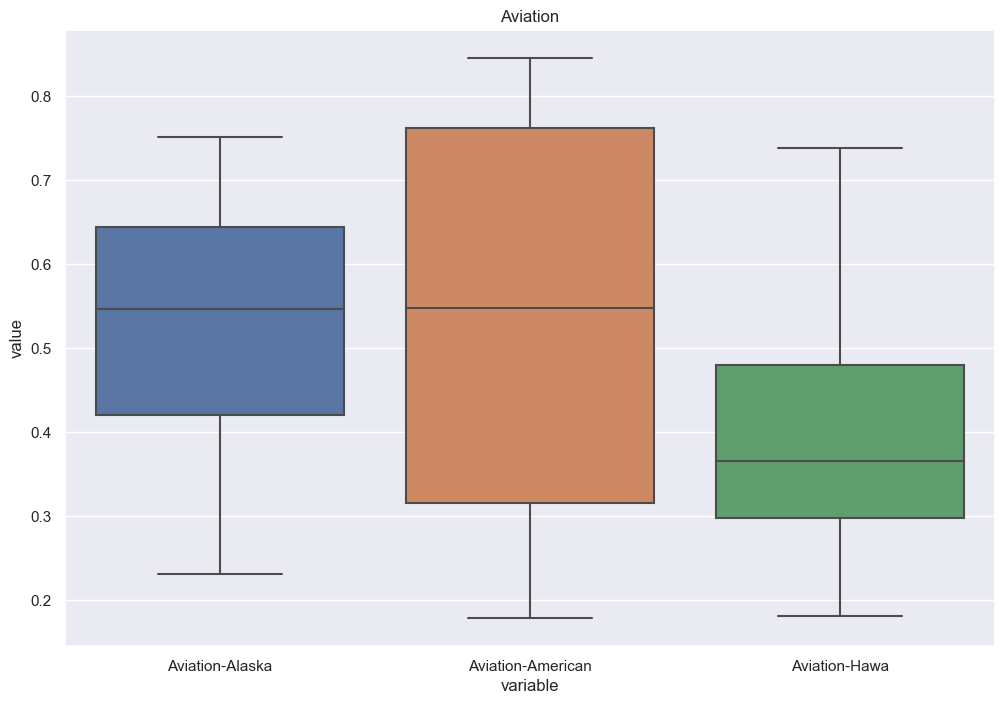

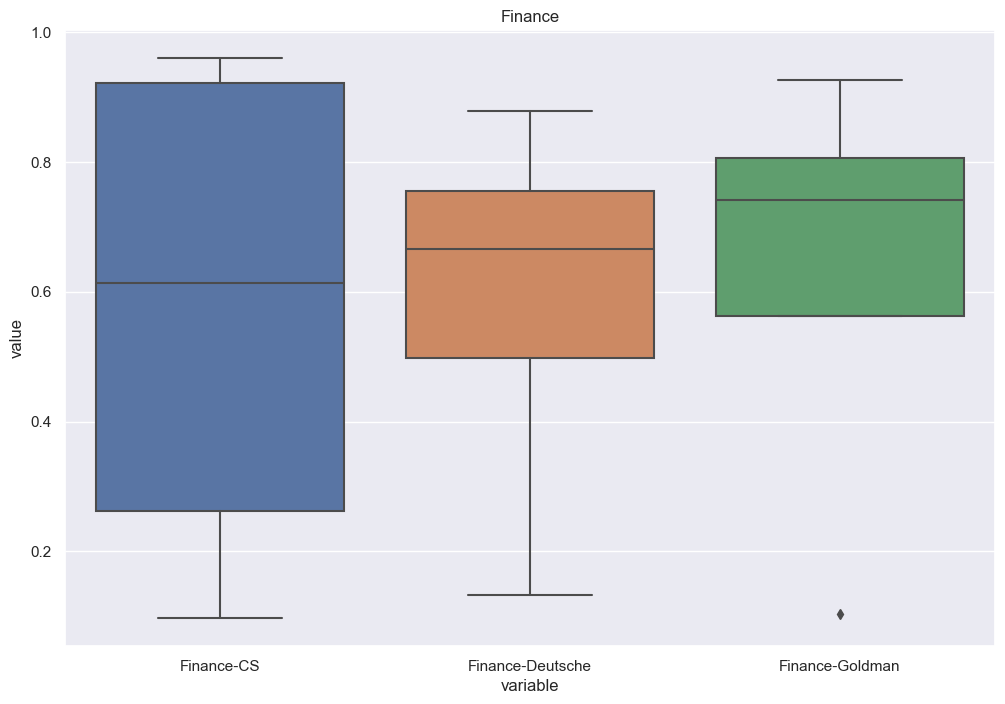

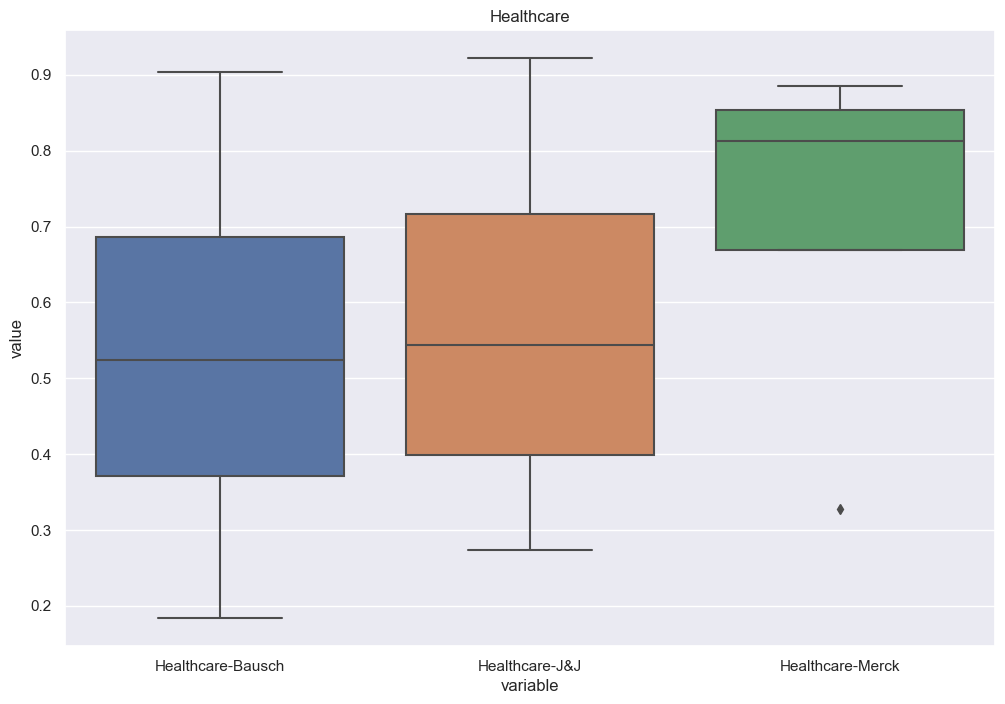

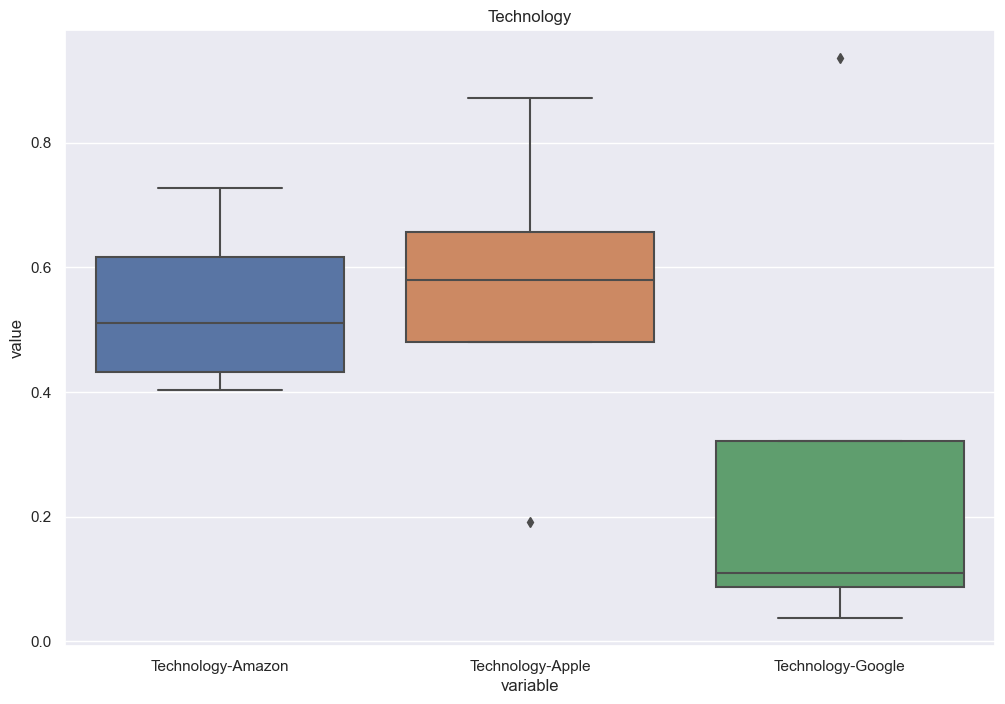

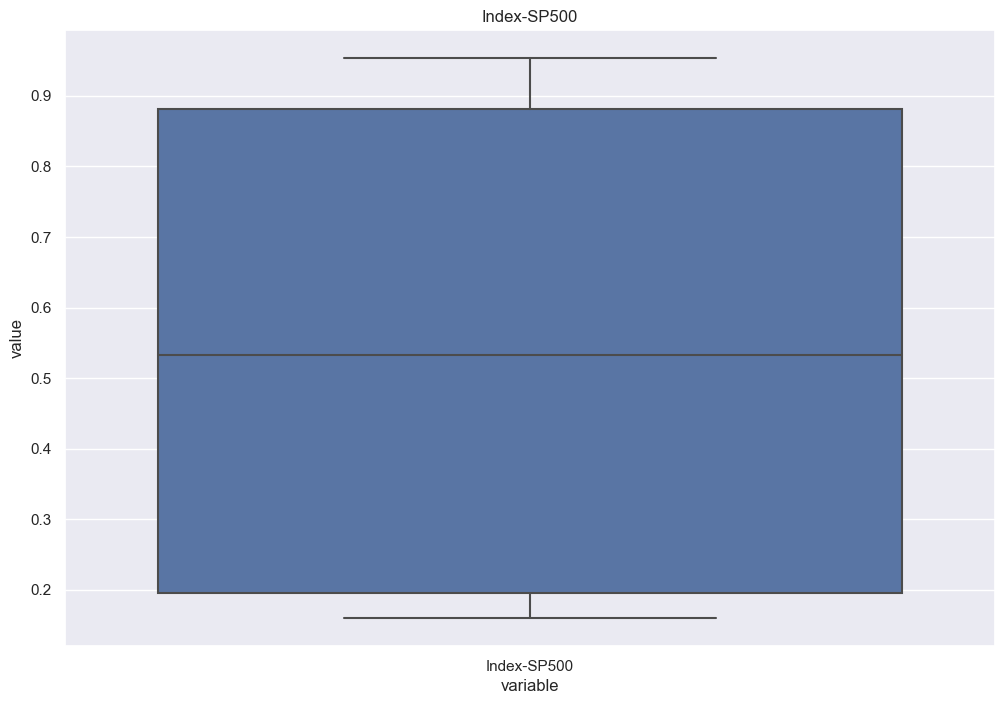

In [247]:
prices_Aviation = pd.DataFrame(data = np.random.random(size=(4,3)), columns = ['Aviation-Alaska','Aviation-American','Aviation-Hawa'])
sns.boxplot(x="variable", y="value", data=pd.melt(prices_Aviation))
plt.title("Aviation")
plt.show()

prices_Finance = pd.DataFrame(data = np.random.random(size=(4,3)), columns = ['Finance-CS','Finance-Deutsche','Finance-Goldman'])
sns.boxplot(x="variable", y="value", data=pd.melt(prices_Finance))
plt.title("Finance")
plt.show()

prices_Health = pd.DataFrame(data = np.random.random(size=(4,3)), columns = ['Healthcare-Bausch','Healthcare-J&J','Healthcare-Merck'])
sns.boxplot(x="variable", y="value", data=pd.melt(prices_Health))
plt.title("Healthcare")
plt.show()

prices_Technology = pd.DataFrame(data = np.random.random(size=(4,3)), columns = ['Technology-Amazon','Technology-Apple','Technology-Google'])
sns.boxplot(x="variable", y="value", data=pd.melt(prices_Technology))
plt.title("Technology")
plt.show()

prices_SP500 = pd.DataFrame(data = np.random.random(size=(4,1)), columns = ['Index-SP500'])
sns.boxplot(x="variable", y="value", data=pd.melt(prices_SP500))
plt.title("Index-SP500")
plt.show()

##### Observation:
1. Aviation: Here Alaska has more distribution below median, American has a equal distribution while Hawa has more distribution above median.
2. Finance: Only CS has a good distribution whereas the other 2 Deutsche and Goldman have skewed towards above.
3. Health Care:  Bausch and J&J are almost normally distributed but Merck shows higher distribution lower than median
4. Technology: Apple shows outliers in the 1st quartile, Google shows outliers in the 4th quartile which is fine but it is skewed causing it to have more distribution more than median in the 3rd quartile. The other 2 also aren't distributed righly.
5. SP500: It is perfectly distributed

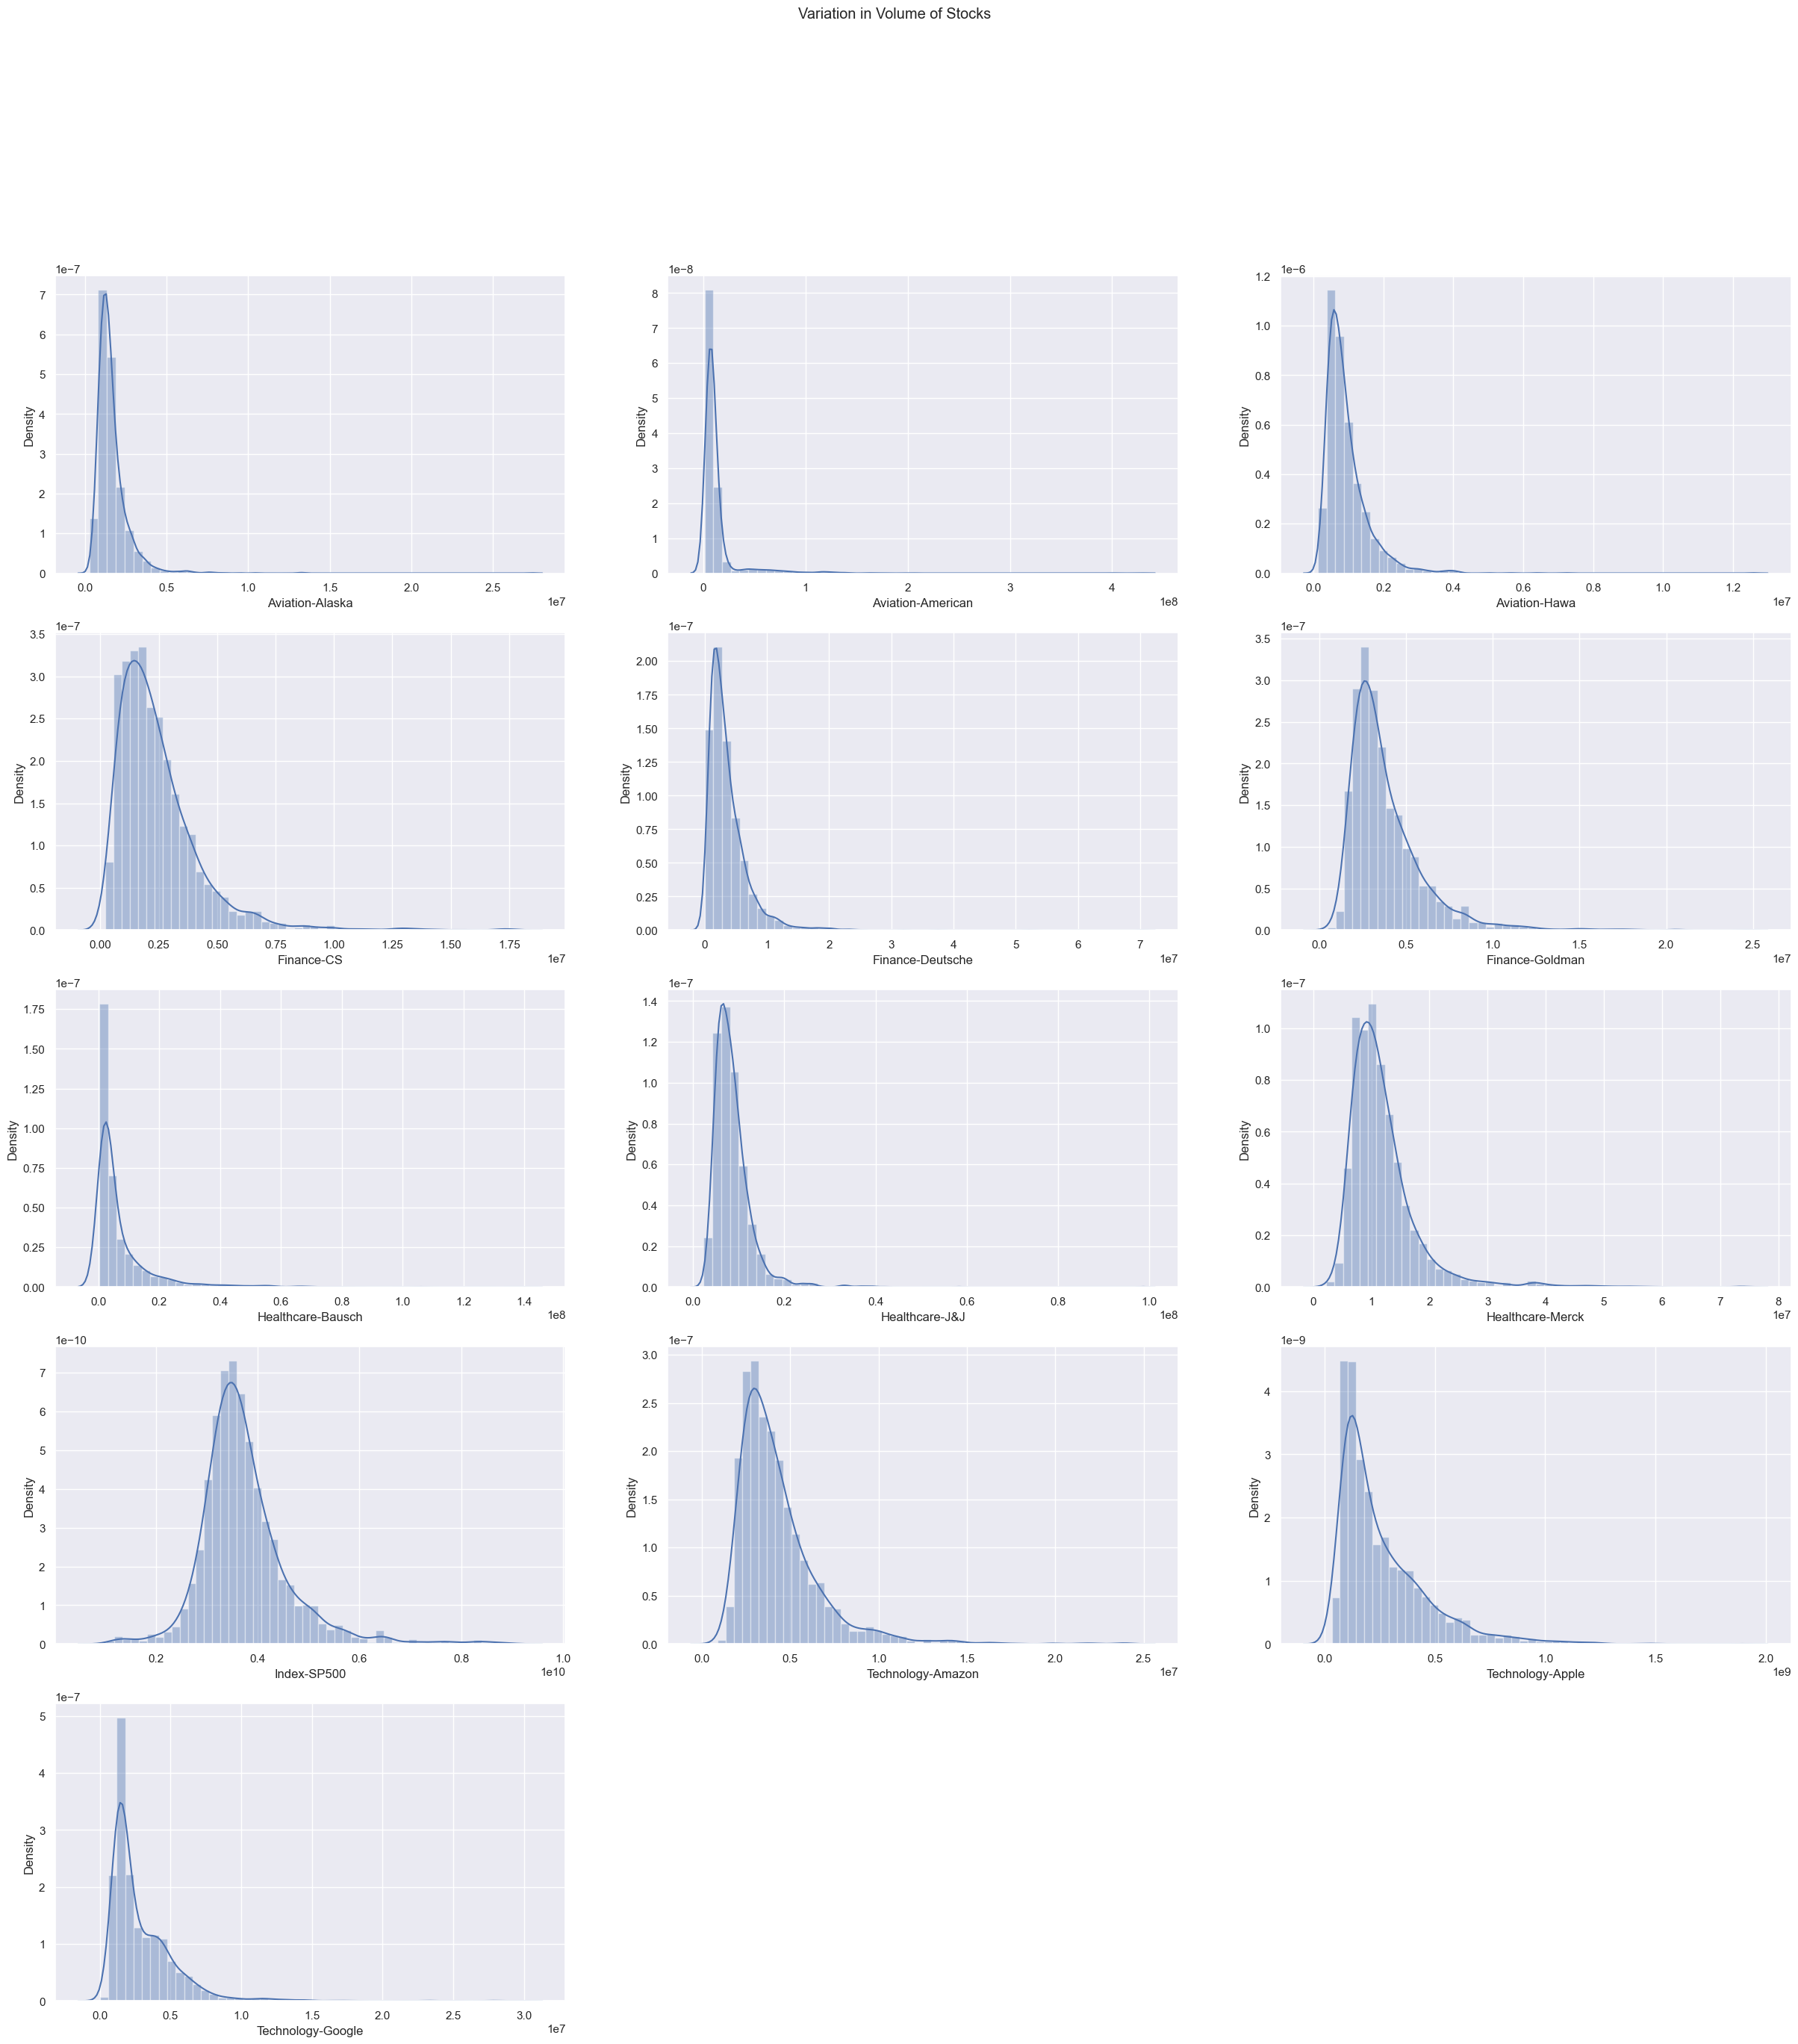

In [248]:
#Plotting the histogram plots of the Volumes of Stocks
plt.figure(figsize = (30,30))
plt.tight_layout()
feature = volume.columns
for i in enumerate(feature):
    plt.subplot(5,3, i[0]+1)
    sns.distplot(volume[i[1]],hist=True)
    
plt.suptitle("Variation in Volume of Stocks",y=1)
plt.show()

##### Observation:
- The plot illustrates the distribution of volume data relative to the mean. Stocks with greater standard deviations are considered more volatile. In the chart, you can observe that stocks like CS in the Finance category, GS in the Finance category, Merck in the Healthcare category, as well as AAPL, AMZN, and GOOG in the Technology category, display wider distributions. This suggests that these stocks exhibit higher volatility.

#### Correlation

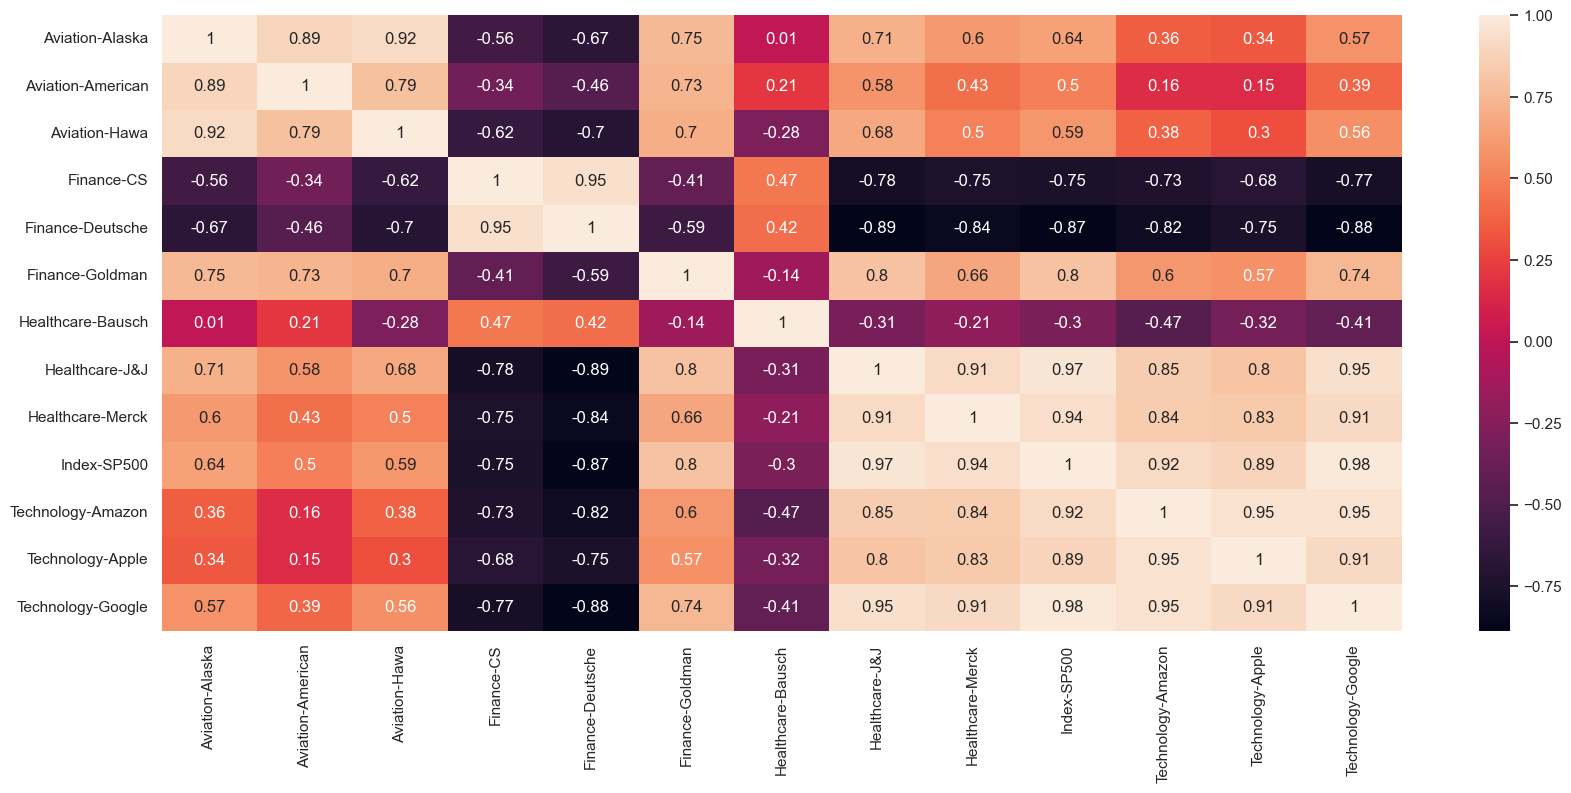

In [249]:
#Plotting the correlation of Stock Prices
plt.figure(figsize = (20,8))
sns.heatmap(prices.corr(),annot = True)
plt.show()

##### Observation:
After examining the correlation of each stock with the index, the following observations were made:

- Stocks with a strong positive correlation (ranging from 0.6 to 1) include Apple, Amazon, Google, Goldman Sachs, J&J, Merck & Co, and Alaska.

- Stocks with a weak positive correlation (ranging from 0 to 0.6) are American Airlines and Hawaiian Holdings.

- Stocks with negative correlation (ranging from 0 to -1) are Bausch Health, Credit Suisse, and Deutsche Bank.

- Ideally, it is advisable to avoid including stocks in the portfolio that have a negative correlation with the Index (S&P 500) because they tend to carry higher risk.

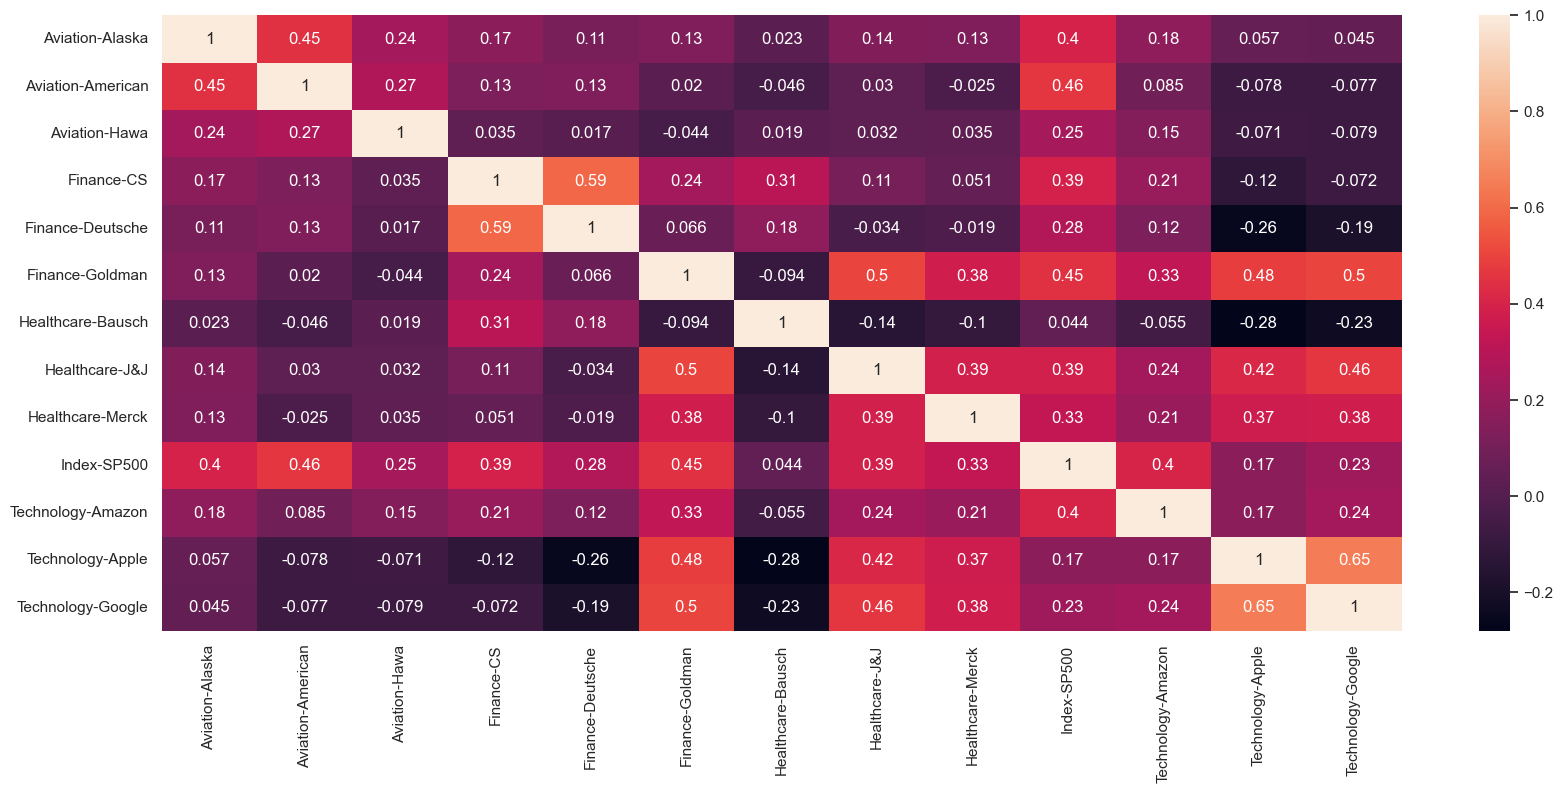

In [250]:
#Plotting the correlation of Stock Volume
plt.figure(figsize = (20,8))
sns.heatmap(volume.corr(),annot = True)
plt.show()

##### Observation:
Every stock exhibits a positive correlation with the S&P500, but these correlations are generally weak, with the strongest correlation being 0.46, which is associated with American Airlines.

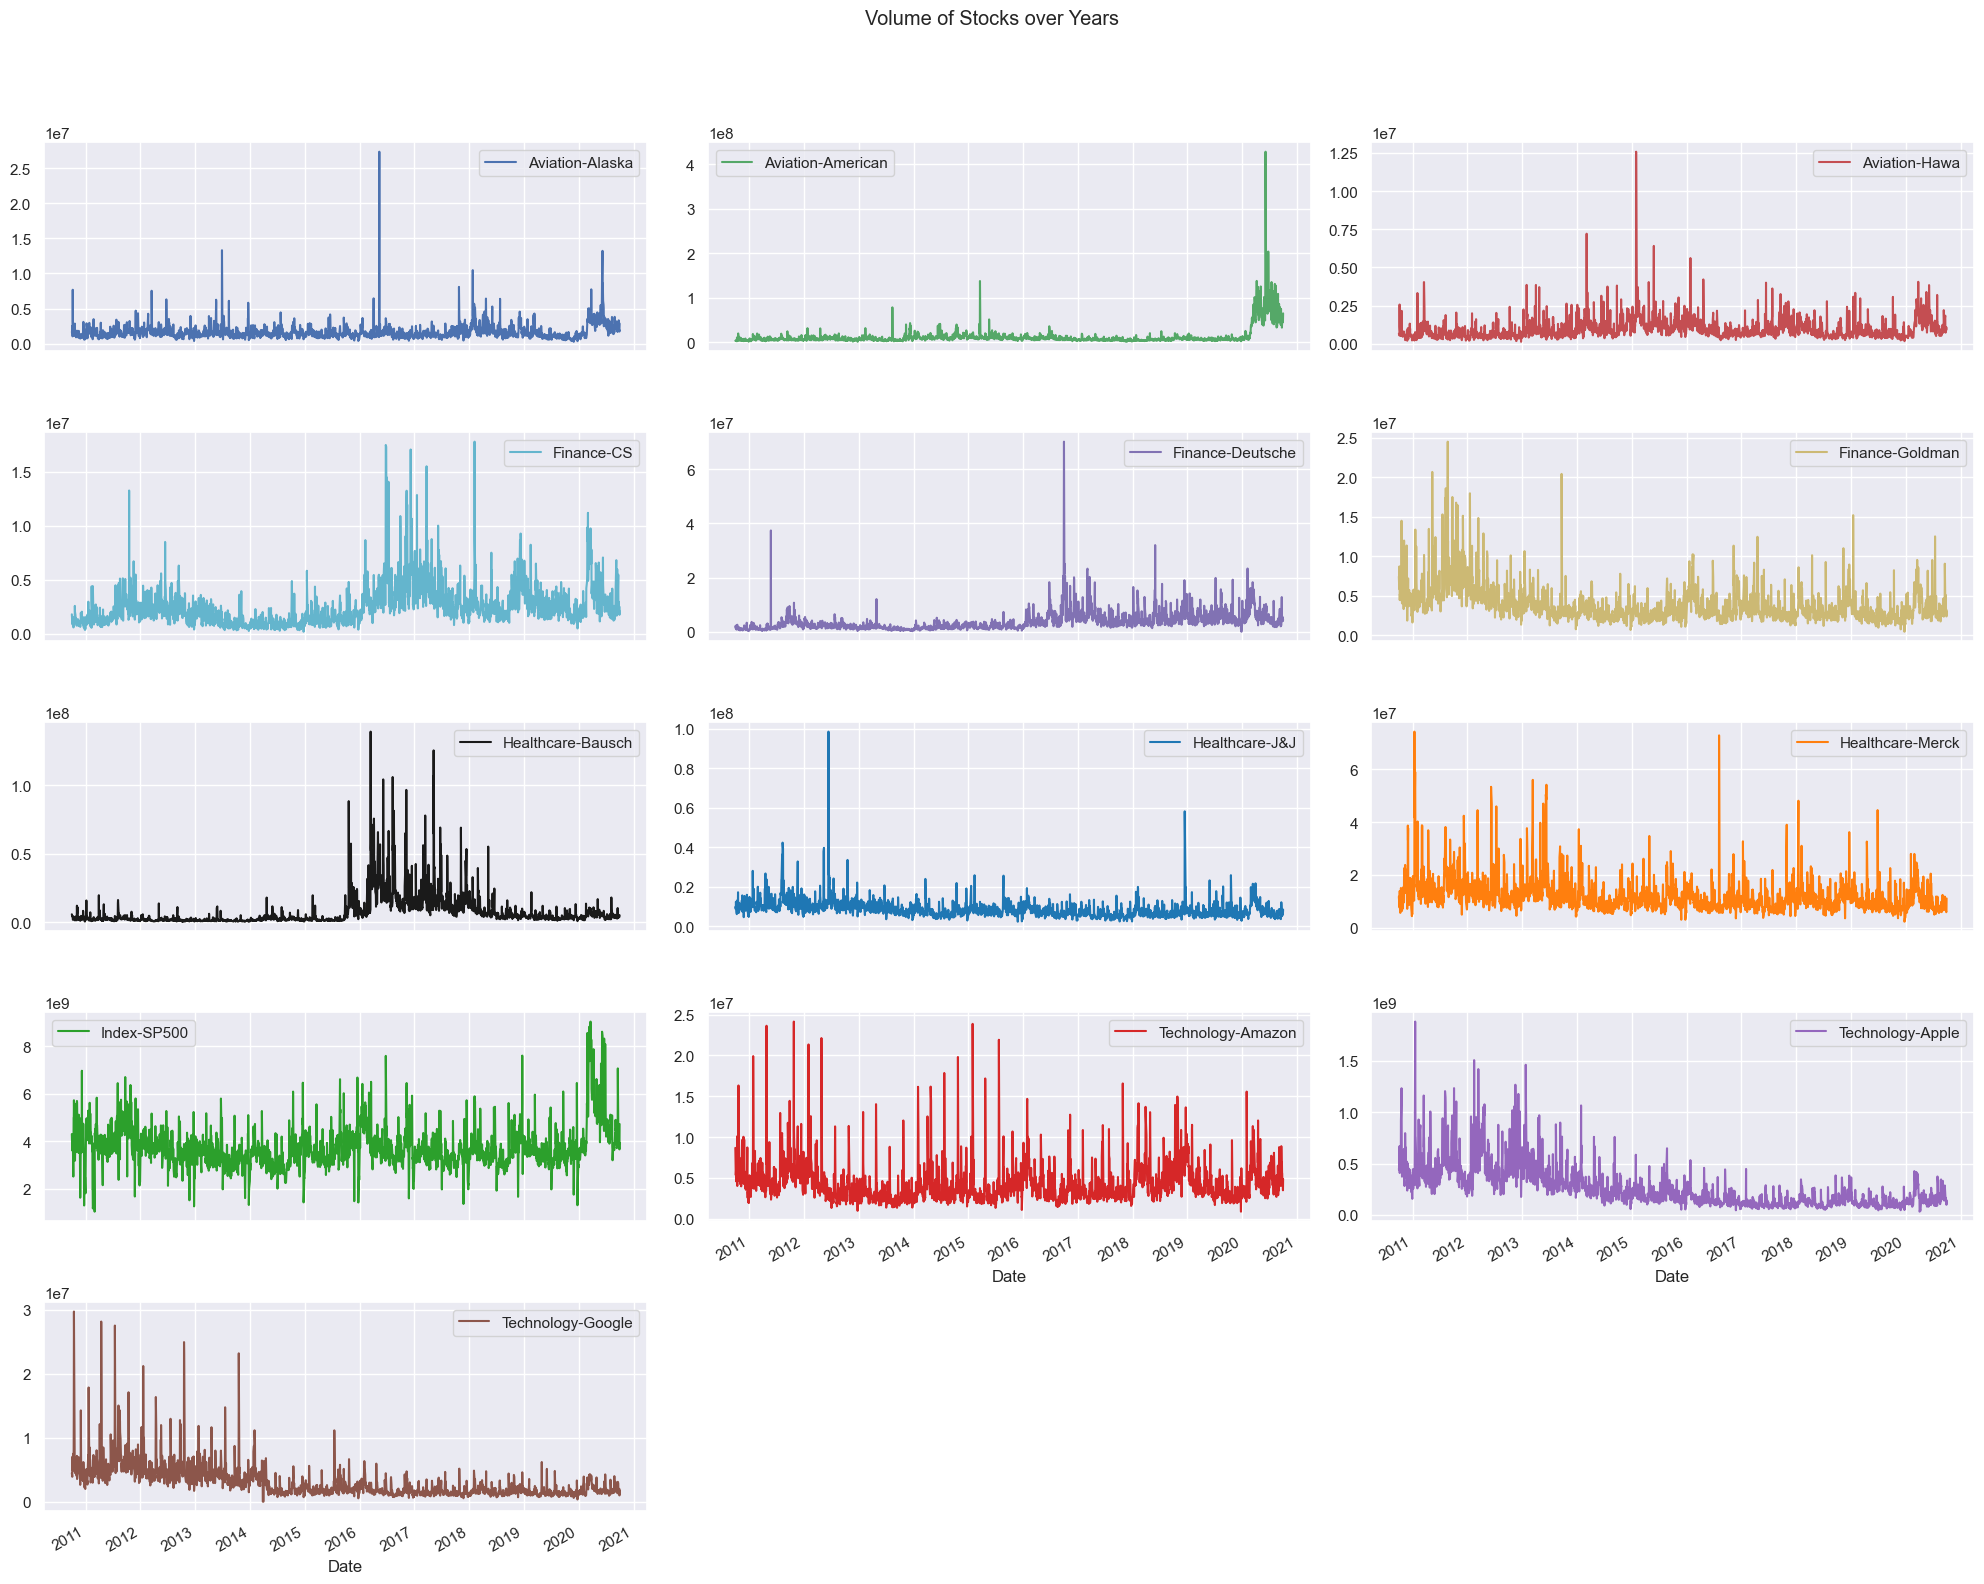

In [251]:
# Creating a list of 13 different colors for different stocks
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# Plotting the subplots with the specified colors
volume.plot(kind='line', subplots=True, layout=(7, 3), figsize=(20, 20), color=colors)

# Adding other plot customizations
plt.tight_layout()
plt.suptitle("Volume of Stocks over Years", y=1.05)
plt.show()

##### Observation:
In 2020-21, there was an increase in trading volumes for all the stocks in the Aviation industry. Meanwhile, within the Technology sector, the trading volumes for Apple and Google have remained relatively stable, even though there was a period of higher trading volumes between 2011 and 2014. On the other hand, Amazon's stock volumes have been fluctuating.

In [252]:
prices.head(1)

Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
Date                                                                        
2010-10-01          12.4475               9.29           5.96   42.226563   

            Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  \
Date                                                               
2010-10-01         52.595421       147.699997              25.75   

            Healthcare-J&J  Healthcare-Merck  Index-SP500  Technology-Amazon  \
Date                                                                           
2010-10-01           61.75         36.599998   1146.23999         153.710007   

            Technology-Apple  Technology-Google  
Date                                             
2010-10-01             10.09         261.828613

### Sub-plots to visualise stock movements

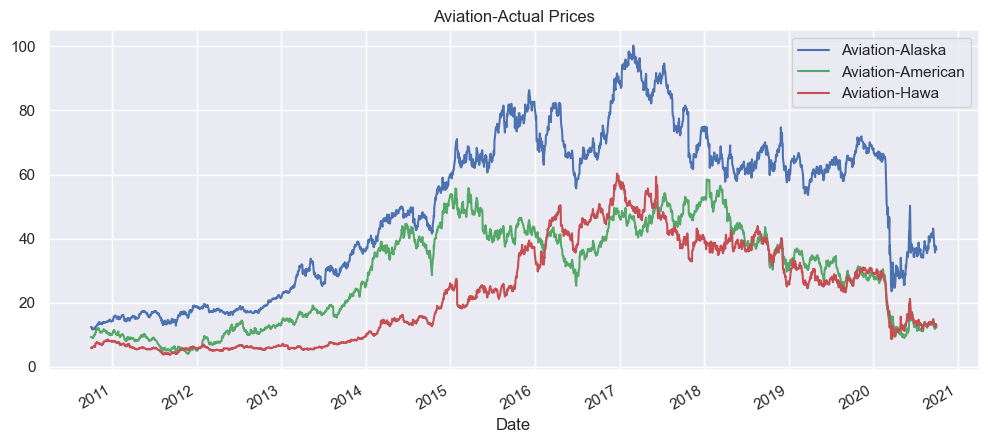

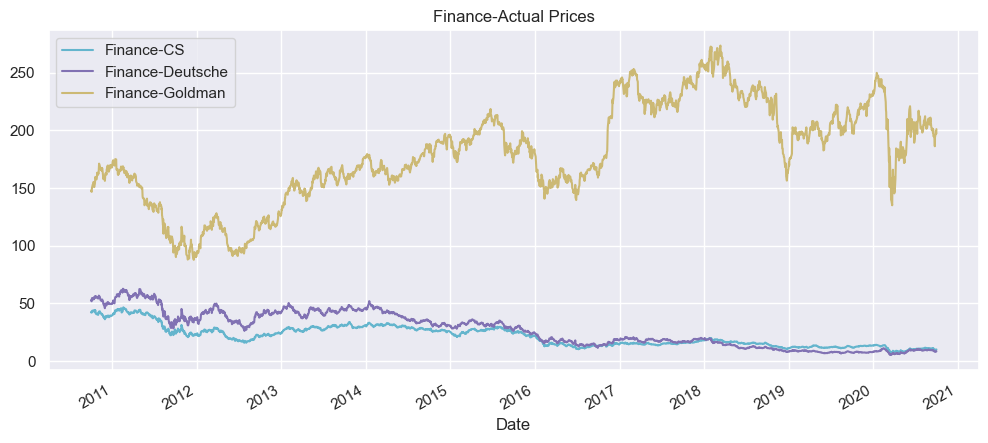

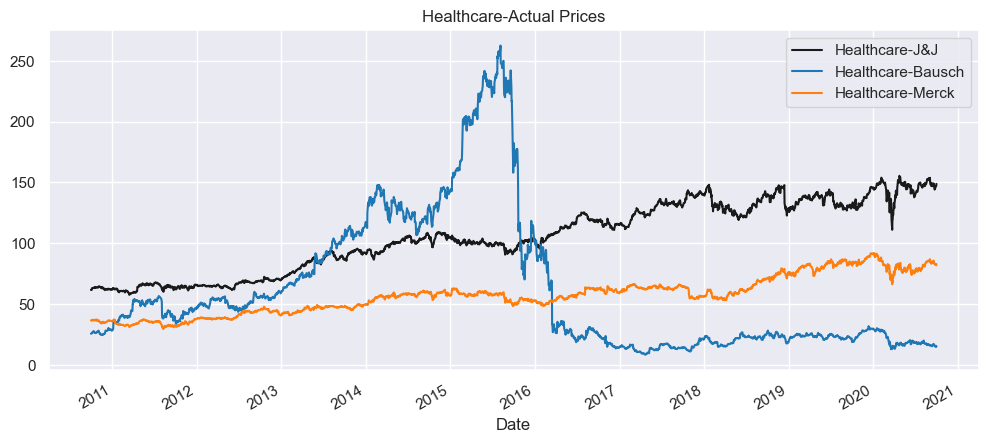

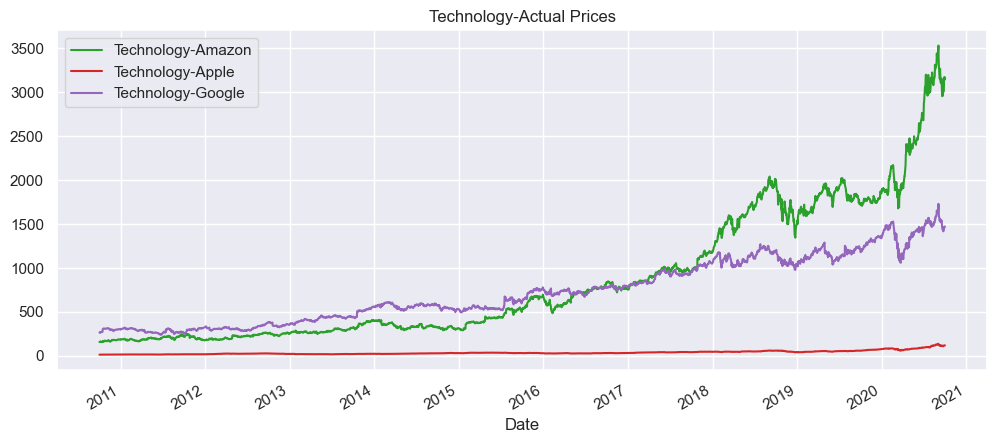

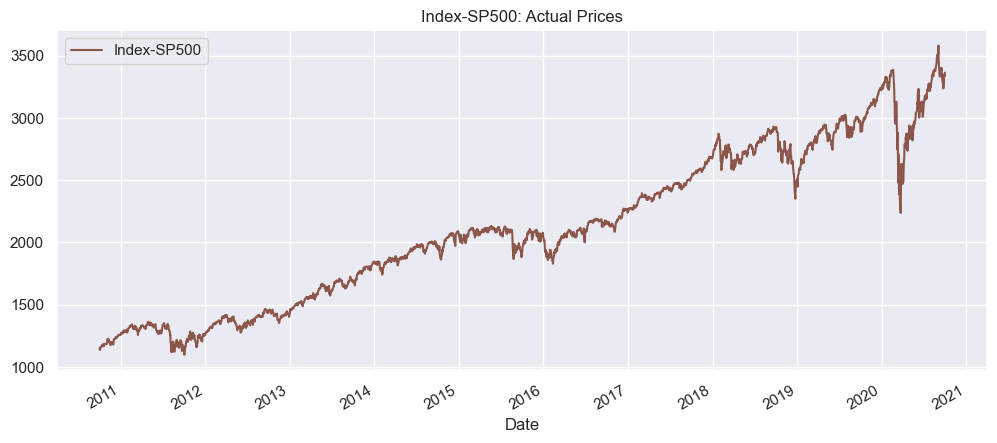

In [253]:
# Defining colors for each industry
aviation_colors = ['b', 'g', 'r']
finance_colors = ['c', 'm', 'y']
healthcare_colors = ['k', 'tab:blue', 'tab:orange']
technology_colors = ['tab:green', 'tab:red', 'tab:purple']

# Plotting the stocks of Aviation with specified colors
prices[['Aviation-Alaska', 'Aviation-American', 'Aviation-Hawa']].plot(subplots=False, title='Aviation-Actual Prices', figsize=(12, 5), color=aviation_colors)

# Plotting the stocks of Finance with specified colors
prices[['Finance-CS', 'Finance-Deutsche', 'Finance-Goldman']].plot(subplots=False, title="Finance-Actual Prices", figsize=(12, 5), color=finance_colors)

# Plotting the stocks of Healthcare with specified colors
prices[['Healthcare-J&J', 'Healthcare-Bausch', 'Healthcare-Merck']].plot(subplots=False, title="Healthcare-Actual Prices", figsize=(12, 5), color=healthcare_colors)

# Plotting the stocks of Technology with specified colors
prices[['Technology-Amazon', 'Technology-Apple', 'Technology-Google']].plot(subplots=False, title="Technology-Actual Prices", figsize=(12, 5), color=technology_colors)

# Plotting the stocks of Index
prices[['Index-SP500']].plot(subplots=False, title="Index-SP500: Actual Prices", figsize=(12, 5), color='tab:brown')

plt.show()

##### Observation:
- Stocks in the Technology sector, notably Amazon and Google, are experiencing an upward trend.
- Within the Healthcare industry, J&J and Merck exhibit a slight uptrend, while Bausch is facing a decline.
- Both Finance and Aviation industry stocks are currently in a downtrend.
- Considerable disparities in stock price levels exist within the sectors themselves.
- The market index demonstrates a clear upward trajectory, despite occasional sharp declines in certain years.

### Normalisation is used because each stocks are in different scales hence we use MinMax scaler for analysis and to bring back to same scales.

In [254]:
# Creating a copy of Price dataframe for normalization
prices_normal=prices.copy()

# Checking the data
prices_normal.head()

Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
Date                                                                        
2010-10-01          12.4475               9.29           5.96   42.226563   
2010-10-04          12.1425               9.12           5.75   41.914063   
2010-10-05          12.2150               9.23           5.85   43.154297   
2010-10-06          12.1875               9.23           5.97   43.437500   
2010-10-07          11.6250               9.24           6.15   43.671875   

            Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  \
Date                                                               
2010-10-01         52.595421       147.699997          25.750000   
2010-10-04         51.755726       146.570007          25.870001   
2010-10-05         53.950382       149.570007          26.299999   
2010-10-06         54.608780       150.839996          26.690001   
2010-10-07         54.036259       151.110001          26.600000   

            Healthcare-J&J  Healthcare-Merck  Index-SP500  Technology-Amazon  \
Date                                                                           
2010-10-01       61.750000         36.599998  1146.239990         153.710007   
2010-10-04       61.669998         36.520000  1137.030029         155.389999   
2010-10-05       62.799999         37.020000  1160.750000         160.869995   
2010-10-06       63.209999         37.009998  1159.969971         155.399994   
2010-10-07       63.220001         36.709999  1158.060059         156.270004   

            Technology-Apple  Technology-Google  
Date                                             
2010-10-01         10.090000         261.828613  
2010-10-04          9.951428         260.199707  
2010-10-05         10.319285         268.110046  
2010-10-06         10.328215         266.177307  
2010-10-07         10.329286         264.015411

In [255]:
# Importing MinMax Scaler

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [256]:
# Normalizing the Data using MinMax Scaler
scaler = MinMaxScaler()
scaler.fit(prices_normal)
price_normalized = pd.DataFrame(scaler.transform(prices_normal), index=prices_normal.index, columns = prices_normal.columns)
price_normalized.head()

Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
Date                                                                        
2010-10-01         0.009338           0.097118       0.038570    0.892402   
2010-10-04         0.005896           0.093997       0.034855    0.884559   
2010-10-05         0.006714           0.096016       0.036624    0.915686   
2010-10-06         0.006404           0.096016       0.038747    0.922794   
2010-10-07         0.000056           0.096200       0.041932    0.928676   

            Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  \
Date                                                               
2010-10-01          0.824503         0.323137           0.067871   
2010-10-04          0.809808         0.317051           0.068344   
2010-10-05          0.848214         0.333208           0.070037   
2010-10-06          0.859736         0.340047           0.071572   
2010-10-07          0.849717         0.341502           0.071218   

            Healthcare-J&J  Healthcare-Merck  Index-SP500  Technology-Amazon  \
Date                                                                           
2010-10-01        0.041799          0.109111     0.018943           0.000201   
2010-10-04        0.040981          0.107826     0.015232           0.000699   
2010-10-05        0.052529          0.115861     0.024790           0.002321   
2010-10-06        0.056719          0.115700     0.024476           0.000702   
2010-10-07        0.056822          0.110879     0.023706           0.000959   

            Technology-Apple  Technology-Google  
Date                                             
2010-10-01          0.001115           0.016944  
2010-10-04          0.000000           0.015852  
2010-10-05          0.002961           0.021154  
2010-10-06          0.003033           0.019859  
2010-10-07          0.003042           0.018410

In [257]:
price_normalized.describe()

Aviation-Alaska  Aviation-American  Aviation-Hawa   Finance-CS  \
count      2517.000000        2517.000000    2517.000000  2517.000000   
mean          0.433437           0.466268       0.337764     0.372239   
std           0.272930           0.279271       0.273939     0.225583   
min           0.000000           0.000000       0.000000     0.000000   
25%           0.171067           0.165412       0.057502     0.177443   
50%           0.529452           0.523591       0.320771     0.325522   
75%           0.627849           0.701303       0.585987     0.529068   
max           1.000000           1.000000       1.000000     1.000000   

       Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  Healthcare-J&J  \
count       2517.000000      2517.000000        2517.000000     2517.000000   
mean           0.381928         0.494928           0.210113        0.486636   
std            0.269669         0.228379           0.225070        0.287933   
min            0.000000         0.000000           0.000000        0.000000   
25%            0.139822         0.362398           0.053777        0.248033   
50%            0.400567         0.482174           0.119090        0.473991   
75%            0.622455         0.667169           0.321877        0.749310   
max            1.000000         1.000000           1.000000        1.000000   

       Healthcare-Merck  Index-SP500  Technology-Amazon  Technology-Apple  \
count       2517.000000  2517.000000        2517.000000       2517.000000   
mean           0.439516     0.407865           0.207673          0.189194   
std            0.243685     0.246706           0.220577          0.166066   
min            0.000000     0.000000           0.000000          0.000000   
25%            0.255825     0.186548           0.033584          0.072528   
50%            0.439820     0.391677           0.112692          0.142005   
75%            0.550860     0.627443           0.398698          0.265729   
max            1.000000     1.000000           1.000000          1.000000   

       Technology-Google  
count        2517.000000  
mean            0.331075  
std             0.244472  
min             0.000000  
25%             0.112010  
50%             0.278360  
75%             0.549200  
max             1.000000

##### Observation:
Following the normalization process, the values fall within a range of 0 to 1.
- Subsequently, we will proceed to visualize the normalized data, which facilitates the comparison of performance.

In [258]:
list(price_normalized.columns)

['Aviation-Alaska',
 'Aviation-American',
 'Aviation-Hawa',
 'Finance-CS',
 'Finance-Deutsche',
 'Finance-Goldman',
 'Healthcare-Bausch',
 'Healthcare-J&J',
 'Healthcare-Merck',
 'Index-SP500',
 'Technology-Amazon',
 'Technology-Apple',
 'Technology-Google']

#### Plotting Normalised Prices of Stocks - Industry wise

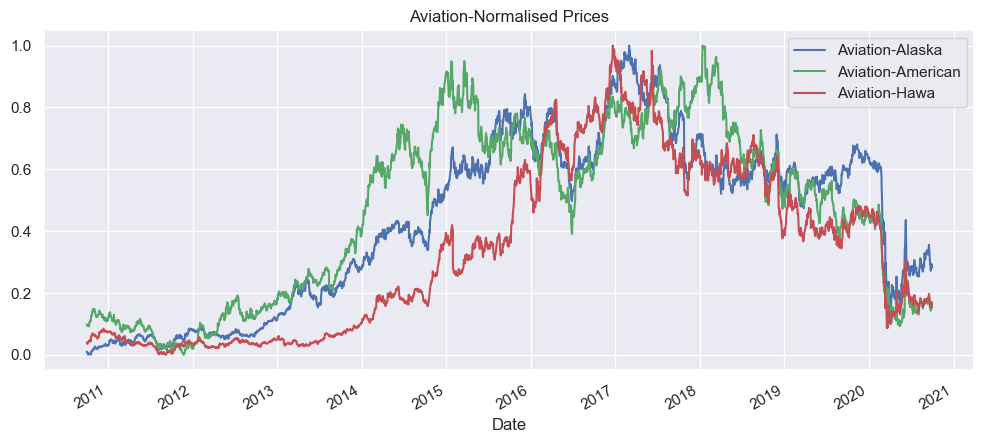

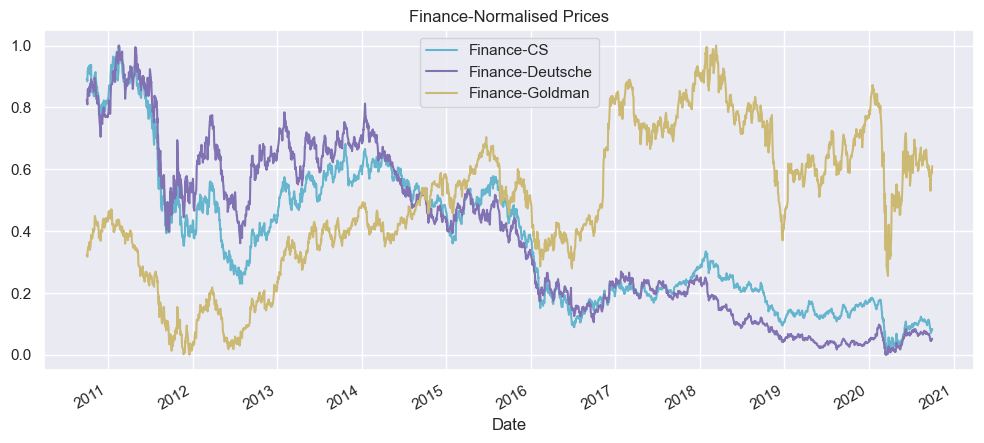

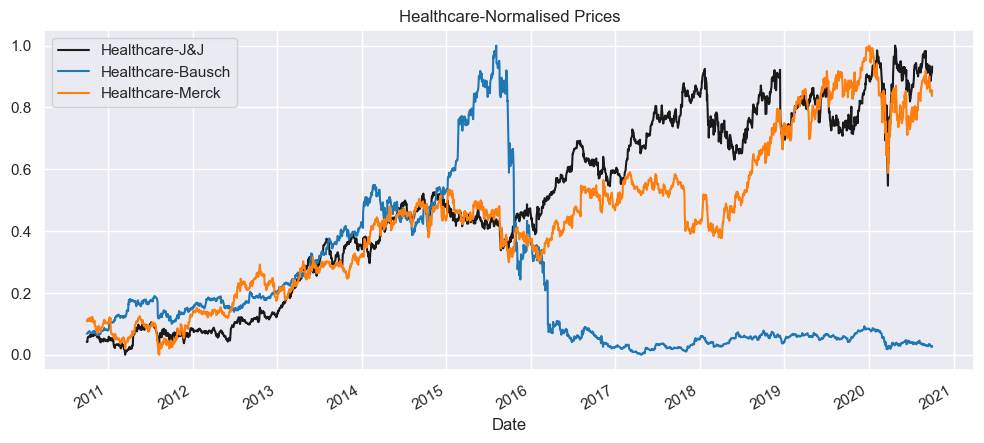

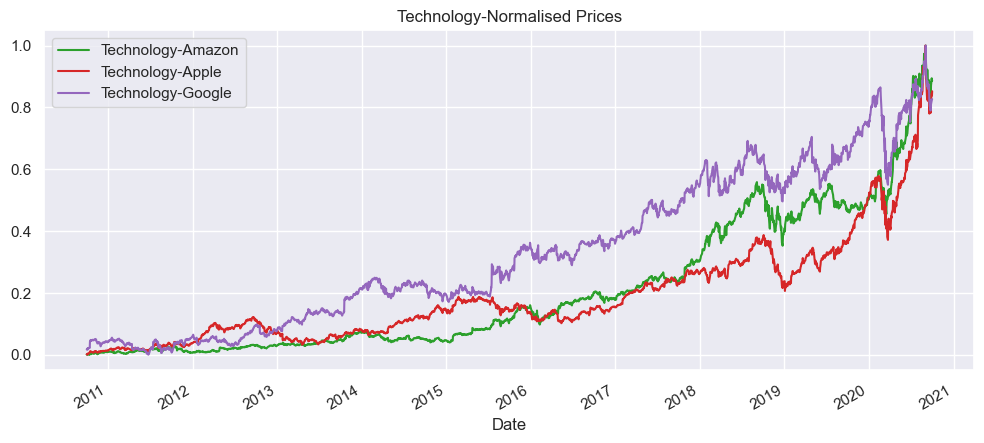

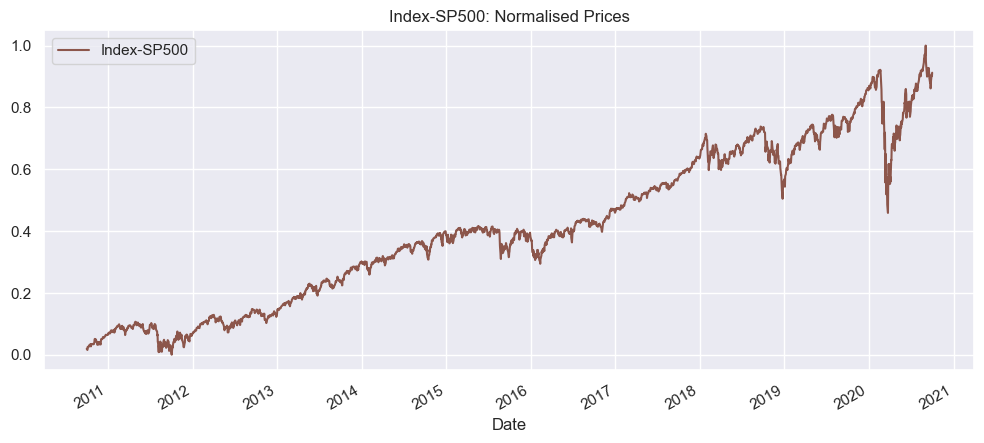

In [259]:
# Defining colors for each industry
aviation_colors = ['b', 'g', 'r']
finance_colors = ['c', 'm', 'y']
healthcare_colors = ['k', 'tab:blue', 'tab:orange']
technology_colors = ['tab:green', 'tab:red', 'tab:purple']

# Plotting the stocks of Aviation with specified colors
price_normalized[['Aviation-Alaska', 'Aviation-American', 'Aviation-Hawa']].plot(subplots=False, title='Aviation-Normalised Prices', figsize=(12, 5), color=aviation_colors)

# Plotting the stocks of Finance with specified colors
price_normalized[['Finance-CS', 'Finance-Deutsche', 'Finance-Goldman']].plot(subplots=False, title="Finance-Normalised Prices", figsize=(12, 5), color=finance_colors)

# Plotting the stocks of Healthcare with specified colors
price_normalized[['Healthcare-J&J', 'Healthcare-Bausch', 'Healthcare-Merck']].plot(subplots=False, title="Healthcare-Normalised Prices", figsize=(12, 5), color=healthcare_colors)

# Plotting the stocks of Technology with specified colors
price_normalized[['Technology-Amazon', 'Technology-Apple', 'Technology-Google']].plot(subplots=False, title="Technology-Normalised Prices", figsize=(12, 5), color=technology_colors)

# Plotting the stocks of Index
price_normalized[['Index-SP500']].plot(subplots=False, title="Index-SP500: Normalised Prices", figsize=(12, 5), color='tab:brown')

plt.show()

##### Observation:
Aviation Industry:
- All three aviation companies are experiencing a downward trend.

Healthcare:
- Johnson & Johnson exhibits an uptrend.
- Bausch Health also demonstrates an upward trend.

Finance:
- In the finance sector, all three companies are undergoing a downtrend.
- It's important to note that the price levels of Bausch Health are comparatively higher than the other two finance companies.

Technology:
- All three technology companies are currently on an upward trajectory.

### Relative Strenght Index of Stocks
RSI = Price of Stock/Price of Index

We are using this to compare the movement of stock price with respect to index.

In [260]:
# Calculate Relative strength index of each stock with respect to the Market index
rsi = prices.copy()
for column in rsi.columns:
    rsi[column] = rsi[column]/rsi['Index-SP500']

In [261]:
# Checking the data
rsi.head()

Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
Date                                                                        
2010-10-01         0.010859           0.008105       0.005200    0.036839   
2010-10-04         0.010679           0.008021       0.005057    0.036863   
2010-10-05         0.010523           0.007952       0.005040    0.037178   
2010-10-06         0.010507           0.007957       0.005147    0.037447   
2010-10-07         0.010038           0.007979       0.005311    0.037711   

            Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  \
Date                                                               
2010-10-01          0.045885         0.128856           0.022465   
2010-10-04          0.045518         0.128906           0.022752   
2010-10-05          0.046479         0.128856           0.022658   
2010-10-06          0.047078         0.130038           0.023009   
2010-10-07          0.046661         0.130485           0.022969   

            Healthcare-J&J  Healthcare-Merck  Index-SP500  Technology-Amazon  \
Date                                                                           
2010-10-01        0.053872          0.031930          1.0         153.710007   
2010-10-04        0.054238          0.032119          1.0         155.389999   
2010-10-05        0.054103          0.031893          1.0         160.869995   
2010-10-06        0.054493          0.031906          1.0         155.399994   
2010-10-07        0.054591          0.031700          1.0         156.270004   

            Technology-Apple  Technology-Google  
Date                                             
2010-10-01         10.090000         261.828613  
2010-10-04          9.951428         260.199707  
2010-10-05         10.319285         268.110046  
2010-10-06         10.328215         266.177307  
2010-10-07         10.329286         264.015411

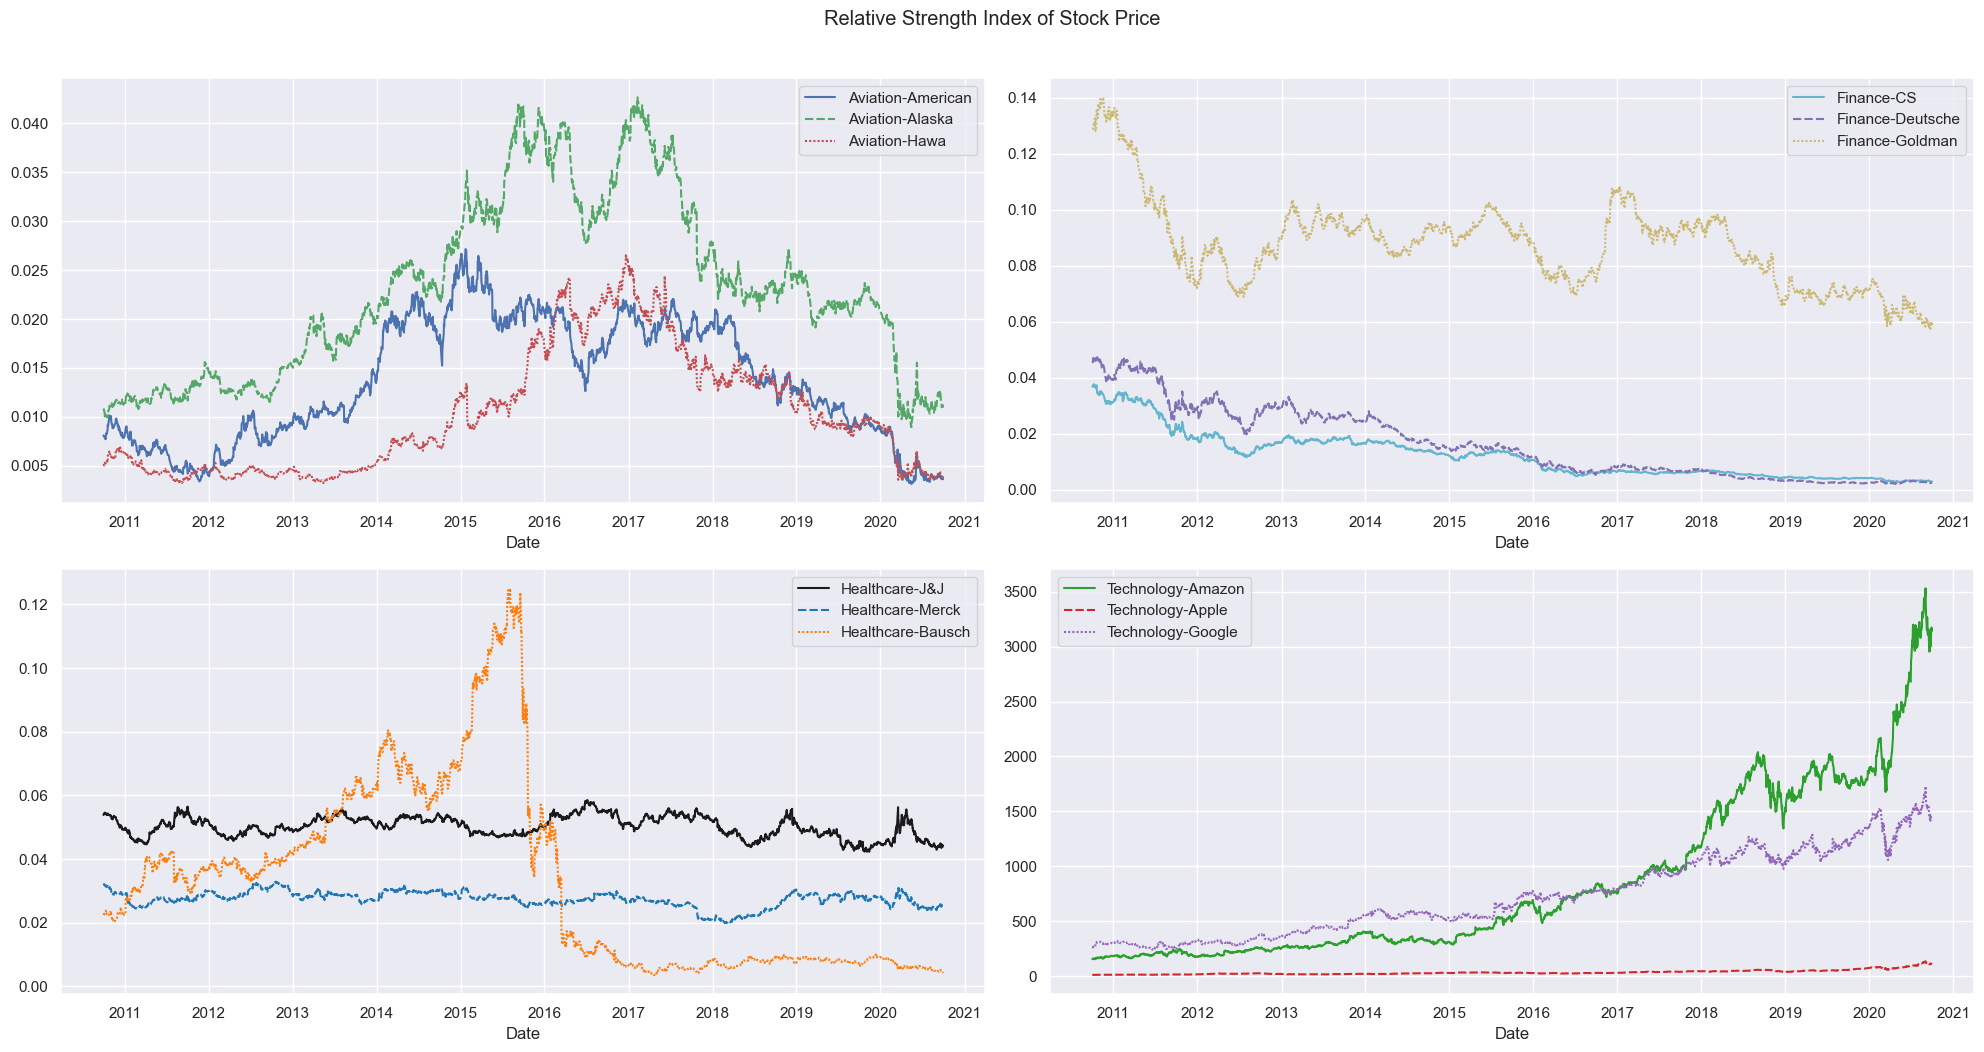

In [262]:
# Defining colors for each industry
aviation_colors = ['b', 'g', 'r']
finance_colors = ['c', 'm', 'y']
healthcare_colors = ['k', 'tab:blue', 'tab:orange']
technology_colors = ['tab:green', 'tab:red', 'tab:purple']

plt.figure(figsize=(20, 10))

# Plotting the RSI for Aviation stocks with specified colors
plt.subplot(2, 2, 1)
sns.lineplot(data=rsi[['Aviation-American', 'Aviation-Alaska', 'Aviation-Hawa']], palette=aviation_colors)
plt.legend(loc='best')
plt.tight_layout()

# Plotting the RSI for Finance stocks with specified colors
plt.subplot(2, 2, 2)
sns.lineplot(data=rsi[['Finance-CS', 'Finance-Deutsche', 'Finance-Goldman']], palette=finance_colors)
plt.tight_layout()

# Plotting the RSI for Healthcare stocks with specified colors
plt.subplot(2, 2, 3)
sns.lineplot(data=rsi[['Healthcare-J&J', 'Healthcare-Merck', 'Healthcare-Bausch']], palette=healthcare_colors)
plt.legend(loc='best')
plt.tight_layout()

# Plotting the RSI for Technology stocks with specified colors
plt.subplot(2, 2, 4)
sns.lineplot(data=rsi[['Technology-Amazon', 'Technology-Apple', 'Technology-Google']], palette=technology_colors)
plt.legend(loc='best')
plt.tight_layout()

plt.suptitle("Relative Strength Index of Stock Price", y=1.05)
plt.show()

##### Observation:

- The Relative Strength Index (RSI) aligns with previous findings.
- The Technology industry is the only sector currently in an uptrend, despite significant differences in their price levels.
- In the healthcare sector, Johnson & Johnson and Bausch Health move in tandem with the market index.
- Stocks within the Healthcare and Finance industries are both in a downtrend.

## Stock Analysis
Stock analysis aims to identify stocks aligning with the client's financial objectives. This involves assessing individual stock performance using essential metrics and handpicking the most fitting options for constructing a portfolio.

### Evaluation of stocks based on CAPM 
1. Daily returns
2. Annulaised(daily) returns
3. Cumulative returns
4. Annualised Risk
5. Sharpe Ratio
6. Beta
7. Expected Returns

In [263]:
# 1. Daily Reuterns
# Calculting daily returns

daily_returns = prices.pct_change()
daily_returns = round((daily_returns[1:]*100),2)
daily_returns.head()

Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
Date                                                                        
2010-10-04            -2.45              -1.83          -3.52       -0.74   
2010-10-05             0.60               1.21           1.74        2.96   
2010-10-06            -0.23               0.00           2.05        0.66   
2010-10-07            -4.62               0.11           3.02        0.54   
2010-10-08             3.63              -1.84           0.00       -1.57   

            Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  \
Date                                                               
2010-10-04             -1.60            -0.77               0.47   
2010-10-05              4.24             2.05               1.66   
2010-10-06              1.22             0.85               1.48   
2010-10-07             -1.05             0.18              -0.34   
2010-10-08             -0.30             1.03               0.90   

            Healthcare-J&J  Healthcare-Merck  Index-SP500  Technology-Amazon  \
Date                                                                           
2010-10-04           -0.13             -0.22        -0.80               1.09   
2010-10-05            1.83              1.37         2.09               3.53   
2010-10-06            0.65             -0.03        -0.07              -3.40   
2010-10-07            0.02             -0.81        -0.16               0.56   
2010-10-08            0.02              0.54         0.61              -0.46   

            Technology-Apple  Technology-Google  
Date                                             
2010-10-04             -1.37              -0.62  
2010-10-05              3.70               3.04  
2010-10-06              0.09              -0.72  
2010-10-07              0.01              -0.81  
2010-10-08              1.68               1.20

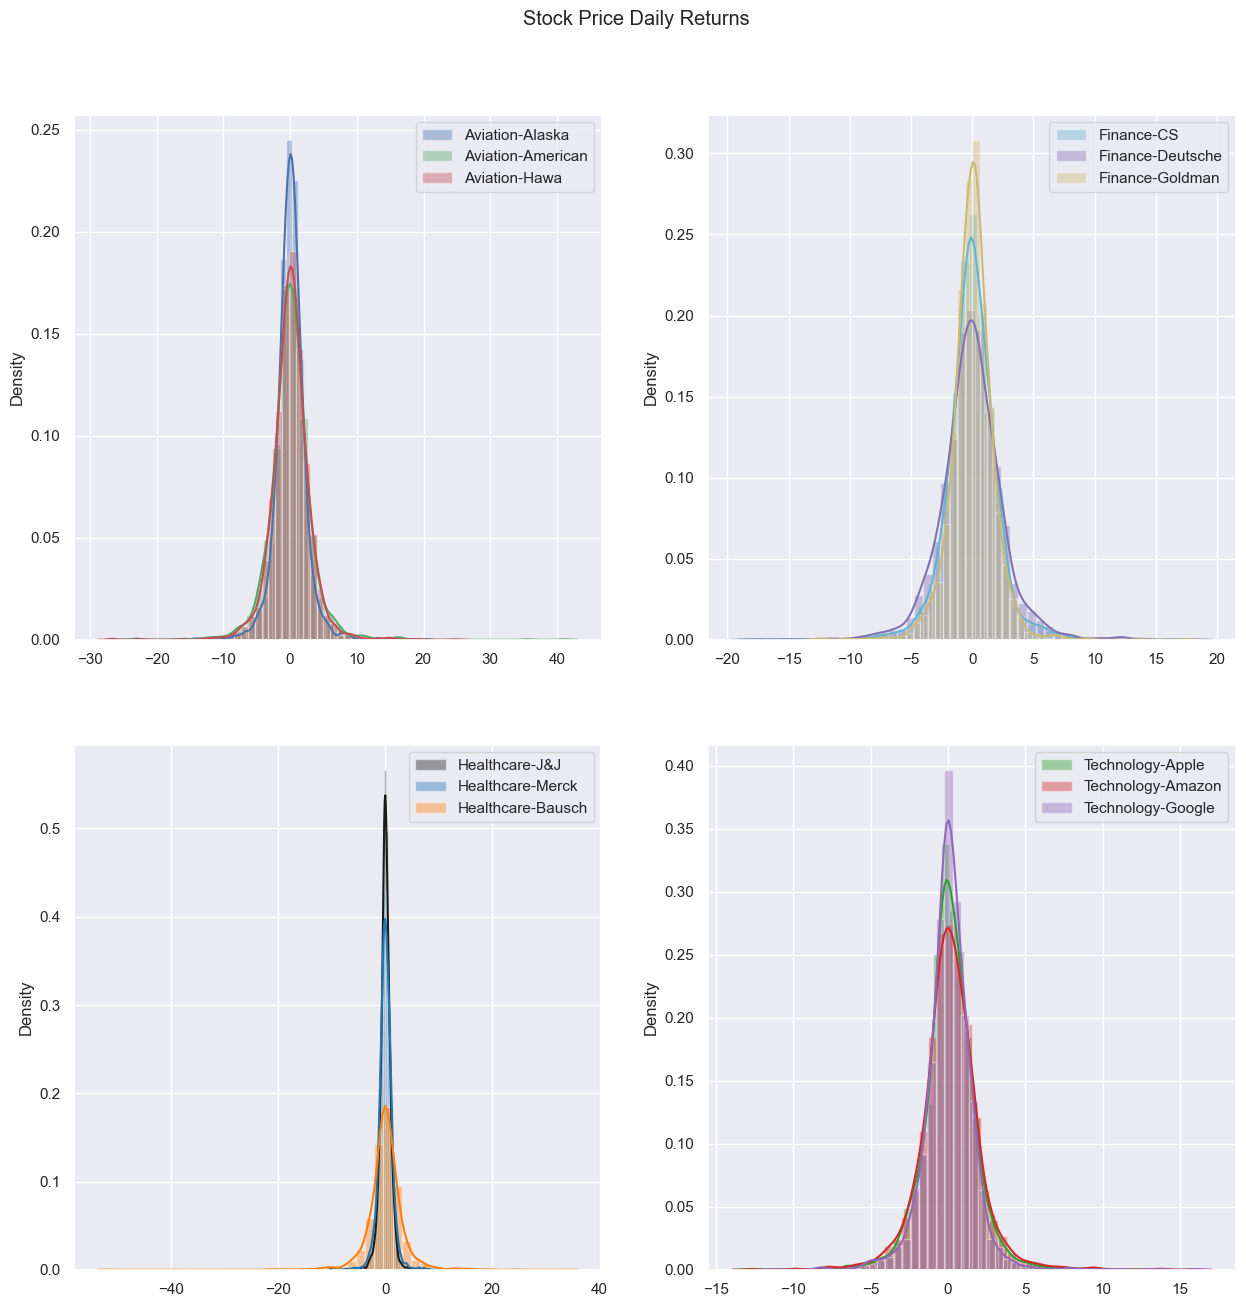

In [264]:
plt.figure(figsize=(15, 15))

# Defining colors for each industry

aviation_colors = ['b', 'g', 'r']
finance_colors = ['c', 'm', 'y']
healthcare_colors = ['k', 'tab:blue', 'tab:orange']
technology_colors = ['tab:green', 'tab:red', 'tab:purple']

plt.subplot(2, 2, 1)
sns.distplot(daily_returns[['Aviation-Alaska']], hist=True, label='Aviation-Alaska', color=aviation_colors[0])
sns.distplot(daily_returns[['Aviation-American']], hist=True, label='Aviation-American', color=aviation_colors[1])
sns.distplot(daily_returns[['Aviation-Hawa']], hist=True, label='Aviation-Hawa', color=aviation_colors[2])
plt.legend()

plt.subplot(2, 2, 2)
sns.distplot(daily_returns[['Finance-CS']], hist=True, label='Finance-CS', color=finance_colors[0])
sns.distplot(daily_returns[['Finance-Deutsche']], hist=True, label='Finance-Deutsche', color=finance_colors[1])
sns.distplot(daily_returns[['Finance-Goldman']], hist=True, label='Finance-Goldman', color=finance_colors[2])
plt.legend()

plt.subplot(2, 2, 3)
sns.distplot(daily_returns[['Healthcare-J&J']], hist=True, label='Healthcare-J&J', color=healthcare_colors[0])
sns.distplot(daily_returns[['Healthcare-Merck']], hist=True, label='Healthcare-Merck', color=healthcare_colors[1])
sns.distplot(daily_returns[['Healthcare-Bausch']], hist=True, label='Healthcare-Bausch', color=healthcare_colors[2])
plt.legend()

plt.subplot(2, 2, 4)
sns.distplot(daily_returns[['Technology-Apple']], hist=True, label='Technology-Apple', color=technology_colors[0])
sns.distplot(daily_returns[['Technology-Amazon']], hist=True, label='Technology-Amazon', color=technology_colors[1])
sns.distplot(daily_returns[['Technology-Google']], hist=True, label='Technology-Google', color=technology_colors[2])
plt.legend()

plt.suptitle("Stock Price Daily Returns", y=0.95)
plt.show()


In [265]:
# Checking the statistical values for daily returns of stocks
daily_returns.describe()

Aviation-Alaska  Aviation-American  Aviation-Hawa   Finance-CS  \
count      2516.000000        2516.000000    2516.000000  2516.000000   
mean          0.070910           0.063605       0.076546    -0.032508   
std           2.356139           3.272582       3.014725     2.220487   
min         -23.240000         -25.220000     -26.970000   -18.260000   
25%          -1.010000          -1.410000      -1.380000    -1.090000   
50%           0.080000           0.020000       0.045000     0.000000   
75%           1.162500           1.562500       1.530000     1.080000   
max          20.310000          41.100000      24.580000    16.340000   

       Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  Healthcare-J&J  \
count       2516.000000      2516.000000        2516.000000     2516.000000   
mean          -0.038164         0.029062           0.046475        0.040855   
std            2.637406         1.833194           3.569884        1.084655   
min          -17.490000       -12.710000         -51.460000      -10.040000   
25%           -1.392500        -0.840000          -1.300000       -0.430000   
50%           -0.050000         0.050000           0.040000        0.030000   
75%            1.370000         0.942500           1.500000        0.570000   
max           17.950000        17.580000          33.740000        8.000000   

       Healthcare-Merck  Index-SP500  Technology-Amazon  Technology-Apple  \
count       2516.000000  2516.000000        2516.000000       2516.000000   
mean           0.041045     0.048752           0.139754          0.112683   
std            1.304925     1.093387           1.989001          1.771761   
min           -8.900000   -11.980000         -12.660000        -12.860000   
25%           -0.610000    -0.330000          -0.812500         -0.700000   
50%            0.030000     0.065000           0.110000          0.090000   
75%            0.730000     0.520000           1.150000          1.020000   
max           10.410000     9.380000          15.750000         11.980000   

       Technology-Google  
count        2516.000000  
mean            0.081765  
std             1.628830  
min           -11.100000  
25%            -0.640000  
50%             0.070000  
75%             0.862500  
max            16.050000

##### Observation:
The table above provides insight into daily price fluctuations. Nonetheless, this data alone is inadequate for drawing conclusions. Therefore, it is necessary to compute annualized daily returns for each stock.

In [266]:
# 2. Annualised Returns
# Calculating Annualised Returns

annualised_returns = []
col=[]

for i in daily_returns.columns:
    col.append(i)

for i in daily_returns.columns:
    annualised_returns.append(daily_returns[i].mean()*252)

In [267]:
# Creating a dataframe for mapping the risk return metrics of stocks

capm_df=pd.DataFrame(list(zip(col,annualised_returns)),columns =['Stocks', 'Annualised Returns'])


In [268]:
# Renaming the names of stocks

for i in capm_df.index:
    capm_df['Stocks'][i]=capm_df['Stocks'][i].replace("Close_","")

In [270]:
# Checking the data

capm_df['Annualised Returns']=round(capm_df['Annualised Returns'],2)
capm_df

Stocks  Annualised Returns
0     Aviation-Alaska               17.87
1   Aviation-American               16.03
2       Aviation-Hawa               19.29
3          Finance-CS               -8.19
4    Finance-Deutsche               -9.62
5     Finance-Goldman                7.32
6   Healthcare-Bausch               11.71
7      Healthcare-J&J               10.30
8    Healthcare-Merck               10.34
9         Index-SP500               12.29
10  Technology-Amazon               35.22
11   Technology-Apple               28.40
12  Technology-Google               20.60

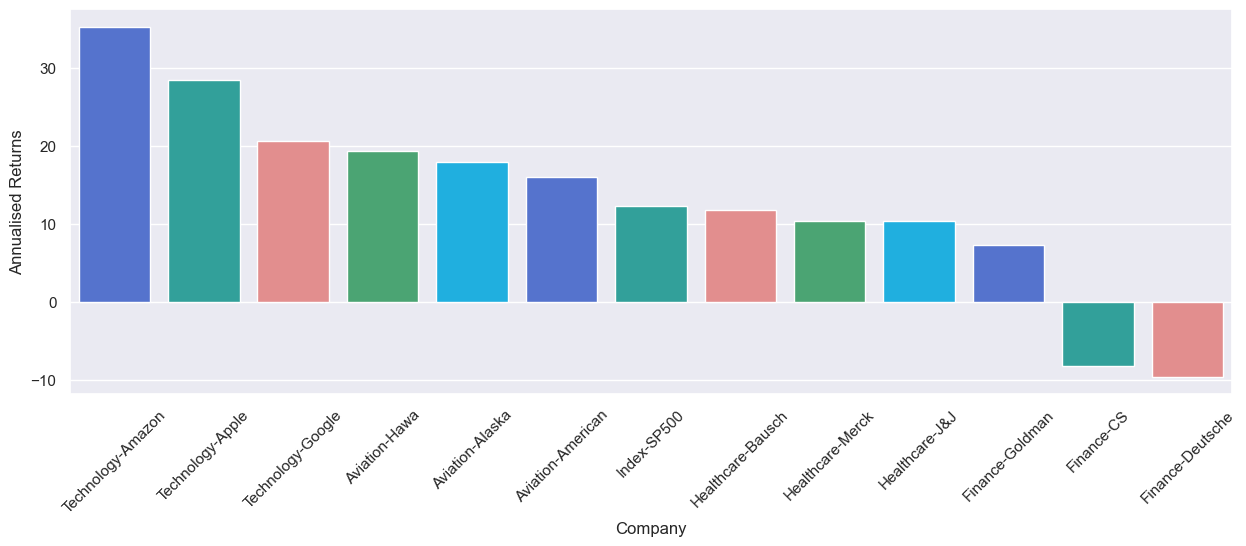

In [271]:
# Plotting the Annualized (Daily) returns
plt.figure(figsize=[15, 5])

# Defining custom colors

colors = ['royalblue', 'lightseagreen', 'lightcoral', 'mediumseagreen', 'deepskyblue']

sns.barplot(
    data=capm_df.sort_values("Annualised Returns", ascending=False),
    x="Stocks",
    y="Annualised Returns",
    palette=colors
)
plt.xticks(rotation=45)
plt.xlabel('Company')
plt.show()


##### Observation:
- All technology stocks have generated positive returns, with Amazon leading, followed by Apple and Google. These three are the top performers among the 12 stocks.

- Aviation stocks exhibited strong performance, ranking just below the technology sector, with all showing positive returns that surpass the SP500 index.

- In the healthcare sector, all three stocks posted positive annualized daily returns, although these returns were lower than those of the SP500.

- Among financial sector stocks, only Goldman Sachs delivered positive returns, while the other two saw negative returns.

In [272]:
# 3. Cumulative Return
#Calculating Cummulative_returns

cum_return =[]
for i in daily_returns.columns:
    cum_return.append(prices[i][-1]/prices[i][0]-1)

In [273]:
# Adding Cumulative_ret column to the dataframe

capm_df['Cumulative Return']= cum_return

capm_df['Cumulative Return']=round(capm_df['Cumulative Return'],4)*100

In [274]:
capm_df

Stocks  Annualised Returns  Cumulative Return
0     Aviation-Alaska               17.87             194.28
1   Aviation-American               16.03              32.29
2       Aviation-Hawa               19.29             116.28
3          Finance-CS               -8.19             -76.39
4    Finance-Deutsche               -9.62             -84.03
5     Finance-Goldman                7.32              36.07
6   Healthcare-Bausch               11.71             -39.65
7      Healthcare-J&J               10.30             141.10
8    Healthcare-Merck               10.34             126.64
9         Index-SP500               12.29             193.39
10  Technology-Amazon               35.22            1948.49
11   Technology-Apple               28.40            1047.77
12  Technology-Google               20.60             461.28

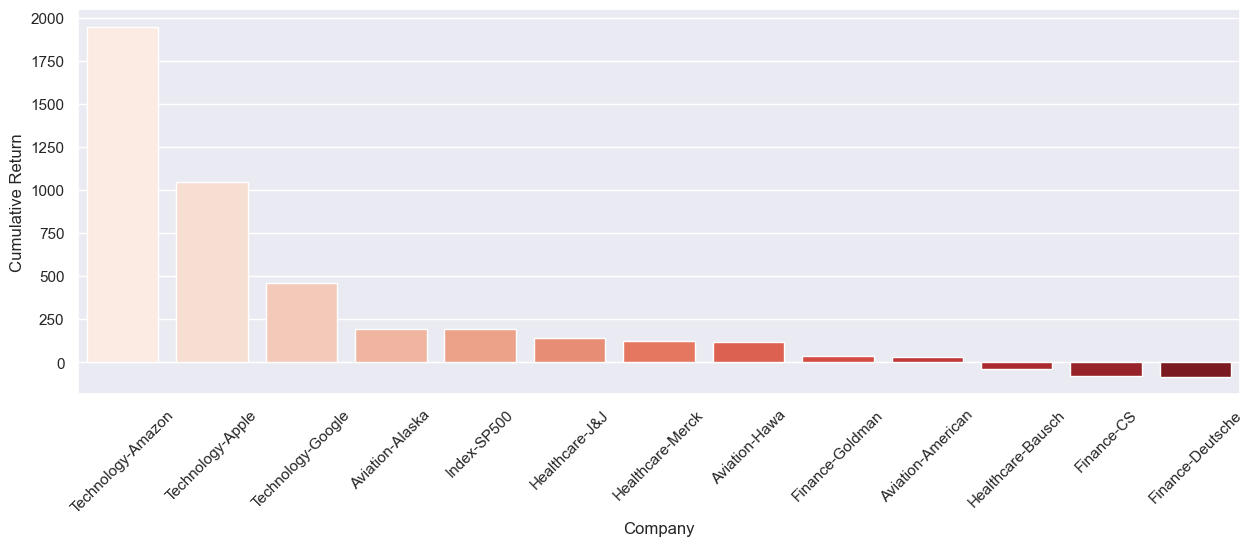

In [275]:
# Creating a custom color palette

custom_palette = sns.color_palette("Reds", n_colors=len(capm_df))

plt.figure(figsize=[15, 5])
sns.barplot(
    data=capm_df.sort_values("Cumulative Return", ascending=False),
    x="Stocks",
    y="Cumulative Return",
    palette=custom_palette
)
plt.xticks(rotation=45)
plt.xlabel('Company')
plt.show()


##### Observation:
- Technology stocks have yielded the highest cumulative returns.

- Three stocks, including two from the finance sector and one from healthcare, have reported negative returns.

- To align with the client's investment objectives, stocks with negative returns will not be included in the portfolio.

In [276]:
# 4. Annualised Risk
# Calculating Annualised Risk

annualised_risk = []

for i in daily_returns.columns:
    annualised_risk.append(daily_returns[i].std()*np.sqrt(252))

In [277]:
# Adding Annualized Risk column to the dataframe

capm_df['Annualised Risk']= annualised_risk

capm_df['Annualised Risk']=round(capm_df['Annualised Risk'],2)

In [278]:
# Checking the data
capm_df

Stocks  Annualised Returns  Cumulative Return  Annualised Risk
0     Aviation-Alaska               17.87             194.28            37.40
1   Aviation-American               16.03              32.29            51.95
2       Aviation-Hawa               19.29             116.28            47.86
3          Finance-CS               -8.19             -76.39            35.25
4    Finance-Deutsche               -9.62             -84.03            41.87
5     Finance-Goldman                7.32              36.07            29.10
6   Healthcare-Bausch               11.71             -39.65            56.67
7      Healthcare-J&J               10.30             141.10            17.22
8    Healthcare-Merck               10.34             126.64            20.72
9         Index-SP500               12.29             193.39            17.36
10  Technology-Amazon               35.22            1948.49            31.57
11   Technology-Apple               28.40            1047.77            28.13
12  Technology-Google               20.60             461.28            25.86

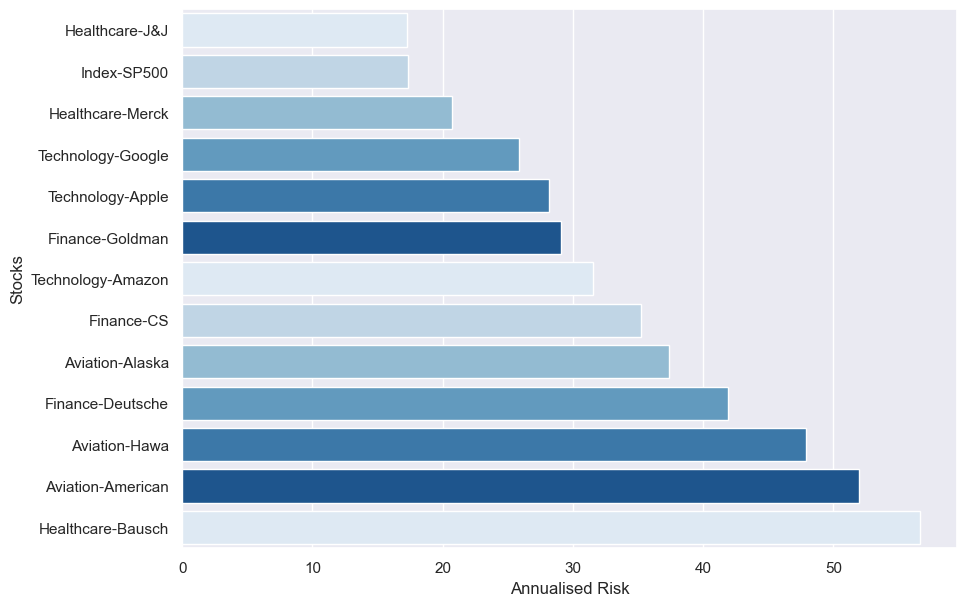

In [280]:
# Using a sequential color palette

sequential_palette = sns.color_palette("Blues")

plt.figure(figsize=[10, 7])
sns.barplot(
    data=capm_df.sort_values('Annualised Risk', ascending=True),
    x="Annualised Risk",
    y="Stocks",
    palette=sequential_palette
)
plt.xlabel('Annualised Risk')
plt.show()


##### Observation:
- Risk is high among all the stocks of aviation industry.
- In Finance industry, all stocks are riskier than the index;
- Healthcare industry has the most risky and least risky stocks; Bausch is the riskiest among all the stocks in other industry as well while Jhonson &Jhonson is has the least annualised risk and the only stock which is less riskier than the index among all.
- All the three stocks in Technology industry stocks have moderate risk.

In [281]:
# 5. Sharpe Ratio

- The Sharpe ratio, a crucial metric in the Capital Asset Pricing Model (CAPM), serves as a composite indicator, taking into account both a stock's risk and return. A Sharpe ratio exceeding 1 is considered a strong performance, while stocks with a negative value should be steered clear of.

- The procedure involves:

    - Computing the Sharpe ratio
    - Incorporating the outcome into the Risk-Return dataframe


In [283]:
#Calculating Sharpe Ratio with a Risk Free Rate of Return of 0.75%

capm_df['Sharpe Ratio'] = round((capm_df['Annualised Returns']-0.0075)/capm_df['Annualised Risk'],2)

In [284]:
capm_df

Stocks  Annualised Returns  Cumulative Return  Annualised Risk  \
0     Aviation-Alaska               17.87             194.28            37.40   
1   Aviation-American               16.03              32.29            51.95   
2       Aviation-Hawa               19.29             116.28            47.86   
3          Finance-CS               -8.19             -76.39            35.25   
4    Finance-Deutsche               -9.62             -84.03            41.87   
5     Finance-Goldman                7.32              36.07            29.10   
6   Healthcare-Bausch               11.71             -39.65            56.67   
7      Healthcare-J&J               10.30             141.10            17.22   
8    Healthcare-Merck               10.34             126.64            20.72   
9         Index-SP500               12.29             193.39            17.36   
10  Technology-Amazon               35.22            1948.49            31.57   
11   Technology-Apple               28.40            1047.77            28.13   
12  Technology-Google               20.60             461.28            25.86   

    Sharpe Ratio  
0           0.48  
1           0.31  
2           0.40  
3          -0.23  
4          -0.23  
5           0.25  
6           0.21  
7           0.60  
8           0.50  
9           0.71  
10          1.12  
11          1.01  
12          0.80

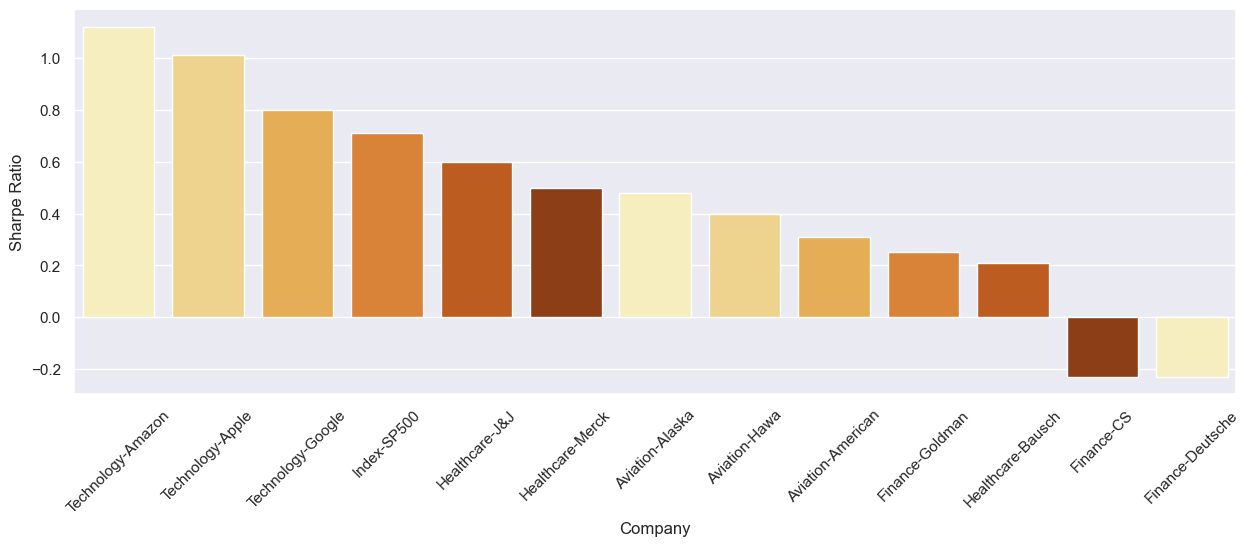

In [285]:
# Using a sequential color palette

sequential_palette = sns.color_palette("YlOrBr")

plt.figure(figsize=[15, 5])
sns.barplot(
    data=capm_df.sort_values("Sharpe Ratio", ascending=False),
    x="Stocks",
    y="Sharpe Ratio",
    palette=sequential_palette
)
plt.xticks(rotation=45)
plt.xlabel('Company')
plt.show()


In [286]:
# 6. Beta
# Beta for the Stocks

Beta, a gauge of volatility, provides insights into the extent to which a stock's price tends to oscillate in relation to the broader market. This measure aids in evaluating the anticipated return associated with the stock.

In [287]:
Beta=[]
for i in range (0,13):

    def find_beta(df):
        np_array = df.values
        m = np_array[:,9] # market returns are column zero from numpy array
        s = np_array[:,i] # stock returns are column one from numpy array
        covariance = np.cov(s,m) # Calculate covariance between stock and market
        beta = covariance[0,1]/covariance[1,1]
        return Beta.append(beta)
    find_beta(daily_returns)

In [288]:
Beta = pd.DataFrame(Beta, index =daily_returns.columns.values,columns =['Beta'])
Beta

Beta
Aviation-Alaska    1.231484
Aviation-American  1.353639
Aviation-Hawa      1.233664
Finance-CS         1.369945
Finance-Deutsche   1.537556
Finance-Goldman    1.301359
Healthcare-Bausch  1.315965
Healthcare-J&J     0.662243
Healthcare-Merck   0.733472
Index-SP500        1.000000
Technology-Amazon  0.998854
Technology-Apple   1.063317
Technology-Google  1.013406

In [289]:
Beta_reset = Beta.reset_index()

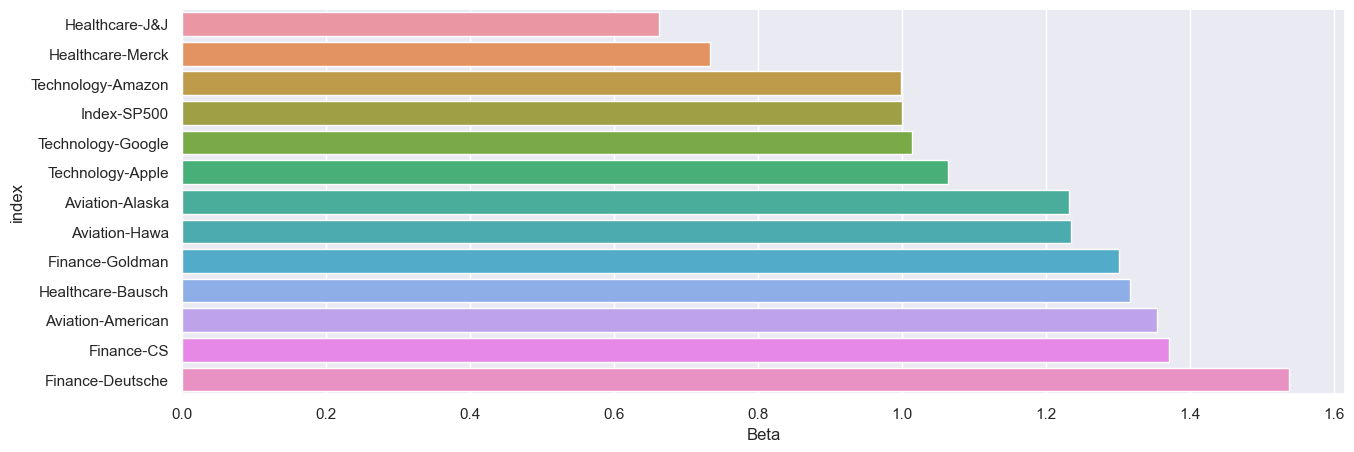

In [290]:
plt.figure(figsize=[15,5])
sns.barplot(data=Beta_reset.sort_values('Beta', ascending=True),x="Beta",y="index", label = 'Beta')
plt.xlabel('Beta') 
plt.show()

In [291]:
capm_df

Stocks  Annualised Returns  Cumulative Return  Annualised Risk  \
0     Aviation-Alaska               17.87             194.28            37.40   
1   Aviation-American               16.03              32.29            51.95   
2       Aviation-Hawa               19.29             116.28            47.86   
3          Finance-CS               -8.19             -76.39            35.25   
4    Finance-Deutsche               -9.62             -84.03            41.87   
5     Finance-Goldman                7.32              36.07            29.10   
6   Healthcare-Bausch               11.71             -39.65            56.67   
7      Healthcare-J&J               10.30             141.10            17.22   
8    Healthcare-Merck               10.34             126.64            20.72   
9         Index-SP500               12.29             193.39            17.36   
10  Technology-Amazon               35.22            1948.49            31.57   
11   Technology-Apple               28.40            1047.77            28.13   
12  Technology-Google               20.60             461.28            25.86   

    Sharpe Ratio  
0           0.48  
1           0.31  
2           0.40  
3          -0.23  
4          -0.23  
5           0.25  
6           0.21  
7           0.60  
8           0.50  
9           0.71  
10          1.12  
11          1.01  
12          0.80

In [292]:
capm_df=capm_df.set_index('Stocks')

In [293]:
capm_df

Annualised Returns  Cumulative Return  Annualised Risk  \
Stocks                                                                      
Aviation-Alaska                 17.87             194.28            37.40   
Aviation-American               16.03              32.29            51.95   
Aviation-Hawa                   19.29             116.28            47.86   
Finance-CS                      -8.19             -76.39            35.25   
Finance-Deutsche                -9.62             -84.03            41.87   
Finance-Goldman                  7.32              36.07            29.10   
Healthcare-Bausch               11.71             -39.65            56.67   
Healthcare-J&J                  10.30             141.10            17.22   
Healthcare-Merck                10.34             126.64            20.72   
Index-SP500                     12.29             193.39            17.36   
Technology-Amazon               35.22            1948.49            31.57   
Technology-Apple                28.40            1047.77            28.13   
Technology-Google               20.60             461.28            25.86   

                   Sharpe Ratio  
Stocks                           
Aviation-Alaska            0.48  
Aviation-American          0.31  
Aviation-Hawa              0.40  
Finance-CS                -0.23  
Finance-Deutsche          -0.23  
Finance-Goldman            0.25  
Healthcare-Bausch          0.21  
Healthcare-J&J             0.60  
Healthcare-Merck           0.50  
Index-SP500                0.71  
Technology-Amazon          1.12  
Technology-Apple           1.01  
Technology-Google          0.80

In [294]:
capm_df=pd.concat([capm_df, Beta['Beta']], axis=1)
capm_df

Annualised Returns  Cumulative Return  Annualised Risk  \
Aviation-Alaska                 17.87             194.28            37.40   
Aviation-American               16.03              32.29            51.95   
Aviation-Hawa                   19.29             116.28            47.86   
Finance-CS                      -8.19             -76.39            35.25   
Finance-Deutsche                -9.62             -84.03            41.87   
Finance-Goldman                  7.32              36.07            29.10   
Healthcare-Bausch               11.71             -39.65            56.67   
Healthcare-J&J                  10.30             141.10            17.22   
Healthcare-Merck                10.34             126.64            20.72   
Index-SP500                     12.29             193.39            17.36   
Technology-Amazon               35.22            1948.49            31.57   
Technology-Apple                28.40            1047.77            28.13   
Technology-Google               20.60             461.28            25.86   

                   Sharpe Ratio      Beta  
Aviation-Alaska            0.48  1.231484  
Aviation-American          0.31  1.353639  
Aviation-Hawa              0.40  1.233664  
Finance-CS                -0.23  1.369945  
Finance-Deutsche          -0.23  1.537556  
Finance-Goldman            0.25  1.301359  
Healthcare-Bausch          0.21  1.315965  
Healthcare-J&J             0.60  0.662243  
Healthcare-Merck           0.50  0.733472  
Index-SP500                0.71  1.000000  
Technology-Amazon          1.12  0.998854  
Technology-Apple           1.01  1.063317  
Technology-Google          0.80  1.013406

##### Observation:
- Stocks with lower volatility, indicated by a Beta value less than 1, are J&J, Merck, and Amazon. They exhibit relatively less price fluctuation compared to the broader market.

- On the other hand, stocks with higher volatility, characterized by a Beta greater than 1, include all other stocks. However, it's worth noting that Apple and Google's volatility is only slightly higher than that of the market.

In [296]:
# 7. Expected Returns

rm=capm_df['Annualised Returns'].iloc[-4]

In [297]:
# Create a column for expected return

capm_df['Expected Return'] = 0.75+capm_df['Beta']*(rm-0.75)
capm_df

Annualised Returns  Cumulative Return  Annualised Risk  \
Aviation-Alaska                 17.87             194.28            37.40   
Aviation-American               16.03              32.29            51.95   
Aviation-Hawa                   19.29             116.28            47.86   
Finance-CS                      -8.19             -76.39            35.25   
Finance-Deutsche                -9.62             -84.03            41.87   
Finance-Goldman                  7.32              36.07            29.10   
Healthcare-Bausch               11.71             -39.65            56.67   
Healthcare-J&J                  10.30             141.10            17.22   
Healthcare-Merck                10.34             126.64            20.72   
Index-SP500                     12.29             193.39            17.36   
Technology-Amazon               35.22            1948.49            31.57   
Technology-Apple                28.40            1047.77            28.13   
Technology-Google               20.60             461.28            25.86   

                   Sharpe Ratio      Beta  Expected Return  
Aviation-Alaska            0.48  1.231484        14.961331  
Aviation-American          0.31  1.353639        16.370992  
Aviation-Hawa              0.40  1.233664        14.986488  
Finance-CS                -0.23  1.369945        16.559167  
Finance-Deutsche          -0.23  1.537556        18.493391  
Finance-Goldman            0.25  1.301359        15.767683  
Healthcare-Bausch          0.21  1.315965        15.936240  
Healthcare-J&J             0.60  0.662243         8.392285  
Healthcare-Merck           0.50  0.733472         9.214265  
Index-SP500                0.71  1.000000        12.290000  
Technology-Amazon          1.12  0.998854        12.276777  
Technology-Apple           1.01  1.063317        13.020675  
Technology-Google          0.80  1.013406        12.444706

In [298]:
# Plotting the Expected Return of all the stocks

capm_df=capm_df.reset_index()

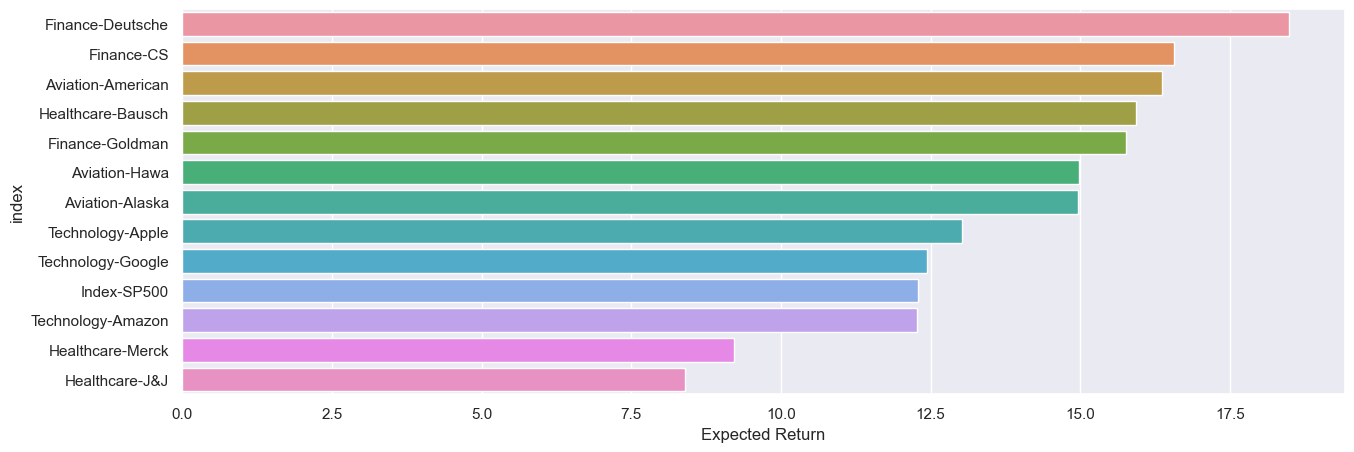

In [300]:
plt.figure(figsize=[15,5])
sns.barplot(data=capm_df.sort_values('Expected Return', ascending=False),x="Expected Return",y="index", label = 'Expected Return')
plt.xlabel('Expected Return') 
plt.show()

In [301]:
capm_df.to_csv('capm1.csv')

- Having concluded the analysis of stocks by leveraging the essential CAPM metrics, the next step involves constructing a tailored portfolio that aligns with the client's specific financial objectives. This portfolio will be crafted by carefully evaluating each stock according to the insights derived from these metrics.

The portfolio construction must be tailored to the specific profile and financial aspirations of the client, Alexandra. Here are the key considerations based on her persona and business goals:

- Profile: Alexandra is the daughter of a Ukrainian business magnate and is currently pursuing her college education in the United States.

- Financial Situation: She has substantial savings accumulated from her parents, but the exact amount remains undisclosed.

- Future Vision: Alexandra has ambitious plans to establish an NGO in the future, and she is determined not to rely on financial assistance from her family for this endeavor.

- Investment Objective: She aims to invest her savings wisely during her college years with the objective of utilizing the matured funds for her NGO.

- Risk Appetite: As a conservative investor, Alexandra prioritizes investments that offer stable returns while minimizing the risk.

- Active Involvement: Alexandra desires a comprehensive and detailed report on all the metrics utilized to shape the investment strategy.

We may have to assume the following:

- Let the investment amount be 500000 USD
- Let's assume she is in the first year of her 3 year degree; hence her investment term can be 3 years.
- Considering the above, we need to build a portfolio consisting of stocks with good returns and low to moderate risk that are less volatile.

The selection of stocks for Alexandra's portfolio is guided by specific criteria to ensure they align with her conservative investment approach and long-term financial goals. Here are the criteria for selecting stocks in the portfolio:

- Positive Annualized Returns: Stocks chosen for the portfolio must exhibit positive annualized returns. This criterion ensures that the selected stocks have a history of providing returns over the long term.

- Positive Cumulative Returns: Alexandra's portfolio includes stocks with positive cumulative returns. This factor takes into account the overall performance and profitability of the chosen stocks.

- Sharpe Ratio Exceeds Index: The Sharpe Ratio, a key metric under the Capital Asset Pricing Model (CAPM), is expected to be greater than the Index. This indicates that the portfolio's risk-adjusted return is superior to that of the market.

- Beta Matching the Market: Selected stocks should have a Beta that aligns with the Market Index. This helps manage volatility and ensures that the stocks' price fluctuations correspond closely with the overall market.

- Positive Expected Returns: Stocks in the portfolio should demonstrate positive expected returns, further emphasizing the potential for financial growth.

In [302]:
capm_df=capm_df.reset_index()         

In [303]:
capm_df

level_0              index  Annualised Returns  Cumulative Return  \
0         0    Aviation-Alaska               17.87             194.28   
1         1  Aviation-American               16.03              32.29   
2         2      Aviation-Hawa               19.29             116.28   
3         3         Finance-CS               -8.19             -76.39   
4         4   Finance-Deutsche               -9.62             -84.03   
5         5    Finance-Goldman                7.32              36.07   
6         6  Healthcare-Bausch               11.71             -39.65   
7         7     Healthcare-J&J               10.30             141.10   
8         8   Healthcare-Merck               10.34             126.64   
9         9        Index-SP500               12.29             193.39   
10       10  Technology-Amazon               35.22            1948.49   
11       11   Technology-Apple               28.40            1047.77   
12       12  Technology-Google               20.60             461.28   

    Annualised Risk  Sharpe Ratio      Beta  Expected Return  
0             37.40          0.48  1.231484        14.961331  
1             51.95          0.31  1.353639        16.370992  
2             47.86          0.40  1.233664        14.986488  
3             35.25         -0.23  1.369945        16.559167  
4             41.87         -0.23  1.537556        18.493391  
5             29.10          0.25  1.301359        15.767683  
6             56.67          0.21  1.315965        15.936240  
7             17.22          0.60  0.662243         8.392285  
8             20.72          0.50  0.733472         9.214265  
9             17.36          0.71  1.000000        12.290000  
10            31.57          1.12  0.998854        12.276777  
11            28.13          1.01  1.063317        13.020675  
12            25.86          0.80  1.013406        12.444706

In [304]:
# Dropping the Stocks having negetive Annualised returns

portfolio=capm_df.loc[(capm_df['Annualised Returns'] > 0.0)]
portfolio

level_0              index  Annualised Returns  Cumulative Return  \
0         0    Aviation-Alaska               17.87             194.28   
1         1  Aviation-American               16.03              32.29   
2         2      Aviation-Hawa               19.29             116.28   
5         5    Finance-Goldman                7.32              36.07   
6         6  Healthcare-Bausch               11.71             -39.65   
7         7     Healthcare-J&J               10.30             141.10   
8         8   Healthcare-Merck               10.34             126.64   
9         9        Index-SP500               12.29             193.39   
10       10  Technology-Amazon               35.22            1948.49   
11       11   Technology-Apple               28.40            1047.77   
12       12  Technology-Google               20.60             461.28   

    Annualised Risk  Sharpe Ratio      Beta  Expected Return  
0             37.40          0.48  1.231484        14.961331  
1             51.95          0.31  1.353639        16.370992  
2             47.86          0.40  1.233664        14.986488  
5             29.10          0.25  1.301359        15.767683  
6             56.67          0.21  1.315965        15.936240  
7             17.22          0.60  0.662243         8.392285  
8             20.72          0.50  0.733472         9.214265  
9             17.36          0.71  1.000000        12.290000  
10            31.57          1.12  0.998854        12.276777  
11            28.13          1.01  1.063317        13.020675  
12            25.86          0.80  1.013406        12.444706

In [305]:
# Dropping the Stocks having negetive Cummulative returns

portfolio=portfolio.loc[(portfolio ['Cumulative Return'] > 0)]
portfolio

level_0              index  Annualised Returns  Cumulative Return  \
0         0    Aviation-Alaska               17.87             194.28   
1         1  Aviation-American               16.03              32.29   
2         2      Aviation-Hawa               19.29             116.28   
5         5    Finance-Goldman                7.32              36.07   
7         7     Healthcare-J&J               10.30             141.10   
8         8   Healthcare-Merck               10.34             126.64   
9         9        Index-SP500               12.29             193.39   
10       10  Technology-Amazon               35.22            1948.49   
11       11   Technology-Apple               28.40            1047.77   
12       12  Technology-Google               20.60             461.28   

    Annualised Risk  Sharpe Ratio      Beta  Expected Return  
0             37.40          0.48  1.231484        14.961331  
1             51.95          0.31  1.353639        16.370992  
2             47.86          0.40  1.233664        14.986488  
5             29.10          0.25  1.301359        15.767683  
7             17.22          0.60  0.662243         8.392285  
8             20.72          0.50  0.733472         9.214265  
9             17.36          0.71  1.000000        12.290000  
10            31.57          1.12  0.998854        12.276777  
11            28.13          1.01  1.063317        13.020675  
12            25.86          0.80  1.013406        12.444706

In [306]:
# Dropping the Stocks having Sharpe Ratio more than index

sharpe_index=portfolio['Sharpe Ratio'].iloc[-4]
portfolio=capm_df.loc[(capm_df['Sharpe Ratio'] > sharpe_index)]
portfolio

level_0              index  Annualised Returns  Cumulative Return  \
10       10  Technology-Amazon               35.22            1948.49   
11       11   Technology-Apple               28.40            1047.77   
12       12  Technology-Google               20.60             461.28   

    Annualised Risk  Sharpe Ratio      Beta  Expected Return  
10            31.57          1.12  0.998854        12.276777  
11            28.13          1.01  1.063317        13.020675  
12            25.86          0.80  1.013406        12.444706

In [307]:
portfolio.columns

Index(['level_0', 'index', 'Annualised Returns', 'Cumulative Return',
       'Annualised Risk', 'Sharpe Ratio', 'Beta', 'Expected Return'],
      dtype='object')

In [308]:
portfolio.drop(['level_0'], axis=1)

index  Annualised Returns  Cumulative Return  Annualised Risk  \
10  Technology-Amazon               35.22            1948.49            31.57   
11   Technology-Apple               28.40            1047.77            28.13   
12  Technology-Google               20.60             461.28            25.86   

    Sharpe Ratio      Beta  Expected Return  
10          1.12  0.998854        12.276777  
11          1.01  1.063317        13.020675  
12          0.80  1.013406        12.444706

In [309]:
portfolio= portfolio.set_index('index')

In [310]:
portfolio

level_0  Annualised Returns  Cumulative Return  \
index                                                               
Technology-Amazon       10               35.22            1948.49   
Technology-Apple        11               28.40            1047.77   
Technology-Google       12               20.60             461.28   

                   Annualised Risk  Sharpe Ratio      Beta  Expected Return  
index                                                                        
Technology-Amazon            31.57          1.12  0.998854        12.276777  
Technology-Apple             28.13          1.01  1.063317        13.020675  
Technology-Google            25.86          0.80  1.013406        12.444706

In [311]:
portfolio.drop(['level_0'], axis=1)

Annualised Returns  Cumulative Return  Annualised Risk  \
index                                                                       
Technology-Amazon               35.22            1948.49            31.57   
Technology-Apple                28.40            1047.77            28.13   
Technology-Google               20.60             461.28            25.86   

                   Sharpe Ratio      Beta  Expected Return  
index                                                       
Technology-Amazon          1.12  0.998854        12.276777  
Technology-Apple           1.01  1.063317        13.020675  
Technology-Google          0.80  1.013406        12.444706

##### Observation:
The final portfolio includes Amazon, Google, and Apple, ordered by their Beta values. Higher Beta values correspond to increased Expected Returns, indicating a relationship between potential return and market risk. This portfolio balances Alexandra's conservative investment approach, considering both risk and return.

In [312]:
# Calculating return from the chosen portfolio
# The investment amount is assumed to be 500000 USD

investment=500000
portfolio_stocklist =['Technology-Amazon','Technology-Apple', "Technology-Google"]
weight = 1/len(portfolio_stocklist)

portfolio["Stock Return"] = portfolio["Cumulative Return"]
portfolio["Invested Amount"] = investment*weight
portfolio["Stock Value"] = round(portfolio["Invested Amount"] * (1+portfolio["Stock Return"]/100),2)
portfolio

level_0  Annualised Returns  Cumulative Return  \
index                                                               
Technology-Amazon       10               35.22            1948.49   
Technology-Apple        11               28.40            1047.77   
Technology-Google       12               20.60             461.28   

                   Annualised Risk  Sharpe Ratio      Beta  Expected Return  \
index                                                                         
Technology-Amazon            31.57          1.12  0.998854        12.276777   
Technology-Apple             28.13          1.01  1.063317        13.020675   
Technology-Google            25.86          0.80  1.013406        12.444706   

                   Stock Return  Invested Amount  Stock Value  
index                                                          
Technology-Amazon       1948.49    166666.666667   3414150.00  
Technology-Apple        1047.77    166666.666667   1912950.00  
Technology-Google        461.28    166666.666667    935466.67

In [313]:
portfolio=portfolio.reset_index()

In [314]:
portfolio=portfolio.drop(['level_0'], axis=1)

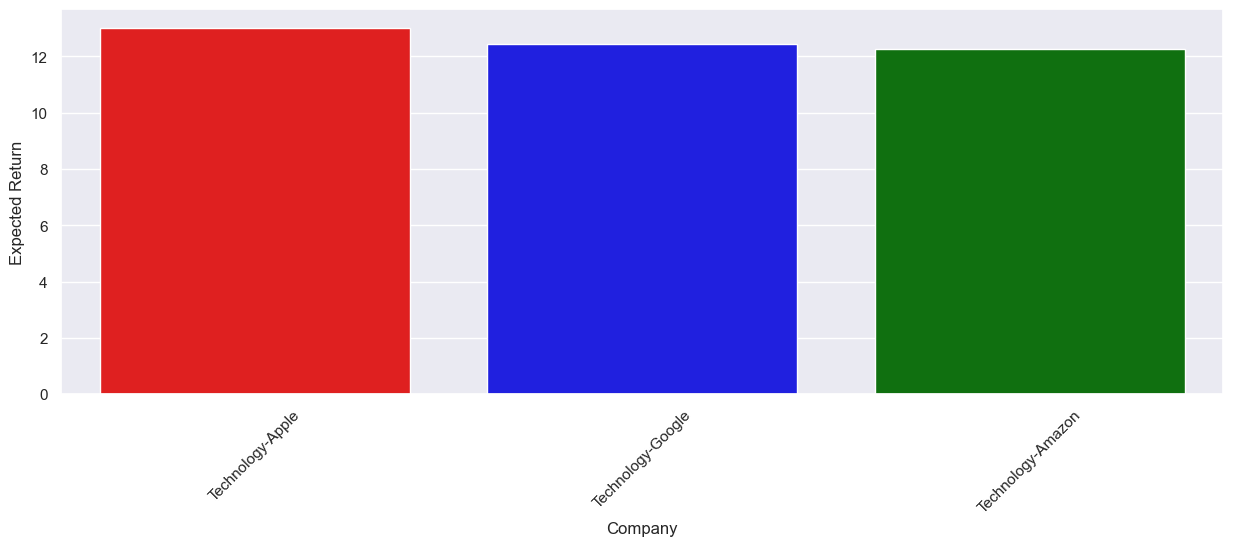

In [315]:
# Defining a custom color palette with red, blue, and green colors

custom_palette = ["red", "blue", "green"]

plt.figure(figsize=[15, 5])
sns.barplot(
    data=portfolio.sort_values("Expected Return", ascending=False),
    x="index",
    y="Expected Return",
    palette=custom_palette
)
plt.xticks(rotation=45)
plt.xlabel('Company')
plt.show()


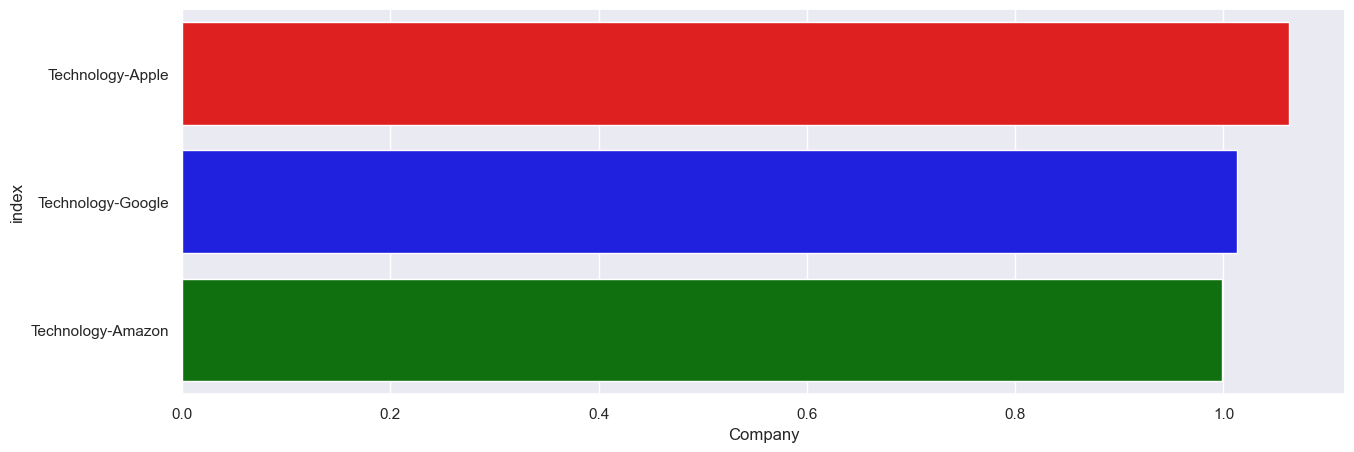

In [316]:
# Defining a custom color palette with red, blue, and green colors

custom_palette = ["red", "blue", "green"]

plt.figure(figsize=[15, 5])
sns.barplot(
    data=portfolio.sort_values("Beta", ascending=False),
    y="index",  
    x="Beta",
    palette=custom_palette
)
plt.xlabel('Company')
plt.show()


In [154]:
# Value of Portfolio in 10 years 

portfolio_val = portfolio["Stock Value"].sum()
print(portfolio_val)

6262566.67


In [317]:
# Calculating the return on investment for 10 years

roi = ((portfolio_val - investment)/investment).round(2)
roi

11.53

In [318]:
# Annualised Rate of return for the 10 years

period = 10
roi_annual=((1+roi)**(1/period)-1).round(2)
roi_annual

0.29

In [320]:
# Portfolio risk

portfolio_risk = (portfolio["Annualised Risk"]*weight).sum().round(2)
print(portfolio_risk)

28.52


##### Observation:
- An initial investment of 500,000 USD would have appreciated to approximately 6.26 million USD over the course of a decade when equally distributed among Amazon, Google, and Apple.

- The portfolio demonstrates a remarkable annualized return on investment of 29%, significantly outperforming the market.

- However, it's important to note that this impressive return comes with a relatively high risk rate of 28%, compared to the index's risk rate of 17%.

## Stock Price Prediction

In [321]:
# Exploring the prices dataframe
prices.head()

Aviation-Alaska  Aviation-American  Aviation-Hawa  Finance-CS  \
Date                                                                        
2010-10-01          12.4475               9.29           5.96   42.226563   
2010-10-04          12.1425               9.12           5.75   41.914063   
2010-10-05          12.2150               9.23           5.85   43.154297   
2010-10-06          12.1875               9.23           5.97   43.437500   
2010-10-07          11.6250               9.24           6.15   43.671875   

            Finance-Deutsche  Finance-Goldman  Healthcare-Bausch  \
Date                                                               
2010-10-01         52.595421       147.699997          25.750000   
2010-10-04         51.755726       146.570007          25.870001   
2010-10-05         53.950382       149.570007          26.299999   
2010-10-06         54.608780       150.839996          26.690001   
2010-10-07         54.036259       151.110001          26.600000   

            Healthcare-J&J  Healthcare-Merck  Index-SP500  Technology-Amazon  \
Date                                                                           
2010-10-01       61.750000         36.599998  1146.239990         153.710007   
2010-10-04       61.669998         36.520000  1137.030029         155.389999   
2010-10-05       62.799999         37.020000  1160.750000         160.869995   
2010-10-06       63.209999         37.009998  1159.969971         155.399994   
2010-10-07       63.220001         36.709999  1158.060059         156.270004   

            Technology-Apple  Technology-Google  
Date                                             
2010-10-01         10.090000         261.828613  
2010-10-04          9.951428         260.199707  
2010-10-05         10.319285         268.110046  
2010-10-06         10.328215         266.177307  
2010-10-07         10.329286         264.015411

In [322]:
prices=prices.reset_index()

In [323]:
df=prices.drop(['Date','Aviation-Alaska','Aviation-American', 'Aviation-Hawa', 'Finance-CS', 'Finance-Deutsche',
                             'Finance-Goldman', 'Healthcare-Bausch', 'Healthcare-J&J','Healthcare-Merck', 'Index-SP500'],axis=1)
df.head()

Technology-Amazon  Technology-Apple  Technology-Google
0         153.710007         10.090000         261.828613
1         155.389999          9.951428         260.199707
2         160.869995         10.319285         268.110046
3         155.399994         10.328215         266.177307
4         156.270004         10.329286         264.015411

In [324]:
df.rename(columns = {'Healthcare-J&J':'J&J', 'Technology-Amazon':'Amazon', 'Technology-Apple':'Apple', 'Technology-Google':'Google'}, inplace = True)
df.head()

Amazon      Apple      Google
0  153.710007  10.090000  261.828613
1  155.389999   9.951428  260.199707
2  160.869995  10.319285  268.110046
3  155.399994  10.328215  266.177307
4  156.270004  10.329286  264.015411

#### Test for Stationarity 

In [325]:
# Augmented Dickey-Fuller (ADF) test

from statsmodels.tsa.stattools import adfuller

for col in df.columns:
    adf_test = adfuller(df[col])

    print(col)
    print('ADF Statistic: %f' % adf_test[0])
    print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
    print('p-value: %f' % adf_test[1])
    
    if adf_test[1] >= 0.05:
        print("\nSeries is Non-Stationary")
    else:
        print("\nSeries is Stationary")
        
    print('\n--------------------------------------\n')

Amazon
ADF Statistic: 2.739671
Critical Values @ 0.05: -2.86
p-value: 0.999088

Series is Non-Stationary

--------------------------------------

Apple
ADF Statistic: 2.709617
Critical Values @ 0.05: -2.86
p-value: 0.999087

Series is Non-Stationary

--------------------------------------

Google
ADF Statistic: 0.188378
Critical Values @ 0.05: -2.86
p-value: 0.971602

Series is Non-Stationary

--------------------------------------



In [326]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to check for stationarity
# Creating a function for testing all the columns

from statsmodels.tsa.stattools import kpss

for col in df.columns:
    kpss_test = kpss(df[col])
    
    print(col)
    print('KPSS Statistic: %f' % kpss_test[0])
    print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
    print('p-value: %f' % kpss_test[1])
    
    if kpss_test[1] <= 0.05:
        print("\nSeries is Non-Stationary")
    else:
        print("\nSeries is Stationary")
        
    print('\n--------------------------------------\n')

Amazon
KPSS Statistic: 6.956628
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------

Apple
KPSS Statistic: 6.131432
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------

Google
KPSS Statistic: 7.892446
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------



##### Observation:
Both the Augmented Dickey-Fuller (ADF) and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) tests consistently indicate that the price data for all stocks are non-stationary.

In [327]:
from statsmodels.tsa.arima.model import ARIMA

for col in df.columns:
    model = ARIMA(df[col], order=(1, 1, 1))  # Example order parameters
    results = model.fit()
    print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                 Amazon   No. Observations:                 2517
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11480.803
Date:                Mon, 23 Oct 2023   AIC                          22967.605
Time:                        01:47:32   BIC                          22985.096
Sample:                             0   HQIC                         22973.953
                               - 2517                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5430      0.073     -7.445      0.000      -0.686      -0.400
ma.L1          0.4740      0.077      6.190      0.000       0.324       0.624
sigma2       538.2897      4.956    108.609      0.0

##### Observation:
Amazon:
- The model indicates a moderate negative autocorrelation.
- The AIC and BIC are used for model selection, and lower values are better.
- The model residuals do not exhibit significant autocorrelation (good).
- Residuals are not normally distributed, as indicated by the extremely high Jarque-Bera test value.

Apple:
- Similar ARIMA model structure.
- AIC and BIC values suggest a relatively better model fit.
- The Ljung-Box test doesn't show significant autocorrelation in residuals.
- The Jarque-Bera test indicates non-normal distribution of residuals (very high value).

Google:
- Again, the model suggests an ARIMA(1,1,1) structure.
- AIC and BIC values are provided.
- No significant autocorrelation in residuals.
- The Jarque-Bera test suggests non-normality of residuals (very high value).

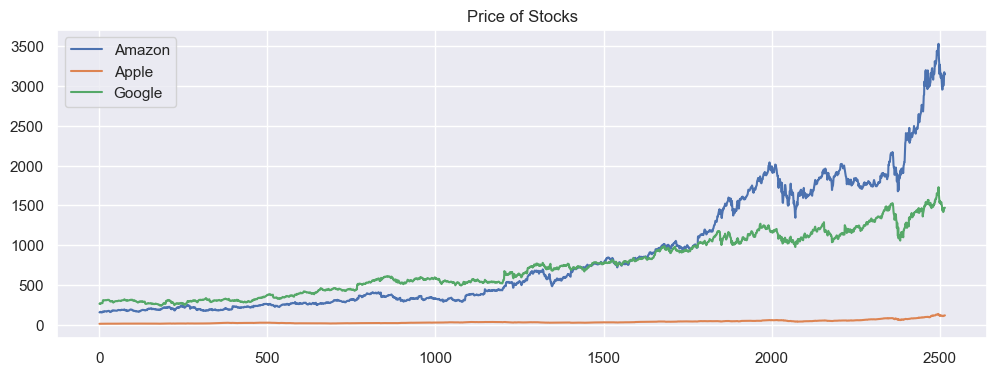

In [328]:
# Plotting the actual prices of all stocks

df.plot(figsize = (12,4))
plt.title("Price of Stocks")
plt.show()

##### Observation:
- The stock prices of Amazon and Google exhibit a noticeable upward trend over time, suggesting consistent growth. In contrast, Apple and J&J stocks appear relatively stable without significant trend variations.

- To understand the contributions of factors like trend, seasonality, and systemic risks in making these time series non-stationary, we perform time series decomposition in the next step. This analysis will help identify the underlying components affecting the stock price dynamics.

In [329]:
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

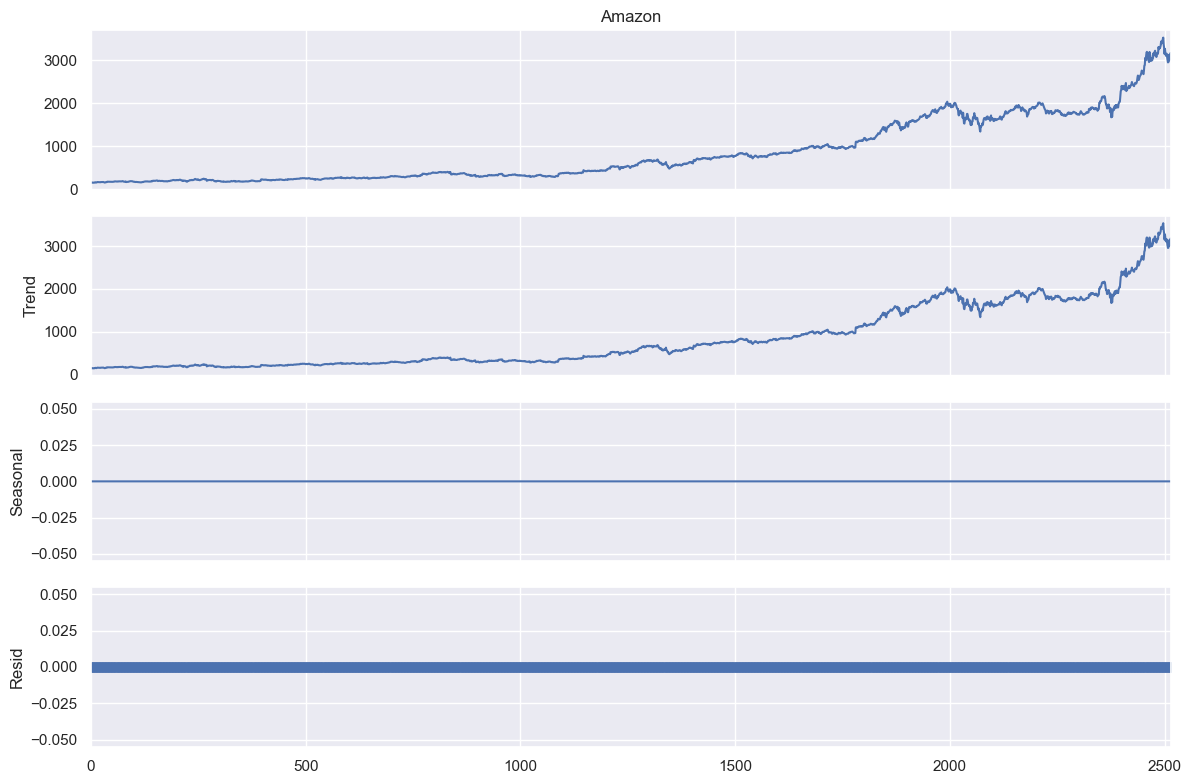

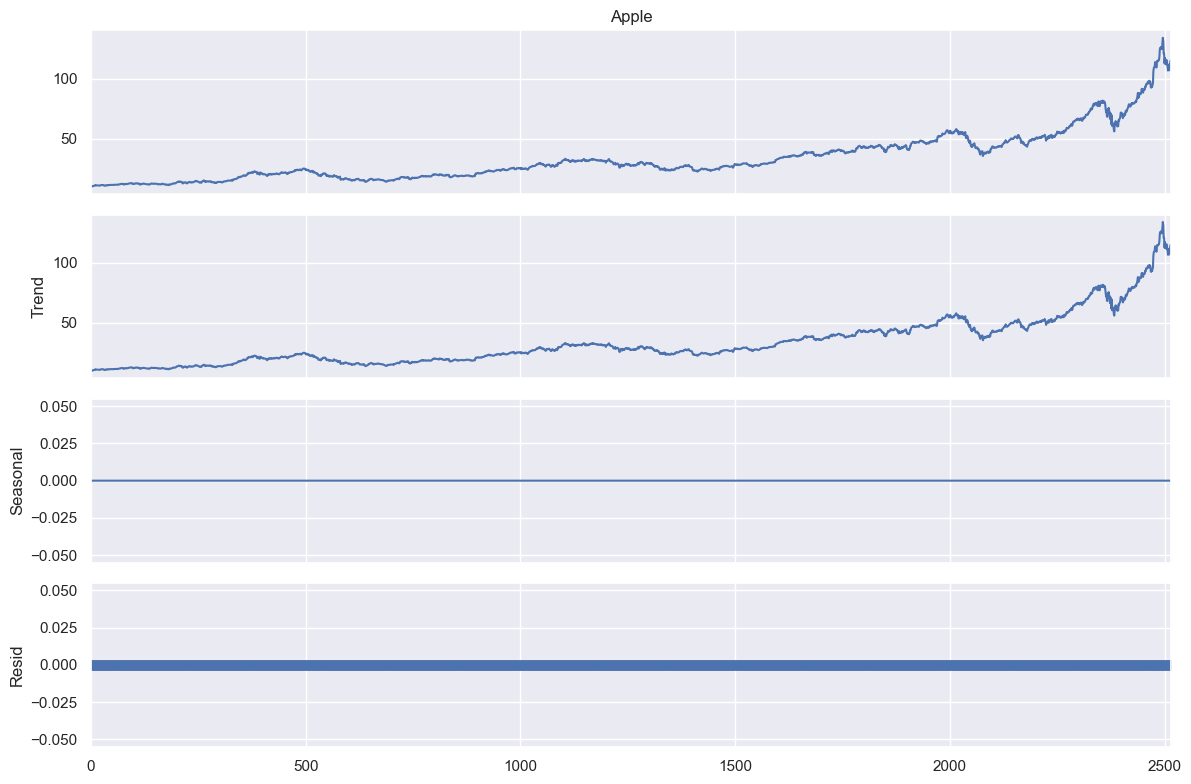

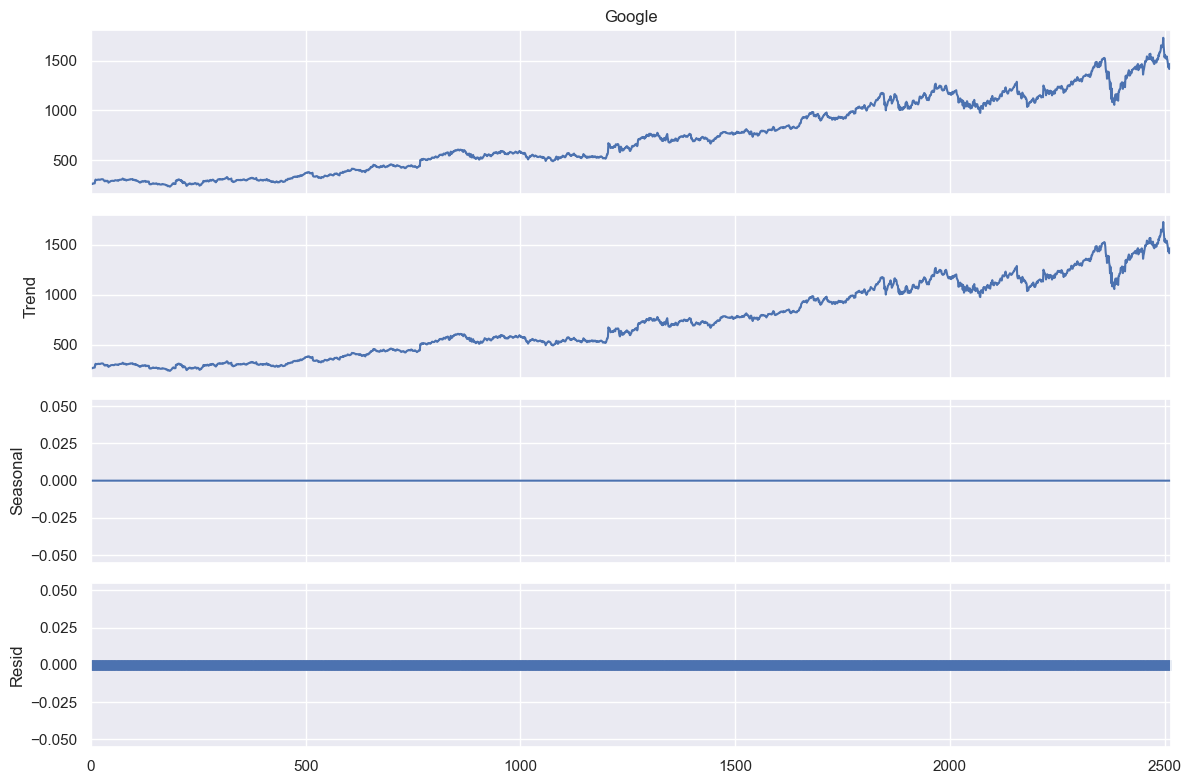

In [330]:
# Additive seasonal decomposition for all stocks

for col in df.columns:
    rcParams['figure.figsize'] = 12, 8
    add_result = seasonal_decompose(df[col], model='additive', period =1) # additive seasonal index
    fig = add_result.plot()
    plt.show()

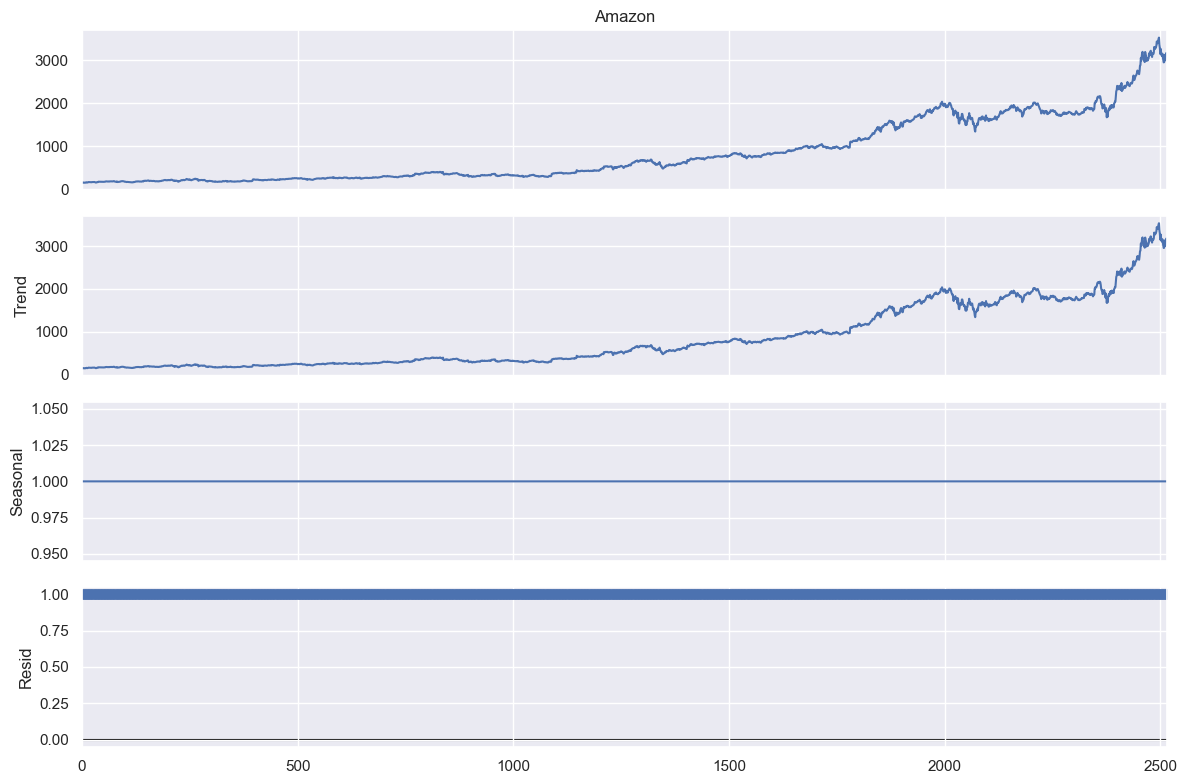

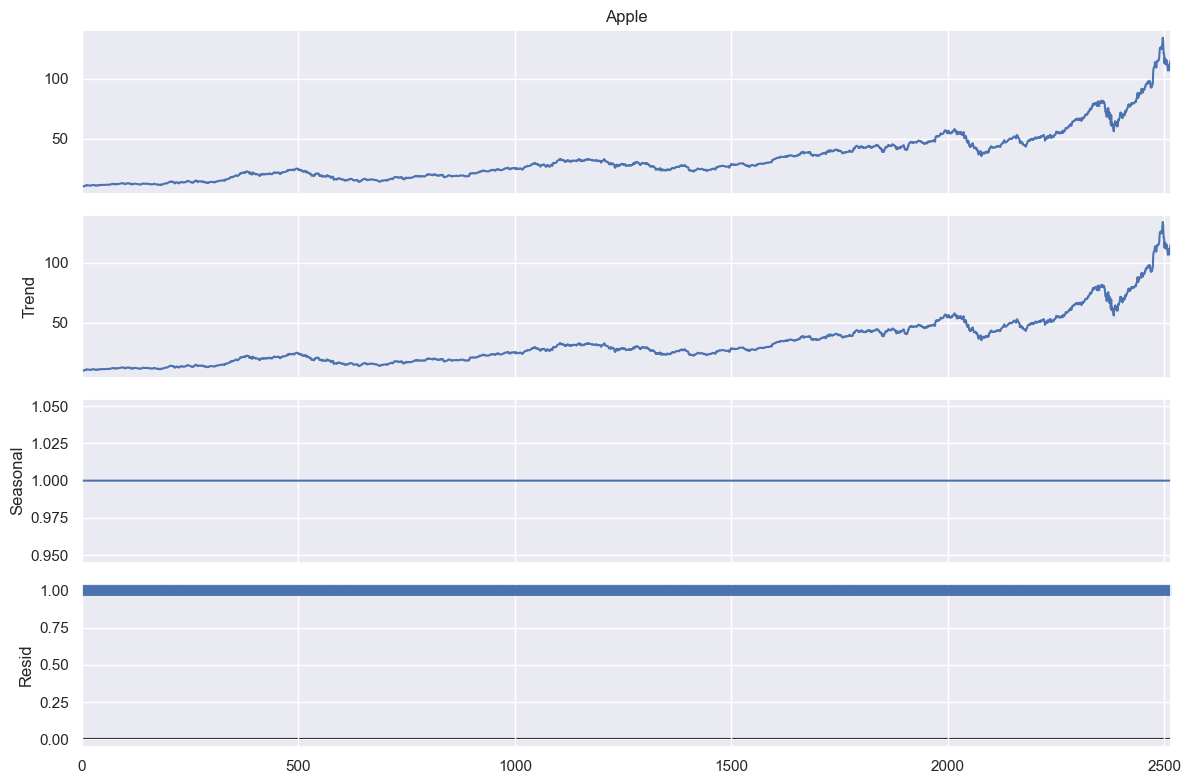

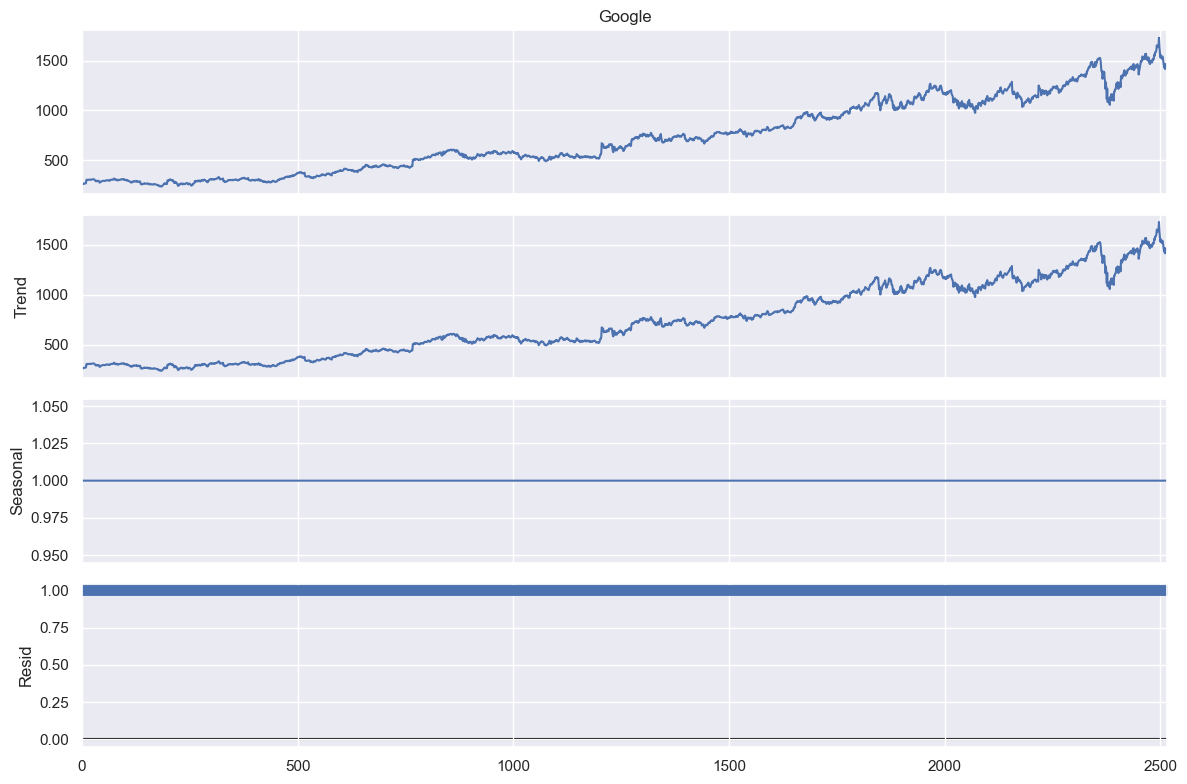

In [331]:
# Multiplicative seasonal decomposition for J&J

for col in df.columns:
    mul_result = seasonal_decompose(df[col], model='multiplicative', period=1) # multiplicative seasonal index
    fig = mul_result.plot()
    plt.show()

##### Observation:
- The data exhibits a clear upward trend.
- No evident seasonality or significant systemic effects are present in the residual components.
- Non-stationarity in the data is primarily attributed to the underlying trend.
- Potential models for addressing the trend-related dynamics include exponential smoothing and Auto Regression.
- The Vector Auto Regression (VAR) model will be considered due to the portfolio's multiple stocks.
- Model evaluation will be based on Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE).
- The model with the lowest RMSE and MAPE will be chosen for accurate forecasting.

### Test-Train & Split

In [332]:
# Length of the dataframe
len(df)

2517

In [333]:
# Keeping 70% values as train
train_len = int(df.shape[0]*0.7)
test_len = int(df.shape[0]) - int(df.shape[0]*0.7)

# Train data
train = df[:train_len] 

# Test data
test = df[train_len:]

- Multiple smoothing models are evaluated for datasets with both trend and seasonality.
- Models considered include Simple Exponential Smoothing, Holt's Exponential Smoothing, Holt-Winter's Additive Forecasting Method, and Holt-Winter's Multiplicative Forecasting Method.
- The ARIMA model set is also tested.
- Due to the dataset's inclusion of prices for multiple stocks, a Vector Auto Regression (VAR) model is built and assessed.

### Holt's Method with trend

In [334]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fitting the model for Amazon

hws_model = ExponentialSmoothing(np.asarray(train['Amazon']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
hws_model_fit = hws_model.fit(optimized=True)
print(hws_model_fit.params)
holt = test.copy()
holt['holt_forecast'] = hws_model_fit.forecast(len(test))

{'smoothing_level': 0.9949701055658916, 'smoothing_trend': 9.996366001950035e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 156.2363290398001, 'initial_trend': 0.45305100697702894, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


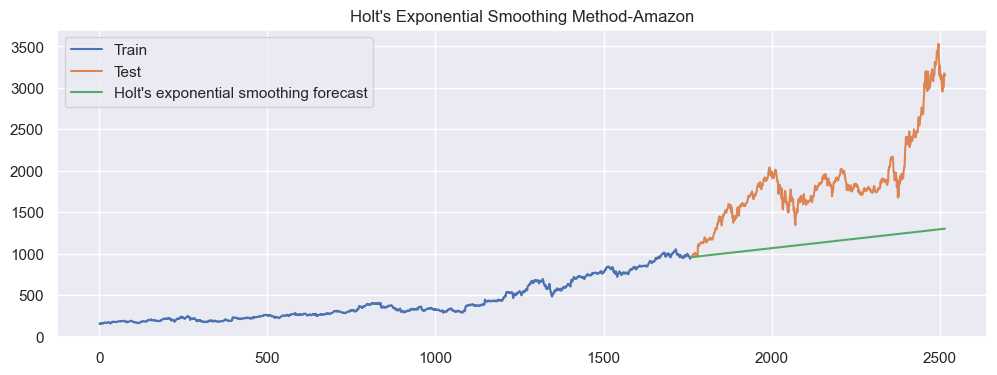

In [335]:
# Plot train, test and forecast for Amazon

plt.figure(figsize=(12,4))
plt.plot( train['Amazon'], label='Train')
plt.plot(test['Amazon'], label='Test')
plt.plot(holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method-Amazon')
plt.show()

In [336]:
# Calculating RSME and MAPE
# RMSE & MAPE for Holt's exponential smoothing method - Amazon

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Amazon'], holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon']-holt['holt_forecast'])/test['Amazon'])*100,2)
results_Amazon = pd.DataFrame({'Method':['Holt\'s Exp Smoothing'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon

Method    RMSE   MAPE
0  Holt's Exp Smoothing  849.39  36.45

### Auto Regressive Methods
- Within the ARIMA model set, various methods such as Auto Regression (AR), Moving Average (MA), AutoRegressive Moving Average (ARMA), AutoRegressive Integrated Moving Average (ARIMA), and Seasonal ARIMA (SARIMA) are compared.
- The data is initially non-stationary, requiring preprocessing before fitting it into ARIMA models.
- To achieve stationarity, a Box-Cox transformation followed by differencing is applied.
- The transformed and differenced data is then checked for stationarity.
- Finally, the stationary data is used to assess the model's effectiveness.

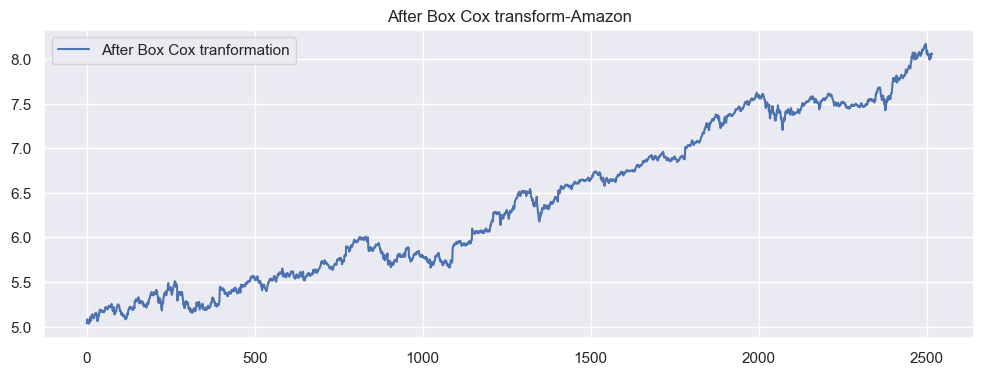

In [337]:
# Box Cox transformation to make variance constant

from scipy.stats import boxcox

df_boxcox_Amazon = pd.Series(boxcox(df['Amazon'], lmbda=0), index = df.index)
plt.figure(figsize=(12,4))
plt.plot(df_boxcox_Amazon, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform-Amazon')
plt.show()

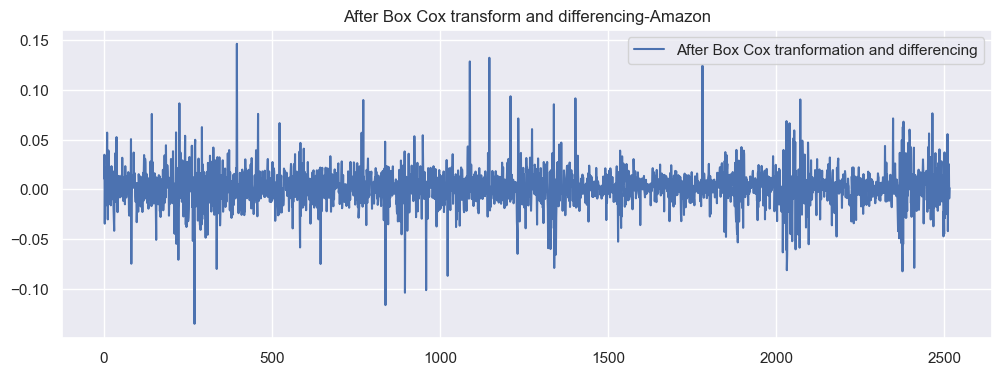

In [338]:
# Differencing to remove trend

df_boxcox_diff_Amazon = pd.Series(df_boxcox_Amazon - df_boxcox_Amazon.shift(), df.index)
plt.figure(figsize=(12,4))
plt.plot(df_boxcox_diff_Amazon, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing-Amazon')
plt.show()

##### Observation:
Following the Box-Cox transformation and first-order differencing, the dataset becomes detrended, and its distribution centers around the mean.

#### Checking for Stationarity after transformation and differencing

In [339]:
# Checking for null values after differencing

df_boxcox_diff_Amazon.head(3)

0         NaN
1    0.010870
2    0.034658
dtype: float64

In [340]:
df_boxcox_diff_Amazon.dropna(inplace=True)

In [341]:
# Checking for null values again

df_boxcox_diff_Amazon.head(3)

1    0.010870
2    0.034658
3   -0.034594
dtype: float64

In [343]:
# Augmented Dickey-Fuller (ADF) test

adf_test = adfuller(df_boxcox_diff_Amazon)
print('Amazon')
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

Amazon
ADF Statistic: -51.444151
Critical Values @ 0.05: -2.86
p-value: 0.000000


In [344]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

kpss_test = kpss(df_boxcox_diff_Amazon)
print('Amazon')
print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

Amazon
KPSS Statistic: 0.062235
Critical Values @ 0.05: 0.46
p-value: 0.100000


In [345]:
# Test-Train Split of differentiated data

train_df_boxcox_Amazon = df_boxcox_Amazon[:train_len]
test_df_boxcox_Amazon = df_boxcox_Amazon[train_len:]
train_df_boxcox_diff_Amazon = df_boxcox_diff_Amazon[:train_len-1]
test_df_boxcox_diff_Amazon = df_boxcox_diff_Amazon[train_len-1:]

### Auto Regressive Method

In [346]:
# Importing ARIMA library and fit the model

from statsmodels.tsa.arima.model import ARIMA
ar_model = ARIMA(train_df_boxcox_diff_Amazon, order=(1, 0, 0)) 
ar_model_fit = ar_model.fit()
print(ar_model_fit.params)

const     0.001037
ar.L1    -0.001730
sigma2    0.000378
dtype: float64


In [347]:
# Recovering original time series

ar = df_boxcox_diff_Amazon.copy()
ar['ar_forecast_boxcox_diff'] = ar_model_fit.predict(df_boxcox_diff_Amazon.index.min(), df_boxcox_diff_Amazon.index.max())
ar['ar_forecast_boxcox'] = ar['ar_forecast_boxcox_diff'].cumsum()
ar['ar_forecast_boxcox'] = ar['ar_forecast_boxcox'].add(df_boxcox_Amazon[0])
ar['ar_forecast'] = np.exp(ar['ar_forecast_boxcox'])

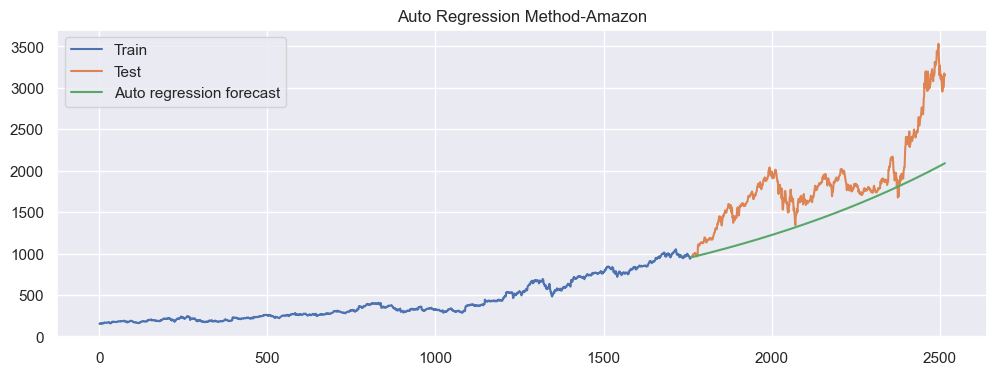

In [348]:
# Plotting train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Amazon'], label='Train')
plt.plot(test['Amazon'], label='Test')
plt.plot(ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method-Amazon')
plt.show()

In [349]:
# Calculating RMSE and MAPE for 'Autoregressive (AR) method' - Amazon

rmse = np.sqrt(mean_squared_error(test['Amazon'][1:], ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon'][1:]-ar['ar_forecast'][test.index.min():])/test['Amazon'])*100,2)
tempResults_Amazon = pd.DataFrame({'Method':['AR'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

Method    RMSE   MAPE
0  Holt's Exp Smoothing  849.39  36.45
0                    AR  505.13  20.85

### Moving Averge Method

In [350]:
# Creating and fitting the model

ma_model = ARIMA(train_df_boxcox_diff_Amazon, order=(0, 0, 1)) 
ma_model_fit = ma_model.fit()
print(ma_model_fit.params)

const     0.001036
ma.L1    -0.001363
sigma2    0.000378
dtype: float64


In [351]:
# Recovering original time series

ma = df_boxcox_diff_Amazon.copy()
ma['ma_forecast_boxcox_diff'] = ma_model_fit.predict(df_boxcox_diff_Amazon.index.min(), df_boxcox_diff_Amazon.index.max())
ma['ma_forecast_boxcox'] = ma['ma_forecast_boxcox_diff'].cumsum()
ma['ma_forecast_boxcox'] = ma['ma_forecast_boxcox'].add(df_boxcox_Amazon[0])
ma['ma_forecast'] = np.exp(ma['ma_forecast_boxcox'])

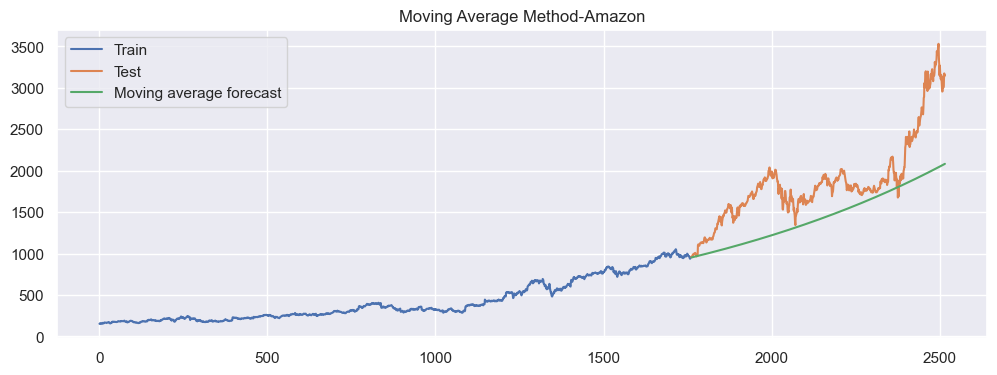

In [352]:
# Plotting train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Amazon'], label='Train')
plt.plot(test['Amazon'], label='Test')
plt.plot(ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method-Amazon')
plt.show()


In [353]:
# Calculate RMSE and MAPE for 'Moving Average (MA) method' - Amazon

rmse = np.sqrt(mean_squared_error(test['Amazon'][1:], ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon'][1:]-ma['ma_forecast'][test.index.min():])/test['Amazon'])*100,2)
tempResults_Amazon = pd.DataFrame({'Method':['MA'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

Method    RMSE   MAPE
0  Holt's Exp Smoothing  849.39  36.45
0                    AR  505.13  20.85
0                    MA  508.88  21.07

### Auto Regressive Moving Average Method(ARMA)

In [354]:
# Creating and fitting the model

arma_model = ARIMA(train_df_boxcox_diff_Amazon, order=(1, 0, 1))
arma_model_fit = arma_model.fit()
print(arma_model_fit.params)

const     1.035891e-03
ar.L1    -3.656750e-07
ma.L1    -3.677357e-07
sigma2    3.775763e-04
dtype: float64


In [355]:
# Recovering original time series

arma = df_boxcox_diff_Amazon.copy()
arma['arma_forecast_boxcox_diff'] = arma_model_fit.predict(df_boxcox_diff_Amazon.index.min(), df_boxcox_diff_Amazon.index.max())
arma['arma_forecast_boxcox'] = arma['arma_forecast_boxcox_diff'].cumsum()
arma['arma_forecast_boxcox'] = arma['arma_forecast_boxcox'].add(df_boxcox_Amazon[0])
arma['arma_forecast'] = np.exp(arma['arma_forecast_boxcox'])

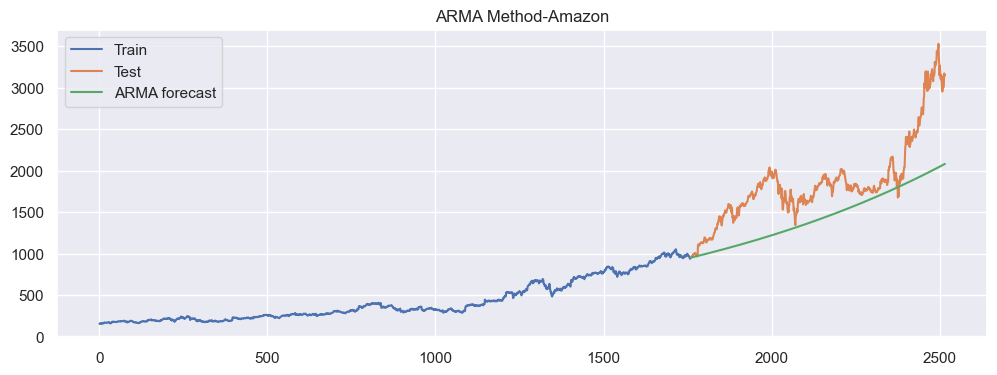

In [356]:
# Plotting train, test and forecast

plt.figure(figsize=(12,4))
plt.plot( df['Amazon'][:train_len-1], label='Train')
plt.plot(df['Amazon'][train_len-1:], label='Test')
plt.plot(arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method-Amazon')
plt.show()

In [357]:
# Calculating RMSE and MAPE 'Autoregressive moving average (ARMA) method' - Amazon

rmse = np.sqrt(mean_squared_error(test['Amazon'], arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon']-arma['arma_forecast'][train_len-1:])/test['Amazon'])*100,2)
tempResults_Amazon = pd.DataFrame({'Method':['ARMA'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

Method    RMSE   MAPE
0  Holt's Exp Smoothing  849.39  36.45
0                    AR  505.13  20.85
0                    MA  508.88  21.07
0                  ARMA  508.85  21.06

### Auto Regressive Integrated Moving Average(ARIMA)

In [358]:
# Creating and fitting the model

arima_model = ARIMA(train_df_boxcox_diff_Amazon, order=(1, 1, 1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.params)

ar.L1    -0.001166
ma.L1    -0.999931
sigma2    0.000378
dtype: float64


In [359]:
# Recover original time series forecast

arima = df_boxcox_diff_Amazon.copy()
arima['arima_forecast_boxcox_diff'] = arima_model_fit.predict(df_boxcox_diff_Amazon.index.min(), df_boxcox_diff_Amazon.index.max())
arima['arima_forecast_boxcox'] = arima['arima_forecast_boxcox_diff'].cumsum()
arima['arima_forecast_boxcox'] = arima['arima_forecast_boxcox'].add(df_boxcox_Amazon[0])
arima['arima_forecast'] = np.exp(arima['arima_forecast_boxcox'])

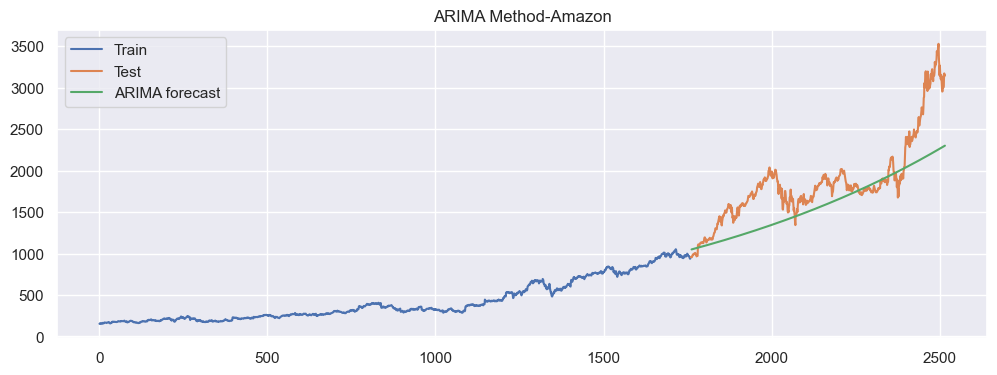

In [360]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot( df['Amazon'][:train_len-1], label='Train')
plt.plot(df['Amazon'][train_len-1:], label='Test')
plt.plot(arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method-Amazon')
plt.show()

In [361]:
# Calculate RMSE and MAPE for ARIMA- Amazon

rmse = np.sqrt(mean_squared_error(test['Amazon'][1:], arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon'][1:]-arima['arima_forecast'][test.index.min():])/test['Amazon'])*100,2)
tempResults_Amazon = pd.DataFrame({'Method':['ARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

Method    RMSE   MAPE
0  Holt's Exp Smoothing  849.39  36.45
0                    AR  505.13  20.85
0                    MA  508.88  21.07
0                  ARMA  508.85  21.06
0                 ARIMA  388.11  14.47

### Seasonal ARIMA

In [362]:
# Import SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train_df_boxcox_diff_Amazon, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
sarima_model_fit = sarima_model.fit()
print(sarima_model_fit.params)

ar.L1       0.002046
ma.L1      -0.999488
ar.S.L12   -0.048855
ma.S.L12   -0.999782
sigma2      0.000376
dtype: float64


In [363]:
# Recovering original time series forecast

sarima = df_boxcox_diff_Amazon.copy()
sarima['sarima_forecast_boxcox'] = sarima_model_fit.predict(df_boxcox_diff_Amazon.index.min(), df_boxcox_diff_Amazon.index.max())
sarima['sarima_forecast'] = np.exp(sarima['sarima_forecast_boxcox'])

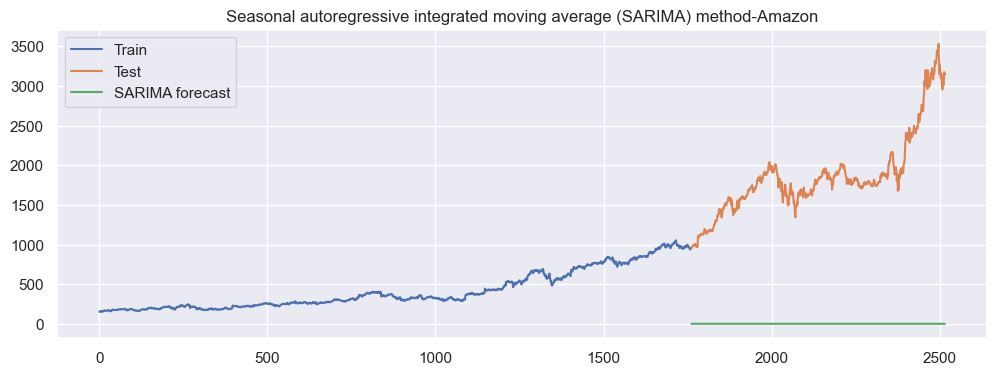

In [364]:
# Plotting train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Amazon'], label='Train')
plt.plot(test['Amazon'], label='Test')
plt.plot(sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method-Amazon')
plt.show()

In [365]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Amazon'][1:], sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon'][1:]-sarima['sarima_forecast'][test.index.min():])/test['Amazon'])*100,2)
tempResults_Amazon = pd.DataFrame({'Method':['SARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

Method     RMSE   MAPE
0  Holt's Exp Smoothing   849.39  36.45
0                    AR   505.13  20.85
0                    MA   508.88  21.07
0                  ARMA   508.85  21.06
0                 ARIMA   388.11  14.47
0                SARIMA  1929.34  99.94

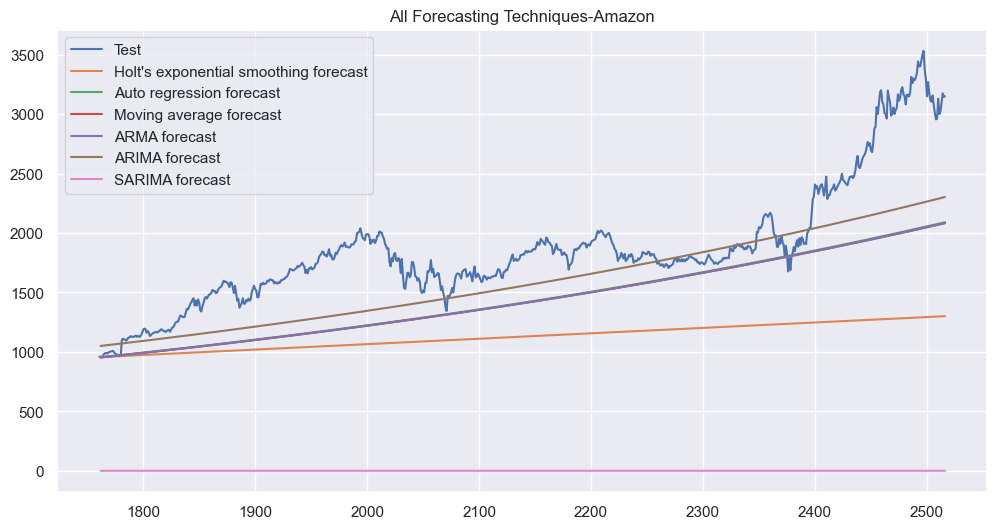

In [366]:
# Plotting & showing comparative forecasts of all smoothing techniques

plt.figure(figsize=(12,6))
plt.plot(test['Amazon'], label='Test')
plt.plot(holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.plot(ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.plot(ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.plot(arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.plot(arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.plot(sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')

plt.legend(loc='best')
plt.title('All Forecasting Techniques-Amazon')
plt.show()

##### Observation:
- In the comparison of RMSE and MAPE results for all the machine learning models, SARIMA yields the lowest RMSE and MAPE values, indicating a strong fit to the test dataset.

- However, it's important to note that the model exhibits significant overfitting on the test data.

- Before making a final decision regarding the selection of SARIMA, an evaluation of the Vector Auto Regression model will be conducted to explore its forecasting capabilities.

### Results of RMSE and MAPE

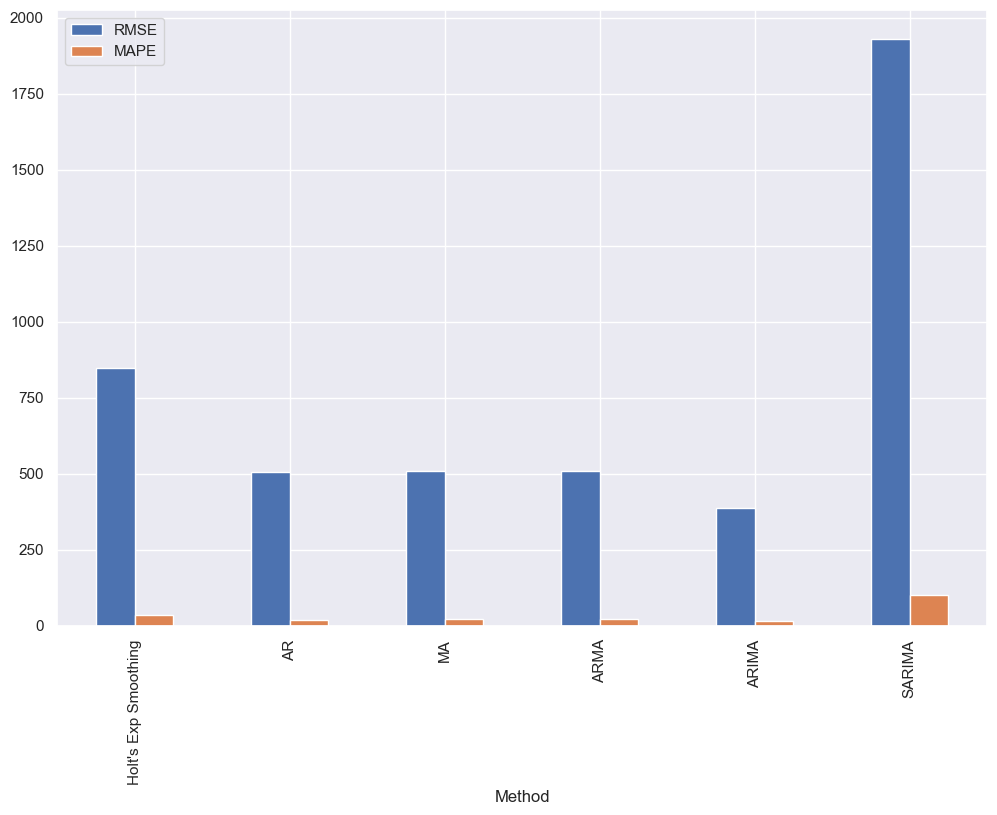

In [367]:
results_Amazon_final=results_Amazon.set_index('Method')
results_Amazon_final.plot.bar()
plt.show()

## Conclusion

Based on the above results, we conclude that ARIMA is the most suited ML model for forecastig the prices of the stocks.

## Recommendation
A recommended investment strategy for Alexandra would be to create a well-balanced portfolio that includes stocks from Amazon, Apple, and Google. By investing an equal amount in these three stocks, she can potentially achieve significant growth in her investments over time.

The key takeaways from this recommendation are as follows:

- Diversified Portfolio: Alexandra's portfolio would be diversified across different sectors, as Amazon, Apple, and Google represent the technology and e-commerce industries. This diversification can help spread risk and enhance the potential for stable returns.

- High-Growth Stocks: Amazon, Apple, and Google are known for their strong growth potential. They have historically delivered positive returns, making them attractive choices for a long-term investment strategy.

- Balanced Risk and Returns: By investing equally in these stocks, Alexandra can achieve a balance between risk and potential returns. While these stocks have growth potential, they also come with some level of risk, which is mitigated by diversifying across them.

- Active Management: Since Alexandra is an active investor, regularly monitoring and managing her portfolio would be essential. This would involve keeping an eye on the performance of these stocks, staying updated with market trends, and making informed decisions based on her financial goals.

- Customized Investment Approach: This investment strategy aligns with Alexandra's conservative risk tolerance while aiming for good returns. It caters to her desire for stability while also seeking growth opportunities.

Regular monitoring and adjustments will be crucial to ensure the portfolio remains in line with her investment objectives.